In [79]:
import matplotlib.pyplot as plt
import numpy as np
import random
# import abcpy
import treeswift
from treeswift import Tree, Node
import argparse
import csv
import matplotlib.patches as mpatches

def get_color(s):
    if 0.2 <= s < 0.5:
        return 'red'
    elif 0.5 <= s < 1:
        return 'orange'
    elif 1 <= s < 1.5:
        return 'cornflowerblue'
    else:  # 1.5 <= s < 2
        return 'green'

# Set the global font to be Times New Roman
plt.rcParams["font.family"] = "Times New Roman"


class Population:
    def __init__(self, N, generations, disease, s, ax=None):
        self.N = N
        self.s = s
        self.generations = generations
        self.disease = disease
        self.generation_data = []
        self.ax = ax 


    def __str__(self):
        return f"Population size: {self.N}, Generations: {self.generations}, Disease_Onset: {self.disease}, Selection: {self.s}"

    def simulate_population(self):
        """
        Simulate the population using the Wright-Fisher model with selection.
        """

        # Initialize the first population
        population = np.zeros(self.N, dtype=int)
        self.generation_data.append(population)
        binom_prob_list = []
        mut_n_list = []

        for gen in range(1, self.generations + 1):
            print(gen)
            if gen - 1 < len(self.generation_data) and len(self.generation_data) > 0:
                print("Passed if")
                if gen < self.disease:
                    print("Disease hasn't started yet")
                    self.generation_data.append(np.zeros(self.N))
                    mut_n_list.append(0)
                    binom_prob_list.append(0)
                elif gen == self.disease:
                    # first cell with mutation
                    print("Disease started")
                    population[random.randint(0, self.N - 1)] = 1
                    self.generation_data.append(population)
                elif gen > self.disease:
                    # clonal expansion
                    print("Expansion started")
                    print(f"Length self.gen.data: {len(self.generation_data)}")
                    print(self.generation_data[gen - 1])
                    mut_n = len(np.where(self.generation_data[gen - 1] == 1)[0])
                    print(mut_n)
                    mut_n_list.append(mut_n)

                    #cancer_p = (1 + self.s) * mut_n / (self.N + (mut_n * self.s))
                    cancer_p = np.clip((1 + self.s) * mut_n / (self.N + (mut_n * self.s)), 0, 1)

                    binom_prob_list.append(cancer_p)

                    offspring = np.random.binomial(n=1, p=cancer_p, size=self.N)

                    num_mutants = [np.count_nonzero(offspring == 1)]

                    if num_mutants == 0:
                        print("Stochastic Extinction")
                        self.generation_data.append(offspring)
                        num_mutants = [np.count_nonzero(generation == 1) for generation in self.generation_data]
                        # Plot the number of mutants over time
                        fig, ax = plt.subplots()
                        ax.plot(range(len(num_mutants)), np.log(num_mutants))
                        ax.set_xlabel("Time in Generations")
                        ax.set_ylabel("Number of mutants ln(N)")
                        ax.set_title(f"Mutant allele frequency over time (s={self.s})")
                        return (self.generation_data, binom_prob_list, mut_n_list, fig)

                    self.generation_data.append(offspring)

        # for gen in range(self.generations):
        #     mut_n = len(np.where(self.generation_data[gen] == 1)[0])
        #     mut_n_list.append(mut_n)

        #     cancer_p = (1 + self.s) * mut_n / (self.N + (mut_n * self.s))
        #     binom_prob_list.append(cancer_p)

        #     offspring = np.random.binomial(n=1, p=cancer_p, size=self.N)

        #     num_mutants = [np.count_nonzero(offspring == 1)]

        #     if num_mutants == 0:
        #         print("Stochastic Extinction")
        #         self.generation_data.append(offspring)
        #         num_mutants = [np.count_nonzero(generation == 1) for generation in self.generation_data]
        #         # Plot the number of mutants over time
        #         fig, ax = plt.subplots()
        #         ax.plot(range(len(num_mutants)), np.log(num_mutants))
        #         ax.set_xlabel("Time in Generations")
        #         ax.set_ylabel("Number of mutants ln(N)")
        #         ax.set_title(f"Mutant allele frequency over time (s={self.s})")
        #         return(self.generation_data, binom_prob_list, mut_n_list, fig)

        #     self.generation_data.append(offspring)

        # Plot the number of mutants over time
        # Count the number of individuals with a value of 1 in each generation
        # Count the number of individuals with a value of 1 in each generation
        num_mutants = [np.count_nonzero(generation == 1) for generation in self.generation_data]

        # if axis doesn't exist yet, create it.
        if self.ax is None:
            fig, self.ax = plt.subplots(figsize=(14, 8))
            self.ax.set_xlabel("Time in Generations")
            self.ax.set_ylabel("Number of mutants ln(N)")

        # add a curve to the plot for each simulation
        # Add a curve to the plot for each simulation
        color = get_color(self.s)  # Use the get_color function to determine the color based on s
        self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
        self.ax.legend()
        self.ax.set_title("ClonalSim: Sims=1000, N=10000, Gen=30")
                # Create legend patches
        patches = [ mpatches.Patch(color='red', label='s=0.2 - 0.5'),
                   mpatches.Patch(color='orange', label='s=0.5 - 1'),
                   mpatches.Patch(color='cornflowerblue', label='s=1 - 1.5'),
                   mpatches.Patch(color='green', label='s=1.5 - 2')]

        # Add legend to plot
        self.ax.legend(handles=patches)

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


1
Passed if
Disease started
2
Passed if
Expansion started
Length self.gen.data: 2
[0 0 0 ... 0 0 0]
1
3
Passed if
Expansion started
Length self.gen.data: 3
[0 0 0 ... 0 0 0]
2
4
Passed if
Expansion started
Length self.gen.data: 4
[0 0 0 ... 0 0 0]
11
5
Passed if
Expansion started
Length self.gen.data: 5
[0 0 0 ... 0 0 0]
27
6
Passed if
Expansion started
Length self.gen.data: 6
[0 1 0 ... 0 0 0]
55
7
Passed if
Expansion started
Length self.gen.data: 7
[0 1 0 ... 0 0 0]
175
8
Passed if
Expansion started
Length self.gen.data: 8
[0 0 0 ... 1 0 1]
469
9
Passed if
Expansion started
Length self.gen.data: 9
[0 0 0 ... 0 0 0]
1175
10
Passed if
Expansion started
Length self.gen.data: 10
[1 0 0 ... 1 1 0]
2558
11
Passed if
Expansion started
Length self.gen.data: 11
[0 0 1 ... 1 1 0]
4778
12
Passed if
Expansion started
Length self.gen.data: 12
[1 1 0 ... 1 1 1]
7234
13
Passed if
Expansion started
Length self.gen.data: 13
[1 1 0 ... 1 1 1]
8761
14
Passed if
Expansion started
Length self.gen.data: 1

No handles with labels found to put in legend.
No handles with labels found to put in legend.
<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


21
Passed if
Expansion started
Length self.gen.data: 21
[1 1 1 ... 1 1 1]
9999
22
Passed if
Expansion started
Length self.gen.data: 22
[1 1 1 ... 1 1 1]
10000
23
Passed if
Expansion started
Length self.gen.data: 23
[1 1 1 ... 1 1 1]
10000
24
Passed if
Expansion started
Length self.gen.data: 24
[1 1 1 ... 1 1 1]
10000
25
Passed if
Expansion started
Length self.gen.data: 25
[1 1 1 ... 1 1 1]
10000
26
Passed if
Expansion started
Length self.gen.data: 26
[1 1 1 ... 1 1 1]
10000
27
Passed if
Expansion started
Length self.gen.data: 27
[1 1 1 ... 1 1 1]
10000
28
Passed if
Expansion started
Length self.gen.data: 28
[1 1 1 ... 1 1 1]
10000
29
Passed if
Expansion started
Length self.gen.data: 29
[1 1 1 ... 1 1 1]
10000
30
Passed if
Expansion started
Length self.gen.data: 30
[1 1 1 ... 1 1 1]
10000
1
Passed if
Disease started
2
Passed if
Expansion started
Length self.gen.data: 2
[0 0 0 ... 0 0 0]
1
3
Passed if
Expansion started
Length self.gen.data: 3
[0 0 0 ... 0 0 0]
2
4
Passed if
Expansion sta

No handles with labels found to put in legend.
<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.


3
Passed if
Expansion started
Length self.gen.data: 3
[0 0 0 ... 0 0 0]
3
4
Passed if
Expansion started
Length self.gen.data: 4
[0 0 0 ... 0 0 0]
7
5
Passed if
Expansion started
Length self.gen.data: 5
[0 0 0 ... 0 0 0]
10
6
Passed if
Expansion started
Length self.gen.data: 6
[0 0 0 ... 0 0 0]
17
7
Passed if
Expansion started
Length self.gen.data: 7
[0 0 0 ... 0 0 0]
30
8
Passed if
Expansion started
Length self.gen.data: 8
[0 0 0 ... 0 0 0]
40
9
Passed if
Expansion started
Length self.gen.data: 9
[0 0 0 ... 0 0 0]
67
10
Passed if
Expansion started
Length self.gen.data: 10
[0 0 0 ... 0 0 0]
101
11
Passed if
Expansion started
Length self.gen.data: 11
[0 0 0 ... 0 0 0]
159
12
Passed if
Expansion started
Length self.gen.data: 12
[0 0 0 ... 0 0 0]
247
13
Passed if
Expansion started
Length self.gen.data: 13
[0 0 0 ... 0 0 0]
430
14
Passed if
Expansion started
Length self.gen.data: 14
[0 0 0 ... 0 0 0]
684
15
Passed if
Expansion started
Length self.gen.data: 15
[0 1 0 ... 0 0 0]
1021
16
Passe

No handles with labels found to put in legend.
<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.
No handles with labels found to put in legend.


3
Passed if
Expansion started
Length self.gen.data: 3
[0 0 0 ... 0 0 0]
1
4
Passed if
Expansion started
Length self.gen.data: 4
[0 0 0 ... 0 0 0]
3
5
Passed if
Expansion started
Length self.gen.data: 5
[0 0 0 ... 0 0 0]
6
6
Passed if
Expansion started
Length self.gen.data: 6
[0 0 0 ... 0 0 0]
21
7
Passed if
Expansion started
Length self.gen.data: 7
[0 0 0 ... 0 0 0]
51
8
Passed if
Expansion started
Length self.gen.data: 8
[0 0 0 ... 0 0 0]
84
9
Passed if
Expansion started
Length self.gen.data: 9
[0 0 0 ... 0 0 0]
155
10
Passed if
Expansion started
Length self.gen.data: 10
[0 0 0 ... 0 0 0]
253
11
Passed if
Expansion started
Length self.gen.data: 11
[0 0 0 ... 1 0 0]
496
12
Passed if
Expansion started
Length self.gen.data: 12
[0 0 1 ... 0 0 0]
852
13
Passed if
Expansion started
Length self.gen.data: 13
[0 0 0 ... 0 0 0]
1453
14
Passed if
Expansion started
Length self.gen.data: 14
[0 0 0 ... 0 0 0]
2384
15
Passed if
Expansion started
Length self.gen.data: 15
[1 0 1 ... 0 1 0]
3591
16
Pas

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


1
Passed if
Disease started
2
Passed if
Expansion started
Length self.gen.data: 2
[0 0 0 ... 0 0 0]
1
3
Passed if
Expansion started
Length self.gen.data: 3
[0 0 0 ... 0 0 0]
3
4
Passed if
Expansion started
Length self.gen.data: 4
[0 0 0 ... 0 0 0]
9
5
Passed if
Expansion started
Length self.gen.data: 5
[0 0 0 ... 0 0 0]
20
6
Passed if
Expansion started
Length self.gen.data: 6
[0 0 0 ... 0 0 0]
51
7
Passed if
Expansion started
Length self.gen.data: 7
[0 0 0 ... 0 0 0]
107
8
Passed if
Expansion started
Length self.gen.data: 8
[0 0 0 ... 0 0 0]
244
9
Passed if
Expansion started
Length self.gen.data: 9
[0 0 0 ... 0 0 0]
565
10
Passed if
Expansion started
Length self.gen.data: 10
[0 0 0 ... 0 0 0]
1203
11
Passed if
Expansion started
Length self.gen.data: 11
[0 0 0 ... 0 1 0]
2424
12
Passed if
Expansion started
Length self.gen.data: 12
[1 1 0 ... 0 0 1]
4279
13
Passed if
Expansion started
Length self.gen.data: 13
[1 0 0 ... 1 1 1]
6301
14
Passed if
Expansion started
Length self.gen.data: 14


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.


9914
27
Passed if
Expansion started
Length self.gen.data: 27
[1 1 1 ... 1 1 1]
9959
28
Passed if
Expansion started
Length self.gen.data: 28
[1 1 1 ... 1 1 1]
9976
29
Passed if
Expansion started
Length self.gen.data: 29
[1 1 1 ... 1 1 1]
9985
30
Passed if
Expansion started
Length self.gen.data: 30
[1 1 1 ... 1 1 1]
9991
1
Passed if
Disease started
2
Passed if
Expansion started
Length self.gen.data: 2
[0 0 0 ... 0 0 0]
1
3
Passed if
Expansion started
Length self.gen.data: 3
[0 0 0 ... 0 0 0]
3
4
Passed if
Expansion started
Length self.gen.data: 4
[0 0 0 ... 0 0 0]
10
5
Passed if
Expansion started
Length self.gen.data: 5
[0 0 0 ... 0 0 0]
33
6
Passed if
Expansion started
Length self.gen.data: 6
[0 0 0 ... 0 0 0]
87
7
Passed if
Expansion started
Length self.gen.data: 7
[0 0 0 ... 0 0 0]
229
8
Passed if
Expansion started
Length self.gen.data: 8
[0 0 0 ... 0 0 0]
621
9
Passed if
Expansion started
Length self.gen.data: 9
[0 0 0 ... 0 1 0]
1614
10
Passed if
Expansion started
Length self.gen.da

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


19
Passed if
Expansion started
Length self.gen.data: 19
[1 1 1 ... 1 1 0]
8432
20
Passed if
Expansion started
Length self.gen.data: 20
[1 1 1 ... 1 1 1]
9083
21
Passed if
Expansion started
Length self.gen.data: 21
[1 1 1 ... 1 1 1]
9480
22
Passed if
Expansion started
Length self.gen.data: 22
[1 1 1 ... 0 1 1]
9693
23
Passed if
Expansion started
Length self.gen.data: 23
[1 1 1 ... 0 1 1]
9830
24
Passed if
Expansion started
Length self.gen.data: 24
[1 1 1 ... 1 1 1]
9906
25
Passed if
Expansion started
Length self.gen.data: 25
[1 1 1 ... 1 1 1]
9949
26
Passed if
Expansion started
Length self.gen.data: 26
[1 1 1 ... 1 1 1]
9975
27
Passed if
Expansion started
Length self.gen.data: 27
[1 1 1 ... 1 1 1]
9985
28
Passed if
Expansion started
Length self.gen.data: 28
[1 1 1 ... 1 1 1]
9994
29
Passed if
Expansion started
Length self.gen.data: 29
[1 1 1 ... 1 1 1]
9996
30
Passed if
Expansion started
Length self.gen.data: 30
[1 1 1 ... 1 1 1]
10000
1
Passed if
Disease started
2
Passed if
Expansion s

No handles with labels found to put in legend.
<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


1
3
Passed if
Expansion started
Length self.gen.data: 3
[0 0 0 ... 0 0 0]
3
4
Passed if
Expansion started
Length self.gen.data: 4
[0 0 0 ... 0 0 0]
9
5
Passed if
Expansion started
Length self.gen.data: 5
[0 0 0 ... 0 0 0]
26
6
Passed if
Expansion started
Length self.gen.data: 6
[0 0 0 ... 0 0 0]
61
7
Passed if
Expansion started
Length self.gen.data: 7
[0 0 0 ... 0 0 0]
167
8
Passed if
Expansion started
Length self.gen.data: 8
[0 0 0 ... 0 0 0]
423
9
Passed if
Expansion started
Length self.gen.data: 9
[0 0 0 ... 0 0 0]
998
10
Passed if
Expansion started
Length self.gen.data: 10
[1 0 0 ... 0 0 0]
2286
11
Passed if
Expansion started
Length self.gen.data: 11
[0 0 1 ... 0 1 0]
4483
12
Passed if
Expansion started
Length self.gen.data: 12
[0 0 1 ... 0 0 1]
6817
13
Passed if
Expansion started
Length self.gen.data: 13
[1 1 1 ... 1 1 1]
8476
14
Passed if
Expansion started
Length self.gen.data: 14
[1 1 1 ... 1 0 1]
9430
15
Passed if
Expansion started
Length self.gen.data: 15
[1 1 1 ... 1 1 1]
978

No handles with labels found to put in legend.
<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.
No handles with labels found to put in legend.


24
Passed if
Expansion started
Length self.gen.data: 24
[1 1 1 ... 1 1 1]
10000
25
Passed if
Expansion started
Length self.gen.data: 25
[1 1 1 ... 1 1 1]
10000
26
Passed if
Expansion started
Length self.gen.data: 26
[1 1 1 ... 1 1 1]
10000
27
Passed if
Expansion started
Length self.gen.data: 27
[1 1 1 ... 1 1 1]
10000
28
Passed if
Expansion started
Length self.gen.data: 28
[1 1 1 ... 1 1 1]
10000
29
Passed if
Expansion started
Length self.gen.data: 29
[1 1 1 ... 1 1 1]
10000
30
Passed if
Expansion started
Length self.gen.data: 30
[1 1 1 ... 1 1 1]
10000
1
Passed if
Disease started
2
Passed if
Expansion started
Length self.gen.data: 2
[0 0 0 ... 0 0 0]
1
3
Passed if
Expansion started
Length self.gen.data: 3
[0 0 0 ... 0 0 0]
0
4
Passed if
Expansion started
Length self.gen.data: 4
[0 0 0 ... 0 0 0]
0
5
Passed if
Expansion started
Length self.gen.data: 5
[0 0 0 ... 0 0 0]
0
6
Passed if
Expansion started
Length self.gen.data: 6
[0 0 0 ... 0 0 0]
0
7
Passed if
Expansion started
Length self.

<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


21
Passed if
Expansion started
Length self.gen.data: 21
[0 0 0 ... 0 0 0]
0
22
Passed if
Expansion started
Length self.gen.data: 22
[0 0 0 ... 0 0 0]
0
23
Passed if
Expansion started
Length self.gen.data: 23
[0 0 0 ... 0 0 0]
0
24
Passed if
Expansion started
Length self.gen.data: 24
[0 0 0 ... 0 0 0]
0
25
Passed if
Expansion started
Length self.gen.data: 25
[0 0 0 ... 0 0 0]
0
26
Passed if
Expansion started
Length self.gen.data: 26
[0 0 0 ... 0 0 0]
0
27
Passed if
Expansion started
Length self.gen.data: 27
[0 0 0 ... 0 0 0]
0
28
Passed if
Expansion started
Length self.gen.data: 28
[0 0 0 ... 0 0 0]
0
29
Passed if
Expansion started
Length self.gen.data: 29
[0 0 0 ... 0 0 0]
0
30
Passed if
Expansion started
Length self.gen.data: 30
[0 0 0 ... 0 0 0]
0
1
Passed if
Disease started
2
Passed if
Expansion started
Length self.gen.data: 2
[0 0 0 ... 0 0 0]
1
3
Passed if
Expansion started
Length self.gen.data: 3
[0 0 0 ... 0 0 0]
2
4
Passed if
Expansion started
Length self.gen.data: 4
[0 0 0 ...

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


9412
18
Passed if
Expansion started
Length self.gen.data: 18
[1 1 1 ... 1 1 1]
9728
19
Passed if
Expansion started
Length self.gen.data: 19
[1 1 1 ... 1 1 1]
9880
20
Passed if
Expansion started
Length self.gen.data: 20
[1 1 1 ... 1 1 1]
9950
21
Passed if
Expansion started
Length self.gen.data: 21
[1 1 1 ... 1 1 1]
9982
22
Passed if
Expansion started
Length self.gen.data: 22
[1 1 1 ... 1 1 1]
9991
23
Passed if
Expansion started
Length self.gen.data: 23
[1 1 1 ... 1 1 1]
9997
24
Passed if
Expansion started
Length self.gen.data: 24
[1 1 1 ... 1 1 1]
9997
25
Passed if
Expansion started
Length self.gen.data: 25
[1 1 1 ... 1 1 1]
9999
26
Passed if
Expansion started
Length self.gen.data: 26
[1 1 1 ... 1 1 1]
10000
27
Passed if
Expansion started
Length self.gen.data: 27
[1 1 1 ... 1 1 1]
10000
28
Passed if
Expansion started
Length self.gen.data: 28
[1 1 1 ... 1 1 1]
10000
29
Passed if
Expansion started
Length self.gen.data: 29
[1 1 1 ... 1 1 1]
10000
30
Passed if
Expansion started
Length self.

<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.



3
Passed if
Expansion started
Length self.gen.data: 3
[0 0 0 ... 0 0 0]
0
4
Passed if
Expansion started
Length self.gen.data: 4
[0 0 0 ... 0 0 0]
0
5
Passed if
Expansion started
Length self.gen.data: 5
[0 0 0 ... 0 0 0]
0
6
Passed if
Expansion started
Length self.gen.data: 6
[0 0 0 ... 0 0 0]
0
7
Passed if
Expansion started
Length self.gen.data: 7
[0 0 0 ... 0 0 0]
0
8
Passed if
Expansion started
Length self.gen.data: 8
[0 0 0 ... 0 0 0]
0
9
Passed if
Expansion started
Length self.gen.data: 9
[0 0 0 ... 0 0 0]
0
10
Passed if
Expansion started
Length self.gen.data: 10
[0 0 0 ... 0 0 0]
0
11
Passed if
Expansion started
Length self.gen.data: 11
[0 0 0 ... 0 0 0]
0
12
Passed if
Expansion started
Length self.gen.data: 12
[0 0 0 ... 0 0 0]
0
13
Passed if
Expansion started
Length self.gen.data: 13
[0 0 0 ... 0 0 0]
0
14
Passed if
Expansion started
Length self.gen.data: 14
[0 0 0 ... 0 0 0]
0
15
Passed if
Expansion started
Length self.gen.data: 15
[0 0 0 ... 0 0 0]
0
16
Passed if
Expansion st

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.



Passed if
Expansion started
Length self.gen.data: 13
[1 1 0 ... 1 1 0]
7719
14
Passed if
Expansion started
Length self.gen.data: 14
[1 1 0 ... 1 0 1]
9034
15
Passed if
Expansion started
Length self.gen.data: 15
[1 1 1 ... 1 1 1]
9605
16
Passed if
Expansion started
Length self.gen.data: 16
[1 1 1 ... 1 1 1]
9839
17
Passed if
Expansion started
Length self.gen.data: 17
[1 1 1 ... 1 1 1]
9951
18
Passed if
Expansion started
Length self.gen.data: 18
[1 1 1 ... 1 1 1]
9980
19
Passed if
Expansion started
Length self.gen.data: 19
[1 1 1 ... 1 1 1]
9989
20
Passed if
Expansion started
Length self.gen.data: 20
[1 1 1 ... 1 1 1]
9998
21
Passed if
Expansion started
Length self.gen.data: 21
[1 1 1 ... 1 1 1]
10000
22
Passed if
Expansion started
Length self.gen.data: 22
[1 1 1 ... 1 1 1]
10000
23
Passed if
Expansion started
Length self.gen.data: 23
[1 1 1 ... 1 1 1]
10000
24
Passed if
Expansion started
Length self.gen.data: 24
[1 1 1 ... 1 1 1]
10000
25
Passed if
Expansion started
Length self.gen.dat

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


19
Passed if
Expansion started
Length self.gen.data: 19
[0 0 0 ... 0 0 0]
1060
20
Passed if
Expansion started
Length self.gen.data: 20
[0 0 0 ... 0 0 1]
1502
21
Passed if
Expansion started
Length self.gen.data: 21
[0 0 0 ... 0 0 1]
2064
22
Passed if
Expansion started
Length self.gen.data: 22
[1 0 1 ... 0 0 0]
2733
23
Passed if
Expansion started
Length self.gen.data: 23
[0 0 0 ... 0 0 0]
3578
24
Passed if
Expansion started
Length self.gen.data: 24
[1 0 1 ... 1 1 0]
4478
25
Passed if
Expansion started
Length self.gen.data: 25
[0 1 1 ... 1 1 1]
5417
26
Passed if
Expansion started
Length self.gen.data: 26
[0 1 1 ... 0 1 1]
6208
27
Passed if
Expansion started
Length self.gen.data: 27
[0 0 1 ... 0 1 1]
7030
28
Passed if
Expansion started
Length self.gen.data: 28
[0 1 1 ... 1 0 1]
7712
29
Passed if
Expansion started
Length self.gen.data: 29
[0 1 1 ... 1 1 1]
8363
30
Passed if
Expansion started
Length self.gen.data: 30
[1 1 1 ... 1 1 1]
8866
1
Passed if
Disease started
2
Passed if
Expansion st

<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


3
Passed if
Expansion started
Length self.gen.data: 3
[0 0 0 ... 0 0 0]
0
4
Passed if
Expansion started
Length self.gen.data: 4
[0 0 0 ... 0 0 0]
0
5
Passed if
Expansion started
Length self.gen.data: 5
[0 0 0 ... 0 0 0]
0
6
Passed if
Expansion started
Length self.gen.data: 6
[0 0 0 ... 0 0 0]
0
7
Passed if
Expansion started
Length self.gen.data: 7
[0 0 0 ... 0 0 0]
0
8
Passed if
Expansion started
Length self.gen.data: 8
[0 0 0 ... 0 0 0]
0
9
Passed if
Expansion started
Length self.gen.data: 9
[0 0 0 ... 0 0 0]
0
10
Passed if
Expansion started
Length self.gen.data: 10
[0 0 0 ... 0 0 0]
0
11
Passed if
Expansion started
Length self.gen.data: 11
[0 0 0 ... 0 0 0]
0
12
Passed if
Expansion started
Length self.gen.data: 12
[0 0 0 ... 0 0 0]
0
13
Passed if
Expansion started
Length self.gen.data: 13
[0 0 0 ... 0 0 0]
0
14
Passed if
Expansion started
Length self.gen.data: 14
[0 0 0 ... 0 0 0]
0
15
Passed if
Expansion started
Length self.gen.data: 15
[0 0 0 ... 0 0 0]
0
16
Passed if
Expansion sta

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


9
Passed if
Expansion started
Length self.gen.data: 9
[0 0 0 ... 0 0 0]
13
10
Passed if
Expansion started
Length self.gen.data: 10
[0 0 0 ... 0 0 0]
21
11
Passed if
Expansion started
Length self.gen.data: 11
[0 0 0 ... 0 0 0]
35
12
Passed if
Expansion started
Length self.gen.data: 12
[0 0 0 ... 0 0 0]
59
13
Passed if
Expansion started
Length self.gen.data: 13
[0 0 0 ... 0 0 0]
104
14
Passed if
Expansion started
Length self.gen.data: 14
[0 0 0 ... 0 0 0]
170
15
Passed if
Expansion started
Length self.gen.data: 15
[0 0 0 ... 0 0 0]
270
16
Passed if
Expansion started
Length self.gen.data: 16
[0 0 0 ... 0 0 0]
400
17
Passed if
Expansion started
Length self.gen.data: 17
[1 0 0 ... 0 0 0]
650
18
Passed if
Expansion started
Length self.gen.data: 18
[0 0 0 ... 0 0 0]
925
19
Passed if
Expansion started
Length self.gen.data: 19
[0 0 0 ... 0 0 0]
1345
20
Passed if
Expansion started
Length self.gen.data: 20
[0 1 0 ... 0 0 0]
1933
21
Passed if
Expansion started
Length self.gen.data: 21
[1 0 0 ... 0

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


1
Passed if
Disease started
2
Passed if
Expansion started
Length self.gen.data: 2
[0 0 0 ... 0 0 0]
1
3
Passed if
Expansion started
Length self.gen.data: 3
[0 0 0 ... 0 0 0]
4
4
Passed if
Expansion started
Length self.gen.data: 4
[0 0 0 ... 0 0 0]
10
5
Passed if
Expansion started
Length self.gen.data: 5
[0 0 0 ... 0 0 0]
29
6
Passed if
Expansion started
Length self.gen.data: 6
[0 0 0 ... 0 0 0]
87
7
Passed if
Expansion started
Length self.gen.data: 7
[0 0 0 ... 0 0 0]
236
8
Passed if
Expansion started
Length self.gen.data: 8
[0 0 0 ... 0 1 0]
605
9
Passed if
Expansion started
Length self.gen.data: 9
[1 0 0 ... 0 0 0]
1459
10
Passed if
Expansion started
Length self.gen.data: 10
[0 1 1 ... 1 1 0]
3121
11
Passed if
Expansion started
Length self.gen.data: 11
[0 0 0 ... 0 1 0]
5457
12
Passed if
Expansion started
Length self.gen.data: 12
[1 0 1 ... 1 1 1]
7594
13
Passed if
Expansion started
Length self.gen.data: 13
[1 1 1 ... 1 1 1]
8951
14
Passed if
Expansion started
Length self.gen.data: 1

<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.


12
Passed if
Expansion started
Length self.gen.data: 12
[0 0 0 ... 0 0 0]
0
13
Passed if
Expansion started
Length self.gen.data: 13
[0 0 0 ... 0 0 0]
0
14
Passed if
Expansion started
Length self.gen.data: 14
[0 0 0 ... 0 0 0]
0
15
Passed if
Expansion started
Length self.gen.data: 15
[0 0 0 ... 0 0 0]
0
16
Passed if
Expansion started
Length self.gen.data: 16
[0 0 0 ... 0 0 0]
0
17
Passed if
Expansion started
Length self.gen.data: 17
[0 0 0 ... 0 0 0]
0
18
Passed if
Expansion started
Length self.gen.data: 18
[0 0 0 ... 0 0 0]
0
19
Passed if
Expansion started
Length self.gen.data: 19
[0 0 0 ... 0 0 0]
0
20
Passed if
Expansion started
Length self.gen.data: 20
[0 0 0 ... 0 0 0]
0
21
Passed if
Expansion started
Length self.gen.data: 21
[0 0 0 ... 0 0 0]
0
22
Passed if
Expansion started
Length self.gen.data: 22
[0 0 0 ... 0 0 0]
0
23
Passed if
Expansion started
Length self.gen.data: 23
[0 0 0 ... 0 0 0]
0
24
Passed if
Expansion started
Length self.gen.data: 24
[0 0 0 ... 0 0 0]
0
25
Passed if

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


28
Passed if
Expansion started
Length self.gen.data: 28
[1 1 1 ... 1 1 1]
10000
29
Passed if
Expansion started
Length self.gen.data: 29
[1 1 1 ... 1 1 1]
10000
30
Passed if
Expansion started
Length self.gen.data: 30
[1 1 1 ... 1 1 1]
10000
1
Passed if
Disease started
2
Passed if
Expansion started
Length self.gen.data: 2
[0 0 0 ... 0 0 0]
1
3
Passed if
Expansion started
Length self.gen.data: 3
[0 0 0 ... 0 0 0]
2
4
Passed if
Expansion started
Length self.gen.data: 4
[0 0 0 ... 0 0 0]
4
5
Passed if
Expansion started
Length self.gen.data: 5
[0 0 0 ... 0 0 0]
12
6
Passed if
Expansion started
Length self.gen.data: 6
[0 0 0 ... 0 0 0]
24
7
Passed if
Expansion started
Length self.gen.data: 7
[0 0 0 ... 0 0 0]
56
8
Passed if
Expansion started
Length self.gen.data: 8
[0 0 0 ... 0 0 0]
101
9
Passed if
Expansion started
Length self.gen.data: 9
[0 0 0 ... 0 0 0]
197
10
Passed if
Expansion started
Length self.gen.data: 10
[0 0 0 ... 0 0 0]
380
11
Passed if
Expansion started
Length self.gen.data: 11

No handles with labels found to put in legend.
<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.
No handles with labels found to put in legend.
<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.
<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.


10000
24
Passed if
Expansion started
Length self.gen.data: 24
[1 1 1 ... 1 1 1]
10000
25
Passed if
Expansion started
Length self.gen.data: 25
[1 1 1 ... 1 1 1]
10000
26
Passed if
Expansion started
Length self.gen.data: 26
[1 1 1 ... 1 1 1]
10000
27
Passed if
Expansion started
Length self.gen.data: 27
[1 1 1 ... 1 1 1]
10000
28
Passed if
Expansion started
Length self.gen.data: 28
[1 1 1 ... 1 1 1]
10000
29
Passed if
Expansion started
Length self.gen.data: 29
[1 1 1 ... 1 1 1]
10000
30
Passed if
Expansion started
Length self.gen.data: 30
[1 1 1 ... 1 1 1]
10000
1
Passed if
Disease started
2
Passed if
Expansion started
Length self.gen.data: 2
[0 0 0 ... 0 0 0]
1
3
Passed if
Expansion started
Length self.gen.data: 3
[0 0 0 ... 0 0 0]
1
4
Passed if
Expansion started
Length self.gen.data: 4
[0 0 0 ... 0 0 0]
0
5
Passed if
Expansion started
Length self.gen.data: 5
[0 0 0 ... 0 0 0]
0
6
Passed if
Expansion started
Length self.gen.data: 6
[0 0 0 ... 0 0 0]
0
7
Passed if
Expansion started
Length

No handles with labels found to put in legend.
No handles with labels found to put in legend.
<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.
No handles with labels found to put in legend.
<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.
No handles with labels found to put in legend.


1578
13
Passed if
Expansion started
Length self.gen.data: 13
[1 0 0 ... 1 1 0]
2862
14
Passed if
Expansion started
Length self.gen.data: 14
[0 0 1 ... 1 0 0]
4658
15
Passed if
Expansion started
Length self.gen.data: 15
[1 1 0 ... 1 1 1]
6540
16
Passed if
Expansion started
Length self.gen.data: 16
[1 0 1 ... 1 1 1]
8005
17
Passed if
Expansion started
Length self.gen.data: 17
[1 1 1 ... 1 1 1]
8996
18
Passed if
Expansion started
Length self.gen.data: 18
[1 1 1 ... 1 1 1]
9532
19
Passed if
Expansion started
Length self.gen.data: 19
[1 1 1 ... 0 1 1]
9749
20
Passed if
Expansion started
Length self.gen.data: 20
[1 1 1 ... 1 1 1]
9894
21
Passed if
Expansion started
Length self.gen.data: 21
[1 1 1 ... 1 1 1]
9949
22
Passed if
Expansion started
Length self.gen.data: 22
[1 1 1 ... 1 1 1]
9982
23
Passed if
Expansion started
Length self.gen.data: 23
[1 1 1 ... 1 1 1]
9996
24
Passed if
Expansion started
Length self.gen.data: 24
[1 1 1 ... 1 1 1]
9999
25
Passed if
Expansion started
Length self.gen.

No handles with labels found to put in legend.
No handles with labels found to put in legend.
<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


10
Passed if
Expansion started
Length self.gen.data: 10
[0 0 0 ... 0 0 0]
232
11
Passed if
Expansion started
Length self.gen.data: 11
[0 0 0 ... 0 0 0]
412
12
Passed if
Expansion started
Length self.gen.data: 12
[0 0 0 ... 0 0 0]
661
13
Passed if
Expansion started
Length self.gen.data: 13
[0 0 0 ... 0 0 0]
1142
14
Passed if
Expansion started
Length self.gen.data: 14
[0 0 0 ... 0 0 0]
1860
15
Passed if
Expansion started
Length self.gen.data: 15
[1 0 0 ... 0 0 0]
2872
16
Passed if
Expansion started
Length self.gen.data: 16
[0 1 0 ... 0 1 0]
4171
17
Passed if
Expansion started
Length self.gen.data: 17
[1 0 0 ... 1 1 0]
5651
18
Passed if
Expansion started
Length self.gen.data: 18
[1 1 0 ... 0 0 1]
7002
19
Passed if
Expansion started
Length self.gen.data: 19
[0 1 0 ... 1 1 1]
8051
20
Passed if
Expansion started
Length self.gen.data: 20
[1 1 1 ... 1 1 1]
8825
21
Passed if
Expansion started
Length self.gen.data: 21
[1 1 1 ... 1 1 1]
9324
22
Passed if
Expansion started
Length self.gen.data: 22

No handles with labels found to put in legend.
No handles with labels found to put in legend.
<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


2817
29
Passed if
Expansion started
Length self.gen.data: 29
[0 0 0 ... 0 0 0]
3442
30
Passed if
Expansion started
Length self.gen.data: 30
[1 1 1 ... 1 0 0]
4274
1
Passed if
Disease started
2
Passed if
Expansion started
Length self.gen.data: 2
[0 0 0 ... 0 0 0]
1
3
Passed if
Expansion started
Length self.gen.data: 3
[0 0 0 ... 0 0 0]
6
4
Passed if
Expansion started
Length self.gen.data: 4
[0 0 0 ... 0 0 0]
10
5
Passed if
Expansion started
Length self.gen.data: 5
[0 0 0 ... 0 0 0]
26
6
Passed if
Expansion started
Length self.gen.data: 6
[1 0 0 ... 0 0 0]
88
7
Passed if
Expansion started
Length self.gen.data: 7
[0 0 0 ... 0 0 0]
260
8
Passed if
Expansion started
Length self.gen.data: 8
[0 0 1 ... 0 0 0]
683
9
Passed if
Expansion started
Length self.gen.data: 9
[0 0 0 ... 0 0 0]
1635
10
Passed if
Expansion started
Length self.gen.data: 10
[0 0 0 ... 0 1 0]
3608
11
Passed if
Expansion started
Length self.gen.data: 11
[1 1 0 ... 0 1 1]
6015
12
Passed if
Expansion started
Length self.gen.da

No handles with labels found to put in legend.
No handles with labels found to put in legend.
<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.
No handles with labels found to put in legend.



20
Passed if
Expansion started
Length self.gen.data: 20
[1 1 1 ... 1 1 1]
10000
21
Passed if
Expansion started
Length self.gen.data: 21
[1 1 1 ... 1 1 1]
10000
22
Passed if
Expansion started
Length self.gen.data: 22
[1 1 1 ... 1 1 1]
10000
23
Passed if
Expansion started
Length self.gen.data: 23
[1 1 1 ... 1 1 1]
10000
24
Passed if
Expansion started
Length self.gen.data: 24
[1 1 1 ... 1 1 1]
10000
25
Passed if
Expansion started
Length self.gen.data: 25
[1 1 1 ... 1 1 1]
10000
26
Passed if
Expansion started
Length self.gen.data: 26
[1 1 1 ... 1 1 1]
10000
27
Passed if
Expansion started
Length self.gen.data: 27
[1 1 1 ... 1 1 1]
10000
28
Passed if
Expansion started
Length self.gen.data: 28
[1 1 1 ... 1 1 1]
10000
29
Passed if
Expansion started
Length self.gen.data: 29
[1 1 1 ... 1 1 1]
10000
30
Passed if
Expansion started
Length self.gen.data: 30
[1 1 1 ... 1 1 1]
10000
1
Passed if
Disease started
2
Passed if
Expansion started
Length self.gen.data: 2
[0 0 0 ... 0 0 0]
1
3
Passed if
Expan

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.
<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.


12
9
Passed if
Expansion started
Length self.gen.data: 9
[0 0 0 ... 0 0 0]
26
10
Passed if
Expansion started
Length self.gen.data: 10
[0 0 0 ... 0 0 0]
34
11
Passed if
Expansion started
Length self.gen.data: 11
[0 0 0 ... 0 0 0]
74
12
Passed if
Expansion started
Length self.gen.data: 12
[0 0 0 ... 0 0 0]
136
13
Passed if
Expansion started
Length self.gen.data: 13
[0 0 0 ... 0 0 0]
230
14
Passed if
Expansion started
Length self.gen.data: 14
[0 0 0 ... 0 0 0]
393
15
Passed if
Expansion started
Length self.gen.data: 15
[0 0 0 ... 0 0 0]
678
16
Passed if
Expansion started
Length self.gen.data: 16
[0 0 0 ... 0 1 0]
1237
17
Passed if
Expansion started
Length self.gen.data: 17
[0 0 0 ... 0 0 0]
2134
18
Passed if
Expansion started
Length self.gen.data: 18
[0 0 0 ... 1 0 1]
3336
19
Passed if
Expansion started
Length self.gen.data: 19
[0 1 0 ... 0 1 0]
4822
20
Passed if
Expansion started
Length self.gen.data: 20
[1 1 1 ... 1 0 0]
6426
21
Passed if
Expansion started
Length self.gen.data: 21
[1 0 

No handles with labels found to put in legend.
No handles with labels found to put in legend.
<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.


21
Passed if
Expansion started
Length self.gen.data: 21
[1 1 1 ... 1 1 1]
9993
22
Passed if
Expansion started
Length self.gen.data: 22
[1 1 1 ... 1 1 1]
9999
23
Passed if
Expansion started
Length self.gen.data: 23
[1 1 1 ... 1 1 1]
9998
24
Passed if
Expansion started
Length self.gen.data: 24
[1 1 1 ... 1 1 1]
10000
25
Passed if
Expansion started
Length self.gen.data: 25
[1 1 1 ... 1 1 1]
10000
26
Passed if
Expansion started
Length self.gen.data: 26
[1 1 1 ... 1 1 1]
10000
27
Passed if
Expansion started
Length self.gen.data: 27
[1 1 1 ... 1 1 1]
10000
28
Passed if
Expansion started
Length self.gen.data: 28
[1 1 1 ... 1 1 1]
10000
29
Passed if
Expansion started
Length self.gen.data: 29
[1 1 1 ... 1 1 1]
10000
30
Passed if
Expansion started
Length self.gen.data: 30
[1 1 1 ... 1 1 1]
10000
1
Passed if
Disease started
2
Passed if
Expansion started
Length self.gen.data: 2
[0 0 0 ... 0 0 0]
1
3
Passed if
Expansion started
Length self.gen.data: 3
[0 0 0 ... 0 0 0]
1
4
Passed if
Expansion start

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


1
Passed if
Disease started
2
Passed if
Expansion started
Length self.gen.data: 2
[0 0 0 ... 0 0 0]
1
3
Passed if
Expansion started
Length self.gen.data: 3
[0 0 0 ... 0 0 0]
1
4
Passed if
Expansion started
Length self.gen.data: 4
[0 0 0 ... 0 0 0]
1
5
Passed if
Expansion started
Length self.gen.data: 5
[0 0 0 ... 0 0 0]
3
6
Passed if
Expansion started
Length self.gen.data: 6
[0 0 0 ... 0 0 0]
6
7
Passed if
Expansion started
Length self.gen.data: 7
[0 0 0 ... 0 0 0]
9
8
Passed if
Expansion started
Length self.gen.data: 8
[0 0 0 ... 0 0 0]
15
9
Passed if
Expansion started
Length self.gen.data: 9
[0 0 0 ... 0 0 0]
32
10
Passed if
Expansion started
Length self.gen.data: 10
[0 0 0 ... 0 0 0]
60
11
Passed if
Expansion started
Length self.gen.data: 11
[0 0 0 ... 0 0 0]
137
12
Passed if
Expansion started
Length self.gen.data: 12
[0 0 0 ... 0 0 0]
313
13
Passed if
Expansion started
Length self.gen.data: 13
[0 0 0 ... 0 0 0]
706
14
Passed if
Expansion started
Length self.gen.data: 14
[0 0 0 ... 

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.
No handles with labels found to put in legend.
<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.


14
Passed if
Expansion started
Length self.gen.data: 14
[1 1 1 ... 1 1 1]
9844
15
Passed if
Expansion started
Length self.gen.data: 15
[1 1 1 ... 1 1 1]
9937
16
Passed if
Expansion started
Length self.gen.data: 16
[1 1 1 ... 1 1 1]
9981
17
Passed if
Expansion started
Length self.gen.data: 17
[1 1 1 ... 1 1 1]
9995
18
Passed if
Expansion started
Length self.gen.data: 18
[1 1 1 ... 1 1 1]
9997
19
Passed if
Expansion started
Length self.gen.data: 19
[1 1 1 ... 1 1 1]
10000
20
Passed if
Expansion started
Length self.gen.data: 20
[1 1 1 ... 1 1 1]
10000
21
Passed if
Expansion started
Length self.gen.data: 21
[1 1 1 ... 1 1 1]
10000
22
Passed if
Expansion started
Length self.gen.data: 22
[1 1 1 ... 1 1 1]
10000
23
Passed if
Expansion started
Length self.gen.data: 23
[1 1 1 ... 1 1 1]
10000
24
Passed if
Expansion started
Length self.gen.data: 24
[1 1 1 ... 1 1 1]
10000
25
Passed if
Expansion started
Length self.gen.data: 25
[1 1 1 ... 1 1 1]
10000
26
Passed if
Expansion started
Length self.ge

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.



Passed if
Expansion started
Length self.gen.data: 7
[0 0 0 ... 0 0 0]
89
8
Passed if
Expansion started
Length self.gen.data: 8
[0 0 0 ... 0 0 0]
191
9
Passed if
Expansion started
Length self.gen.data: 9
[0 0 0 ... 0 0 0]
402
10
Passed if
Expansion started
Length self.gen.data: 10
[0 0 1 ... 0 1 0]
854
11
Passed if
Expansion started
Length self.gen.data: 11
[0 0 0 ... 1 1 0]
1733
12
Passed if
Expansion started
Length self.gen.data: 12
[0 1 0 ... 0 1 1]
3205
13
Passed if
Expansion started
Length self.gen.data: 13
[0 1 0 ... 1 0 0]
5148
14
Passed if
Expansion started
Length self.gen.data: 14
[1 1 1 ... 1 1 0]
6995
15
Passed if
Expansion started
Length self.gen.data: 15
[1 1 1 ... 1 1 1]
8399
16
Passed if
Expansion started
Length self.gen.data: 16
[1 1 1 ... 1 1 1]
9212
17
Passed if
Expansion started
Length self.gen.data: 17
[1 1 1 ... 1 0 1]
9641
18
Passed if
Expansion started
Length self.gen.data: 18
[1 1 1 ... 1 1 1]
9844
19
Passed if
Expansion started
Length self.gen.data: 19
[1 1 1 .

No handles with labels found to put in legend.
No handles with labels found to put in legend.
<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.
<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.
No handles with labels found to put in legend.


7
Passed if
Expansion started
Length self.gen.data: 7
[0 0 0 ... 0 0 0]
225
8
Passed if
Expansion started
Length self.gen.data: 8
[0 0 0 ... 0 0 0]
544
9
Passed if
Expansion started
Length self.gen.data: 9
[0 0 0 ... 0 1 0]
1218
10
Passed if
Expansion started
Length self.gen.data: 10
[0 0 1 ... 0 0 0]
2483
11
Passed if
Expansion started
Length self.gen.data: 11
[0 0 0 ... 0 0 0]
4437
12
Passed if
Expansion started
Length self.gen.data: 12
[1 1 1 ... 0 1 1]
6521
13
Passed if
Expansion started
Length self.gen.data: 13
[1 1 0 ... 1 0 1]
8163
14
Passed if
Expansion started
Length self.gen.data: 14
[1 1 0 ... 1 1 1]
9101
15
Passed if
Expansion started
Length self.gen.data: 15
[1 1 1 ... 1 1 0]
9607
16
Passed if
Expansion started
Length self.gen.data: 16
[1 1 1 ... 1 1 1]
9829
17
Passed if
Expansion started
Length self.gen.data: 17
[1 1 1 ... 1 1 1]
9928
18
Passed if
Expansion started
Length self.gen.data: 18
[1 1 1 ... 1 1 1]
9963
19
Passed if
Expansion started
Length self.gen.data: 19
[1 1

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.



6705
13
Passed if
Expansion started
Length self.gen.data: 13
[1 1 1 ... 1 1 1]
8399
14
Passed if
Expansion started
Length self.gen.data: 14
[1 1 0 ... 0 1 1]
9358
15
Passed if
Expansion started
Length self.gen.data: 15
[1 1 1 ... 1 1 1]
9752
16
Passed if
Expansion started
Length self.gen.data: 16
[1 1 1 ... 1 1 1]
9909
17
Passed if
Expansion started
Length self.gen.data: 17
[1 1 1 ... 1 1 1]
9967
18
Passed if
Expansion started
Length self.gen.data: 18
[1 1 1 ... 1 1 1]
9991
19
Passed if
Expansion started
Length self.gen.data: 19
[1 1 1 ... 1 1 1]
9994
20
Passed if
Expansion started
Length self.gen.data: 20
[1 1 1 ... 1 1 1]
9999
21
Passed if
Expansion started
Length self.gen.data: 21
[1 1 1 ... 1 1 1]
10000
22
Passed if
Expansion started
Length self.gen.data: 22
[1 1 1 ... 1 1 1]
10000
23
Passed if
Expansion started
Length self.gen.data: 23
[1 1 1 ... 1 1 1]
10000
24
Passed if
Expansion started
Length self.gen.data: 24
[1 1 1 ... 1 1 1]
10000
25
Passed if
Expansion started
Length self

No handles with labels found to put in legend.
<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.
No handles with labels found to put in legend.
<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.
No handles with labels found to put in legend.


31
9
Passed if
Expansion started
Length self.gen.data: 9
[0 0 1 ... 0 0 0]
54
10
Passed if
Expansion started
Length self.gen.data: 10
[1 0 0 ... 0 0 0]
96
11
Passed if
Expansion started
Length self.gen.data: 11
[0 0 0 ... 0 0 0]
183
12
Passed if
Expansion started
Length self.gen.data: 12
[0 0 0 ... 0 0 0]
324
13
Passed if
Expansion started
Length self.gen.data: 13
[0 0 0 ... 0 0 0]
599
14
Passed if
Expansion started
Length self.gen.data: 14
[0 0 0 ... 0 1 0]
982
15
Passed if
Expansion started
Length self.gen.data: 15
[0 0 0 ... 1 1 1]
1575
16
Passed if
Expansion started
Length self.gen.data: 16
[1 0 0 ... 0 0 0]
2462
17
Passed if
Expansion started
Length self.gen.data: 17
[0 1 0 ... 1 0 0]
3734
18
Passed if
Expansion started
Length self.gen.data: 18
[1 0 0 ... 0 0 0]
5148
19
Passed if
Expansion started
Length self.gen.data: 19
[0 1 1 ... 0 0 1]
6554
20
Passed if
Expansion started
Length self.gen.data: 20
[0 1 1 ... 1 1 1]
7704
21
Passed if
Expansion started
Length self.gen.data: 21
[1 

No handles with labels found to put in legend.
No handles with labels found to put in legend.
<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


26
Passed if
Expansion started
Length self.gen.data: 26
[1 1 1 ... 1 1 1]
9997
27
Passed if
Expansion started
Length self.gen.data: 27
[1 1 1 ... 1 1 1]
9999
28
Passed if
Expansion started
Length self.gen.data: 28
[1 1 1 ... 1 1 1]
10000
29
Passed if
Expansion started
Length self.gen.data: 29
[1 1 1 ... 1 1 1]
10000
30
Passed if
Expansion started
Length self.gen.data: 30
[1 1 1 ... 1 1 1]
10000
1
Passed if
Disease started
2
Passed if
Expansion started
Length self.gen.data: 2
[0 0 0 ... 0 0 0]
1
3
Passed if
Expansion started
Length self.gen.data: 3
[0 0 0 ... 0 0 0]
3
4
Passed if
Expansion started
Length self.gen.data: 4
[0 0 0 ... 0 0 0]
8
5
Passed if
Expansion started
Length self.gen.data: 5
[0 0 0 ... 0 0 0]
21
6
Passed if
Expansion started
Length self.gen.data: 6
[0 0 0 ... 0 0 0]
52
7
Passed if
Expansion started
Length self.gen.data: 7
[0 0 0 ... 0 0 0]
154
8
Passed if
Expansion started
Length self.gen.data: 8
[0 0 0 ... 0 0 0]
417
9
Passed if
Expansion started
Length self.gen.data

No handles with labels found to put in legend.
<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.
No handles with labels found to put in legend.


1782
16
Passed if
Expansion started
Length self.gen.data: 16
[1 1 0 ... 0 1 0]
3092
17
Passed if
Expansion started
Length self.gen.data: 17
[1 0 0 ... 1 1 0]
4747
18
Passed if
Expansion started
Length self.gen.data: 18
[0 1 0 ... 1 1 1]
6468
19
Passed if
Expansion started
Length self.gen.data: 19
[1 1 1 ... 1 1 1]
7953
20
Passed if
Expansion started
Length self.gen.data: 20
[1 1 1 ... 1 1 1]
8874
21
Passed if
Expansion started
Length self.gen.data: 21
[1 1 1 ... 1 1 1]
9404
22
Passed if
Expansion started
Length self.gen.data: 22
[1 1 1 ... 1 1 1]
9688
23
Passed if
Expansion started
Length self.gen.data: 23
[1 1 1 ... 1 1 1]
9846
24
Passed if
Expansion started
Length self.gen.data: 24
[1 1 1 ... 1 1 1]
9925
25
Passed if
Expansion started
Length self.gen.data: 25
[1 1 1 ... 1 1 1]
9947
26
Passed if
Expansion started
Length self.gen.data: 26
[1 1 1 ... 1 1 1]
9984
27
Passed if
Expansion started
Length self.gen.data: 27
[1 1 1 ... 1 1 1]
9992
28
Passed if
Expansion started
Length self.gen.

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.
No handles with labels found to put in legend.


4
Passed if
Expansion started
Length self.gen.data: 4
[0 0 0 ... 0 0 0]
8
5
Passed if
Expansion started
Length self.gen.data: 5
[0 0 0 ... 0 0 0]
13
6
Passed if
Expansion started
Length self.gen.data: 6
[0 0 0 ... 0 0 0]
27
7
Passed if
Expansion started
Length self.gen.data: 7
[0 0 0 ... 0 0 0]
51
8
Passed if
Expansion started
Length self.gen.data: 8
[0 0 0 ... 0 0 0]
101
9
Passed if
Expansion started
Length self.gen.data: 9
[0 0 0 ... 0 0 0]
198
10
Passed if
Expansion started
Length self.gen.data: 10
[0 0 0 ... 0 0 0]
399
11
Passed if
Expansion started
Length self.gen.data: 11
[0 0 0 ... 0 0 0]
708
12
Passed if
Expansion started
Length self.gen.data: 12
[0 0 0 ... 0 0 0]
1354
13
Passed if
Expansion started
Length self.gen.data: 13
[1 0 0 ... 1 0 1]
2491
14
Passed if
Expansion started
Length self.gen.data: 14
[1 0 0 ... 0 1 1]
4054
15
Passed if
Expansion started
Length self.gen.data: 15
[1 1 0 ... 1 1 1]
5833
16
Passed if
Expansion started
Length self.gen.data: 16
[0 1 0 ... 1 1 1]
738

No handles with labels found to put in legend.
<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.
No handles with labels found to put in legend.
<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


12
Passed if
Expansion started
Length self.gen.data: 12
[1 1 0 ... 0 0 0]
5701
13
Passed if
Expansion started
Length self.gen.data: 13
[1 1 1 ... 0 1 0]
7454
14
Passed if
Expansion started
Length self.gen.data: 14
[1 1 0 ... 1 1 1]
8754
15
Passed if
Expansion started
Length self.gen.data: 15
[1 1 1 ... 1 1 1]
9422
16
Passed if
Expansion started
Length self.gen.data: 16
[1 1 1 ... 1 1 1]
9748
17
Passed if
Expansion started
Length self.gen.data: 17
[1 1 1 ... 1 1 1]
9892
18
Passed if
Expansion started
Length self.gen.data: 18
[1 1 1 ... 1 1 1]
9953
19
Passed if
Expansion started
Length self.gen.data: 19
[1 1 1 ... 1 1 1]
9975
20
Passed if
Expansion started
Length self.gen.data: 20
[1 1 1 ... 1 1 1]
9988
21
Passed if
Expansion started
Length self.gen.data: 21
[1 1 1 ... 1 1 1]
9996
22
Passed if
Expansion started
Length self.gen.data: 22
[1 1 1 ... 1 1 1]
9998
23
Passed if
Expansion started
Length self.gen.data: 23
[1 1 1 ... 1 1 1]
10000
24
Passed if
Expansion started
Length self.gen.data

<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.
No handles with labels found to put in legend.
<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


25
Passed if
Expansion started
Length self.gen.data: 25
[0 0 0 ... 0 0 0]
0
26
Passed if
Expansion started
Length self.gen.data: 26
[0 0 0 ... 0 0 0]
0
27
Passed if
Expansion started
Length self.gen.data: 27
[0 0 0 ... 0 0 0]
0
28
Passed if
Expansion started
Length self.gen.data: 28
[0 0 0 ... 0 0 0]
0
29
Passed if
Expansion started
Length self.gen.data: 29
[0 0 0 ... 0 0 0]
0
30
Passed if
Expansion started
Length self.gen.data: 30
[0 0 0 ... 0 0 0]
0
1
Passed if
Disease started
2
Passed if
Expansion started
Length self.gen.data: 2
[0 0 0 ... 0 0 0]
1
3
Passed if
Expansion started
Length self.gen.data: 3
[0 0 0 ... 0 0 0]
2
4
Passed if
Expansion started
Length self.gen.data: 4
[0 0 0 ... 0 0 0]
3
5
Passed if
Expansion started
Length self.gen.data: 5
[0 0 0 ... 0 0 0]
4
6
Passed if
Expansion started
Length self.gen.data: 6
[0 0 0 ... 0 0 0]
11
7
Passed if
Expansion started
Length self.gen.data: 7
[0 0 0 ... 0 0 0]
25
8
Passed if
Expansion started
Length self.gen.data: 8
[0 0 0 ... 0 0 0

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.



Passed if
Expansion started
Length self.gen.data: 20
[1 1 1 ... 1 1 1]
10000
21
Passed if
Expansion started
Length self.gen.data: 21
[1 1 1 ... 1 1 1]
10000
22
Passed if
Expansion started
Length self.gen.data: 22
[1 1 1 ... 1 1 1]
10000
23
Passed if
Expansion started
Length self.gen.data: 23
[1 1 1 ... 1 1 1]
10000
24
Passed if
Expansion started
Length self.gen.data: 24
[1 1 1 ... 1 1 1]
10000
25
Passed if
Expansion started
Length self.gen.data: 25
[1 1 1 ... 1 1 1]
10000
26
Passed if
Expansion started
Length self.gen.data: 26
[1 1 1 ... 1 1 1]
10000
27
Passed if
Expansion started
Length self.gen.data: 27
[1 1 1 ... 1 1 1]
10000
28
Passed if
Expansion started
Length self.gen.data: 28
[1 1 1 ... 1 1 1]
10000
29
Passed if
Expansion started
Length self.gen.data: 29
[1 1 1 ... 1 1 1]
10000
30
Passed if
Expansion started
Length self.gen.data: 30
[1 1 1 ... 1 1 1]
10000
1
Passed if
Disease started
2
Passed if
Expansion started
Length self.gen.data: 2
[0 0 0 ... 0 0 0]
1
3
Passed if
Expansio

No handles with labels found to put in legend.
<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.
No handles with labels found to put in legend.


1
3
Passed if
Expansion started
Length self.gen.data: 3
[0 0 0 ... 0 0 0]
3
4
Passed if
Expansion started
Length self.gen.data: 4
[0 0 0 ... 0 0 0]
3
5
Passed if
Expansion started
Length self.gen.data: 5
[0 0 0 ... 0 0 0]
12
6
Passed if
Expansion started
Length self.gen.data: 6
[0 0 0 ... 0 0 0]
15
7
Passed if
Expansion started
Length self.gen.data: 7
[0 0 0 ... 0 0 0]
17
8
Passed if
Expansion started
Length self.gen.data: 8
[0 0 0 ... 0 0 0]
16
9
Passed if
Expansion started
Length self.gen.data: 9
[0 0 0 ... 0 0 0]
24
10
Passed if
Expansion started
Length self.gen.data: 10
[0 0 0 ... 0 0 0]
30
11
Passed if
Expansion started
Length self.gen.data: 11
[0 0 0 ... 0 0 0]
31
12
Passed if
Expansion started
Length self.gen.data: 12
[0 0 0 ... 0 0 0]
40
13
Passed if
Expansion started
Length self.gen.data: 13
[0 0 0 ... 0 0 0]
67
14
Passed if
Expansion started
Length self.gen.data: 14
[0 0 0 ... 0 0 0]
69
15
Passed if
Expansion started
Length self.gen.data: 15
[0 0 0 ... 0 0 0]
77
16
Passed if


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.
No handles with labels found to put in legend.



24
Passed if
Expansion started
Length self.gen.data: 24
[1 1 1 ... 1 1 1]
10000
25
Passed if
Expansion started
Length self.gen.data: 25
[1 1 1 ... 1 1 1]
10000
26
Passed if
Expansion started
Length self.gen.data: 26
[1 1 1 ... 1 1 1]
10000
27
Passed if
Expansion started
Length self.gen.data: 27
[1 1 1 ... 1 1 1]
10000
28
Passed if
Expansion started
Length self.gen.data: 28
[1 1 1 ... 1 1 1]
10000
29
Passed if
Expansion started
Length self.gen.data: 29
[1 1 1 ... 1 1 1]
10000
30
Passed if
Expansion started
Length self.gen.data: 30
[1 1 1 ... 1 1 1]
10000
1
Passed if
Disease started
2
Passed if
Expansion started
Length self.gen.data: 2
[0 0 0 ... 0 0 0]
1
3
Passed if
Expansion started
Length self.gen.data: 3
[0 0 0 ... 0 0 0]
1
4
Passed if
Expansion started
Length self.gen.data: 4
[0 0 0 ... 0 0 0]
2
5
Passed if
Expansion started
Length self.gen.data: 5
[0 0 0 ... 0 0 0]
3
6
Passed if
Expansion started
Length self.gen.data: 6
[0 0 0 ... 0 0 0]
4
7
Passed if
Expansion started
Length self

No handles with labels found to put in legend.
<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


9998
26
Passed if
Expansion started
Length self.gen.data: 26
[1 1 1 ... 1 1 1]
9998
27
Passed if
Expansion started
Length self.gen.data: 27
[1 1 1 ... 1 1 1]
9998
28
Passed if
Expansion started
Length self.gen.data: 28
[1 1 1 ... 1 1 1]
9999
29
Passed if
Expansion started
Length self.gen.data: 29
[1 1 1 ... 1 1 1]
9999
30
Passed if
Expansion started
Length self.gen.data: 30
[1 1 1 ... 1 1 1]
10000
1
Passed if
Disease started
2
Passed if
Expansion started
Length self.gen.data: 2
[0 0 0 ... 0 0 0]
1
3
Passed if
Expansion started
Length self.gen.data: 3
[0 0 0 ... 0 0 0]
1
4
Passed if
Expansion started
Length self.gen.data: 4
[0 0 0 ... 0 0 0]
0
5
Passed if
Expansion started
Length self.gen.data: 5
[0 0 0 ... 0 0 0]
0
6
Passed if
Expansion started
Length self.gen.data: 6
[0 0 0 ... 0 0 0]
0
7
Passed if
Expansion started
Length self.gen.data: 7
[0 0 0 ... 0 0 0]
0
8
Passed if
Expansion started
Length self.gen.data: 8
[0 0 0 ... 0 0 0]
0
9
Passed if
Expansion started
Length self.gen.data: 9

<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


5
Passed if
Expansion started
Length self.gen.data: 5
[0 0 0 ... 0 0 0]
0
6
Passed if
Expansion started
Length self.gen.data: 6
[0 0 0 ... 0 0 0]
0
7
Passed if
Expansion started
Length self.gen.data: 7
[0 0 0 ... 0 0 0]
0
8
Passed if
Expansion started
Length self.gen.data: 8
[0 0 0 ... 0 0 0]
0
9
Passed if
Expansion started
Length self.gen.data: 9
[0 0 0 ... 0 0 0]
0
10
Passed if
Expansion started
Length self.gen.data: 10
[0 0 0 ... 0 0 0]
0
11
Passed if
Expansion started
Length self.gen.data: 11
[0 0 0 ... 0 0 0]
0
12
Passed if
Expansion started
Length self.gen.data: 12
[0 0 0 ... 0 0 0]
0
13
Passed if
Expansion started
Length self.gen.data: 13
[0 0 0 ... 0 0 0]
0
14
Passed if
Expansion started
Length self.gen.data: 14
[0 0 0 ... 0 0 0]
0
15
Passed if
Expansion started
Length self.gen.data: 15
[0 0 0 ... 0 0 0]
0
16
Passed if
Expansion started
Length self.gen.data: 16
[0 0 0 ... 0 0 0]
0
17
Passed if
Expansion started
Length self.gen.data: 17
[0 0 0 ... 0 0 0]
0
18
Passed if
Expansion

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


11
Passed if
Expansion started
Length self.gen.data: 11
[1 0 0 ... 0 0 0]
1749
12
Passed if
Expansion started
Length self.gen.data: 12
[0 1 1 ... 1 0 1]
3328
13
Passed if
Expansion started
Length self.gen.data: 13
[1 1 0 ... 1 0 0]
5355
14
Passed if
Expansion started
Length self.gen.data: 14
[1 0 1 ... 0 0 1]
7279
15
Passed if
Expansion started
Length self.gen.data: 15
[1 1 1 ... 1 1 1]
8600
16
Passed if
Expansion started
Length self.gen.data: 16
[1 1 1 ... 1 0 1]
9329
17
Passed if
Expansion started
Length self.gen.data: 17
[1 1 1 ... 1 1 1]
9707
18
Passed if
Expansion started
Length self.gen.data: 18
[1 1 1 ... 1 1 1]
9881
19
Passed if
Expansion started
Length self.gen.data: 19
[1 1 1 ... 1 1 1]
9943
20
Passed if
Expansion started
Length self.gen.data: 20
[1 1 1 ... 1 1 1]
9974
21
Passed if
Expansion started
Length self.gen.data: 21
[1 1 1 ... 1 1 1]
9984
22
Passed if
Expansion started
Length self.gen.data: 22
[1 1 1 ... 1 1 1]
9987
23
Passed if
Expansion started
Length self.gen.data:

No handles with labels found to put in legend.
No handles with labels found to put in legend.
<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.
No handles with labels found to put in legend.


1
Passed if
Disease started
2
Passed if
Expansion started
Length self.gen.data: 2
[0 0 0 ... 0 0 0]
1
3
Passed if
Expansion started
Length self.gen.data: 3
[0 0 0 ... 0 0 0]
2
4
Passed if
Expansion started
Length self.gen.data: 4
[0 0 0 ... 0 0 0]
5
5
Passed if
Expansion started
Length self.gen.data: 5
[0 0 0 ... 0 0 0]
18
6
Passed if
Expansion started
Length self.gen.data: 6
[0 0 0 ... 0 0 0]
51
7
Passed if
Expansion started
Length self.gen.data: 7
[0 0 0 ... 0 0 0]
147
8
Passed if
Expansion started
Length self.gen.data: 8
[0 0 0 ... 0 0 0]
413
9
Passed if
Expansion started
Length self.gen.data: 9
[0 0 0 ... 0 0 0]
1147
10
Passed if
Expansion started
Length self.gen.data: 10
[0 0 1 ... 1 1 0]
2759
11
Passed if
Expansion started
Length self.gen.data: 11
[0 1 0 ... 1 1 0]
5344
12
Passed if
Expansion started
Length self.gen.data: 12
[1 0 1 ... 1 0 1]
7787
13
Passed if
Expansion started
Length self.gen.data: 13
[1 1 1 ... 1 0 1]
9197
14
Passed if
Expansion started
Length self.gen.data: 14

No handles with labels found to put in legend.
<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.
No handles with labels found to put in legend.


2
Passed if
Expansion started
Length self.gen.data: 2
[0 0 0 ... 0 0 0]
1
3
Passed if
Expansion started
Length self.gen.data: 3
[0 0 0 ... 0 0 0]
3
4
Passed if
Expansion started
Length self.gen.data: 4
[0 0 0 ... 0 0 0]
19
5
Passed if
Expansion started
Length self.gen.data: 5
[0 0 0 ... 0 0 0]
43
6
Passed if
Expansion started
Length self.gen.data: 6
[0 0 0 ... 0 0 0]
105
7
Passed if
Expansion started
Length self.gen.data: 7
[0 0 0 ... 0 0 0]
250
8
Passed if
Expansion started
Length self.gen.data: 8
[0 0 0 ... 0 0 0]
554
9
Passed if
Expansion started
Length self.gen.data: 9
[0 0 1 ... 0 1 0]
1231
10
Passed if
Expansion started
Length self.gen.data: 10
[0 1 0 ... 0 0 0]
2456
11
Passed if
Expansion started
Length self.gen.data: 11
[0 1 1 ... 1 0 0]
4310
12
Passed if
Expansion started
Length self.gen.data: 12
[1 1 0 ... 1 0 1]
6472
13
Passed if
Expansion started
Length self.gen.data: 13
[1 1 1 ... 1 1 1]
8136
14
Passed if
Expansion started
Length self.gen.data: 14
[1 1 1 ... 1 1 1]
9067
15

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.
<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.



Passed if
Expansion started
Length self.gen.data: 16
[1 1 1 ... 1 1 1]
9643
17
Passed if
Expansion started
Length self.gen.data: 17
[1 1 1 ... 1 1 1]
9864
18
Passed if
Expansion started
Length self.gen.data: 18
[1 1 1 ... 1 1 1]
9946
19
Passed if
Expansion started
Length self.gen.data: 19
[1 1 1 ... 1 1 1]
9971
20
Passed if
Expansion started
Length self.gen.data: 20
[1 1 1 ... 1 1 1]
9993
21
Passed if
Expansion started
Length self.gen.data: 21
[1 1 1 ... 1 1 1]
9998
22
Passed if
Expansion started
Length self.gen.data: 22
[1 1 1 ... 1 1 1]
10000
23
Passed if
Expansion started
Length self.gen.data: 23
[1 1 1 ... 1 1 1]
10000
24
Passed if
Expansion started
Length self.gen.data: 24
[1 1 1 ... 1 1 1]
10000
25
Passed if
Expansion started
Length self.gen.data: 25
[1 1 1 ... 1 1 1]
10000
26
Passed if
Expansion started
Length self.gen.data: 26
[1 1 1 ... 1 1 1]
10000
27
Passed if
Expansion started
Length self.gen.data: 27
[1 1 1 ... 1 1 1]
10000
28
Passed if
Expansion started
Length self.gen.d

No handles with labels found to put in legend.
No handles with labels found to put in legend.
<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


1
Passed if
Disease started
2
Passed if
Expansion started
Length self.gen.data: 2
[0 0 0 ... 0 0 0]
1
3
Passed if
Expansion started
Length self.gen.data: 3
[0 0 0 ... 0 0 0]
3
4
Passed if
Expansion started
Length self.gen.data: 4
[0 0 0 ... 0 0 0]
7
5
Passed if
Expansion started
Length self.gen.data: 5
[0 0 0 ... 0 0 0]
10
6
Passed if
Expansion started
Length self.gen.data: 6
[0 0 0 ... 0 0 0]
19
7
Passed if
Expansion started
Length self.gen.data: 7
[0 0 0 ... 0 0 0]
43
8
Passed if
Expansion started
Length self.gen.data: 8
[0 0 0 ... 0 0 0]
93
9
Passed if
Expansion started
Length self.gen.data: 9
[0 0 0 ... 0 0 0]
216
10
Passed if
Expansion started
Length self.gen.data: 10
[0 0 1 ... 0 0 0]
447
11
Passed if
Expansion started
Length self.gen.data: 11
[0 0 0 ... 0 0 1]
893
12
Passed if
Expansion started
Length self.gen.data: 12
[1 1 0 ... 0 0 1]
1826
13
Passed if
Expansion started
Length self.gen.data: 13
[0 0 0 ... 0 1 0]
3296
14
Passed if
Expansion started
Length self.gen.data: 14
[1 1

<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.
<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


1
Passed if
Disease started
2
Passed if
Expansion started
Length self.gen.data: 2
[0 0 0 ... 0 0 0]
1
3
Passed if
Expansion started
Length self.gen.data: 3
[0 0 0 ... 0 0 0]
0
4
Passed if
Expansion started
Length self.gen.data: 4
[0 0 0 ... 0 0 0]
0
5
Passed if
Expansion started
Length self.gen.data: 5
[0 0 0 ... 0 0 0]
0
6
Passed if
Expansion started
Length self.gen.data: 6
[0 0 0 ... 0 0 0]
0
7
Passed if
Expansion started
Length self.gen.data: 7
[0 0 0 ... 0 0 0]
0
8
Passed if
Expansion started
Length self.gen.data: 8
[0 0 0 ... 0 0 0]
0
9
Passed if
Expansion started
Length self.gen.data: 9
[0 0 0 ... 0 0 0]
0
10
Passed if
Expansion started
Length self.gen.data: 10
[0 0 0 ... 0 0 0]
0
11
Passed if
Expansion started
Length self.gen.data: 11
[0 0 0 ... 0 0 0]
0
12
Passed if
Expansion started
Length self.gen.data: 12
[0 0 0 ... 0 0 0]
0
13
Passed if
Expansion started
Length self.gen.data: 13
[0 0 0 ... 0 0 0]
0
14
Passed if
Expansion started
Length self.gen.data: 14
[0 0 0 ... 0 0 0]
0


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.
No handles with labels found to put in legend.



Passed if
Disease started
2
Passed if
Expansion started
Length self.gen.data: 2
[0 0 0 ... 0 0 0]
1
3
Passed if
Expansion started
Length self.gen.data: 3
[0 0 0 ... 0 0 0]
2
4
Passed if
Expansion started
Length self.gen.data: 4
[0 0 0 ... 0 0 0]
6
5
Passed if
Expansion started
Length self.gen.data: 5
[0 0 0 ... 0 0 0]
21
6
Passed if
Expansion started
Length self.gen.data: 6
[0 0 0 ... 0 0 0]
73
7
Passed if
Expansion started
Length self.gen.data: 7
[0 0 0 ... 0 0 0]
212
8
Passed if
Expansion started
Length self.gen.data: 8
[0 0 0 ... 0 0 0]
602
9
Passed if
Expansion started
Length self.gen.data: 9
[0 0 0 ... 0 0 0]
1566
10
Passed if
Expansion started
Length self.gen.data: 10
[0 1 0 ... 1 0 0]
3501
11
Passed if
Expansion started
Length self.gen.data: 11
[1 1 0 ... 1 1 0]
6069
12
Passed if
Expansion started
Length self.gen.data: 12
[0 0 1 ... 1 1 1]
8186
13
Passed if
Expansion started
Length self.gen.data: 13
[1 1 1 ... 1 1 1]
9301
14
Passed if
Expansion started
Length self.gen.data: 14


No handles with labels found to put in legend.
No handles with labels found to put in legend.
<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.
No handles with labels found to put in legend.
<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.
<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.


13
Passed if
Expansion started
Length self.gen.data: 13
[1 1 1 ... 1 1 1]
9560
14
Passed if
Expansion started
Length self.gen.data: 14
[1 1 1 ... 1 1 1]
9828
15
Passed if
Expansion started
Length self.gen.data: 15
[1 1 1 ... 1 1 1]
9940
16
Passed if
Expansion started
Length self.gen.data: 16
[1 1 1 ... 1 1 1]
9980
17
Passed if
Expansion started
Length self.gen.data: 17
[1 1 1 ... 1 1 1]
9989
18
Passed if
Expansion started
Length self.gen.data: 18
[1 1 1 ... 1 1 1]
9996
19
Passed if
Expansion started
Length self.gen.data: 19
[1 1 1 ... 1 1 1]
10000
20
Passed if
Expansion started
Length self.gen.data: 20
[1 1 1 ... 1 1 1]
10000
21
Passed if
Expansion started
Length self.gen.data: 21
[1 1 1 ... 1 1 1]
10000
22
Passed if
Expansion started
Length self.gen.data: 22
[1 1 1 ... 1 1 1]
10000
23
Passed if
Expansion started
Length self.gen.data: 23
[1 1 1 ... 1 1 1]
10000
24
Passed if
Expansion started
Length self.gen.data: 24
[1 1 1 ... 1 1 1]
10000
25
Passed if
Expansion started
Length self.gen

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.



12
6
Passed if
Expansion started
Length self.gen.data: 6
[0 0 0 ... 0 0 0]
17
7
Passed if
Expansion started
Length self.gen.data: 7
[0 0 0 ... 0 0 0]
20
8
Passed if
Expansion started
Length self.gen.data: 8
[0 0 0 ... 0 0 0]
35
9
Passed if
Expansion started
Length self.gen.data: 9
[0 0 0 ... 0 0 0]
61
10
Passed if
Expansion started
Length self.gen.data: 10
[0 0 0 ... 0 0 0]
114
11
Passed if
Expansion started
Length self.gen.data: 11
[0 0 0 ... 0 0 0]
217
12
Passed if
Expansion started
Length self.gen.data: 12
[0 0 0 ... 0 0 0]
387
13
Passed if
Expansion started
Length self.gen.data: 13
[0 0 0 ... 0 0 0]
669
14
Passed if
Expansion started
Length self.gen.data: 14
[0 0 0 ... 0 0 0]
1192
15
Passed if
Expansion started
Length self.gen.data: 15
[0 0 1 ... 0 0 0]
1911
16
Passed if
Expansion started
Length self.gen.data: 16
[0 1 1 ... 0 0 0]
2961
17
Passed if
Expansion started
Length self.gen.data: 17
[0 0 0 ... 1 1 1]
4203
18
Passed if
Expansion started
Length self.gen.data: 18
[0 0 1 ... 1

<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


3
Passed if
Expansion started
Length self.gen.data: 3
[0 0 0 ... 0 0 0]
0
4
Passed if
Expansion started
Length self.gen.data: 4
[0 0 0 ... 0 0 0]
0
5
Passed if
Expansion started
Length self.gen.data: 5
[0 0 0 ... 0 0 0]
0
6
Passed if
Expansion started
Length self.gen.data: 6
[0 0 0 ... 0 0 0]
0
7
Passed if
Expansion started
Length self.gen.data: 7
[0 0 0 ... 0 0 0]
0
8
Passed if
Expansion started
Length self.gen.data: 8
[0 0 0 ... 0 0 0]
0
9
Passed if
Expansion started
Length self.gen.data: 9
[0 0 0 ... 0 0 0]
0
10
Passed if
Expansion started
Length self.gen.data: 10
[0 0 0 ... 0 0 0]
0
11
Passed if
Expansion started
Length self.gen.data: 11
[0 0 0 ... 0 0 0]
0
12
Passed if
Expansion started
Length self.gen.data: 12
[0 0 0 ... 0 0 0]
0
13
Passed if
Expansion started
Length self.gen.data: 13
[0 0 0 ... 0 0 0]
0
14
Passed if
Expansion started
Length self.gen.data: 14
[0 0 0 ... 0 0 0]
0
15
Passed if
Expansion started
Length self.gen.data: 15
[0 0 0 ... 0 0 0]
0
16
Passed if
Expansion sta

No handles with labels found to put in legend.
<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.
No handles with labels found to put in legend.
<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


40
12
Passed if
Expansion started
Length self.gen.data: 12
[0 0 0 ... 0 0 0]
56
13
Passed if
Expansion started
Length self.gen.data: 13
[0 0 0 ... 0 0 0]
78
14
Passed if
Expansion started
Length self.gen.data: 14
[0 0 0 ... 0 0 0]
120
15
Passed if
Expansion started
Length self.gen.data: 15
[0 0 0 ... 0 0 0]
187
16
Passed if
Expansion started
Length self.gen.data: 16
[0 0 0 ... 0 0 0]
305
17
Passed if
Expansion started
Length self.gen.data: 17
[1 0 0 ... 0 0 0]
462
18
Passed if
Expansion started
Length self.gen.data: 18
[1 0 0 ... 0 0 0]
710
19
Passed if
Expansion started
Length self.gen.data: 19
[0 0 0 ... 0 0 0]
1097
20
Passed if
Expansion started
Length self.gen.data: 20
[1 0 1 ... 0 0 0]
1618
21
Passed if
Expansion started
Length self.gen.data: 21
[1 0 1 ... 0 0 0]
2354
22
Passed if
Expansion started
Length self.gen.data: 22
[0 0 0 ... 0 1 0]
3271
23
Passed if
Expansion started
Length self.gen.data: 23
[0 0 1 ... 1 0 1]
4322
24
Passed if
Expansion started
Length self.gen.data: 24
[1

No handles with labels found to put in legend.
No handles with labels found to put in legend.
<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


9844
17
Passed if
Expansion started
Length self.gen.data: 17
[1 1 1 ... 1 1 1]
9940
18
Passed if
Expansion started
Length self.gen.data: 18
[1 1 1 ... 1 1 1]
9976
19
Passed if
Expansion started
Length self.gen.data: 19
[1 1 1 ... 1 1 1]
9990
20
Passed if
Expansion started
Length self.gen.data: 20
[1 1 1 ... 1 1 1]
9996
21
Passed if
Expansion started
Length self.gen.data: 21
[1 1 1 ... 1 1 1]
9994
22
Passed if
Expansion started
Length self.gen.data: 22
[1 1 1 ... 1 1 1]
9999
23
Passed if
Expansion started
Length self.gen.data: 23
[1 1 1 ... 1 1 1]
10000
24
Passed if
Expansion started
Length self.gen.data: 24
[1 1 1 ... 1 1 1]
10000
25
Passed if
Expansion started
Length self.gen.data: 25
[1 1 1 ... 1 1 1]
10000
26
Passed if
Expansion started
Length self.gen.data: 26
[1 1 1 ... 1 1 1]
10000
27
Passed if
Expansion started
Length self.gen.data: 27
[1 1 1 ... 1 1 1]
10000
28
Passed if
Expansion started
Length self.gen.data: 28
[1 1 1 ... 1 1 1]
10000
29
Passed if
Expansion started
Length sel

No handles with labels found to put in legend.
No handles with labels found to put in legend.



Passed if
Expansion started
Length self.gen.data: 5
[0 0 0 ... 0 0 0]
29
6
Passed if
Expansion started
Length self.gen.data: 6
[0 0 0 ... 0 0 0]
70
7
Passed if
Expansion started
Length self.gen.data: 7
[0 0 1 ... 0 0 0]
156
8
Passed if
Expansion started
Length self.gen.data: 8
[0 0 0 ... 1 0 0]
350
9
Passed if
Expansion started
Length self.gen.data: 9
[0 0 0 ... 0 0 0]
804
10
Passed if
Expansion started
Length self.gen.data: 10
[0 0 0 ... 0 0 0]
1756
11
Passed if
Expansion started
Length self.gen.data: 11
[1 1 0 ... 0 0 0]
3334
12
Passed if
Expansion started
Length self.gen.data: 12
[0 0 0 ... 1 1 0]
5447
13
Passed if
Expansion started
Length self.gen.data: 13
[1 0 1 ... 0 1 1]
7374
14
Passed if
Expansion started
Length self.gen.data: 14
[1 1 1 ... 0 1 1]
8705
15
Passed if
Expansion started
Length self.gen.data: 15
[1 1 1 ... 1 1 1]
9431
16
Passed if
Expansion started
Length self.gen.data: 16
[1 1 1 ... 1 1 1]
9734
17
Passed if
Expansion started
Length self.gen.data: 17
[1 1 1 ... 1 1

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.


4809
26
Passed if
Expansion started
Length self.gen.data: 26
[0 0 0 ... 0 0 1]
5976
27
Passed if
Expansion started
Length self.gen.data: 27
[1 1 0 ... 1 0 0]
6978
28
Passed if
Expansion started
Length self.gen.data: 28
[1 0 1 ... 0 1 0]
7815
29
Passed if
Expansion started
Length self.gen.data: 29
[1 1 1 ... 1 1 1]
8493
30
Passed if
Expansion started
Length self.gen.data: 30
[1 1 0 ... 1 1 1]
8954
1
Passed if
Disease started
2
Passed if
Expansion started
Length self.gen.data: 2
[0 0 0 ... 0 0 0]
1
3
Passed if
Expansion started
Length self.gen.data: 3
[0 0 0 ... 0 0 0]
3
4
Passed if
Expansion started
Length self.gen.data: 4
[0 0 0 ... 0 0 0]
9
5
Passed if
Expansion started
Length self.gen.data: 5
[0 0 0 ... 0 0 0]
16
6
Passed if
Expansion started
Length self.gen.data: 6
[0 0 0 ... 0 0 0]
35
7
Passed if
Expansion started
Length self.gen.data: 7
[0 0 0 ... 0 0 0]
86
8
Passed if
Expansion started
Length self.gen.data: 8
[0 0 0 ... 0 0 0]
199
9
Passed if
Expansion started
Length self.gen.dat

No handles with labels found to put in legend.
<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.
<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.
No handles with labels found to put in legend.
<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.


19
Passed if
Expansion started
Length self.gen.data: 19
[0 0 0 ... 0 1 1]
2176
20
Passed if
Expansion started
Length self.gen.data: 20
[0 0 0 ... 0 0 0]
3050
21
Passed if
Expansion started
Length self.gen.data: 21
[0 0 0 ... 1 0 1]
4147
22
Passed if
Expansion started
Length self.gen.data: 22
[0 1 0 ... 1 1 1]
5340
23
Passed if
Expansion started
Length self.gen.data: 23
[1 0 0 ... 0 1 1]
6472
24
Passed if
Expansion started
Length self.gen.data: 24
[0 0 1 ... 1 1 1]
7472
25
Passed if
Expansion started
Length self.gen.data: 25
[1 1 1 ... 1 1 1]
8317
26
Passed if
Expansion started
Length self.gen.data: 26
[0 1 1 ... 1 0 0]
8925
27
Passed if
Expansion started
Length self.gen.data: 27
[1 1 0 ... 1 1 1]
9338
28
Passed if
Expansion started
Length self.gen.data: 28
[1 1 1 ... 1 1 0]
9566
29
Passed if
Expansion started
Length self.gen.data: 29
[1 1 1 ... 1 1 1]
9741
30
Passed if
Expansion started
Length self.gen.data: 30
[1 1 1 ... 1 1 1]
9841
1
Passed if
Disease started
2
Passed if
Expansion st

No handles with labels found to put in legend.
No handles with labels found to put in legend.
<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.
<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.
<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.


7
Passed if
Expansion started
Length self.gen.data: 7
[0 0 0 ... 0 0 0]
94
8
Passed if
Expansion started
Length self.gen.data: 8
[0 0 0 ... 0 0 1]
206
9
Passed if
Expansion started
Length self.gen.data: 9
[0 0 0 ... 0 1 0]
430
10
Passed if
Expansion started
Length self.gen.data: 10
[0 0 0 ... 0 0 0]
929
11
Passed if
Expansion started
Length self.gen.data: 11
[0 0 0 ... 0 0 0]
1827
12
Passed if
Expansion started
Length self.gen.data: 12
[0 1 0 ... 0 0 1]
3273
13
Passed if
Expansion started
Length self.gen.data: 13
[0 1 1 ... 1 0 0]
5071
14
Passed if
Expansion started
Length self.gen.data: 14
[1 0 1 ... 1 0 1]
6831
15
Passed if
Expansion started
Length self.gen.data: 15
[0 1 1 ... 1 1 1]
8259
16
Passed if
Expansion started
Length self.gen.data: 16
[1 1 1 ... 1 1 1]
9097
17
Passed if
Expansion started
Length self.gen.data: 17
[1 1 1 ... 1 1 1]
9562
18
Passed if
Expansion started
Length self.gen.data: 18
[1 1 1 ... 1 1 1]
9803
19
Passed if
Expansion started
Length self.gen.data: 19
[1 1 1 

No handles with labels found to put in legend.
<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


30
Passed if
Expansion started
Length self.gen.data: 30
[1 1 1 ... 1 1 1]
9699
1
Passed if
Disease started
2
Passed if
Expansion started
Length self.gen.data: 2
[0 0 0 ... 0 0 0]
1
3
Passed if
Expansion started
Length self.gen.data: 3
[0 0 0 ... 0 0 0]
1
4
Passed if
Expansion started
Length self.gen.data: 4
[0 0 0 ... 0 0 0]
1
5
Passed if
Expansion started
Length self.gen.data: 5
[0 0 0 ... 0 0 0]
1
6
Passed if
Expansion started
Length self.gen.data: 6
[0 0 0 ... 0 0 0]
0
7
Passed if
Expansion started
Length self.gen.data: 7
[0 0 0 ... 0 0 0]
0
8
Passed if
Expansion started
Length self.gen.data: 8
[0 0 0 ... 0 0 0]
0
9
Passed if
Expansion started
Length self.gen.data: 9
[0 0 0 ... 0 0 0]
0
10
Passed if
Expansion started
Length self.gen.data: 10
[0 0 0 ... 0 0 0]
0
11
Passed if
Expansion started
Length self.gen.data: 11
[0 0 0 ... 0 0 0]
0
12
Passed if
Expansion started
Length self.gen.data: 12
[0 0 0 ... 0 0 0]
0
13
Passed if
Expansion started
Length self.gen.data: 13
[0 0 0 ... 0 0 0]

No handles with labels found to put in legend.
No handles with labels found to put in legend.
<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.
No handles with labels found to put in legend.
<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.
No handles with labels found to put in legend.


18
Passed if
Expansion started
Length self.gen.data: 18
[1 1 1 ... 1 1 1]
9676
19
Passed if
Expansion started
Length self.gen.data: 19
[1 1 1 ... 1 1 1]
9875
20
Passed if
Expansion started
Length self.gen.data: 20
[1 1 1 ... 1 1 1]
9936
21
Passed if
Expansion started
Length self.gen.data: 21
[1 1 1 ... 1 1 1]
9981
22
Passed if
Expansion started
Length self.gen.data: 22
[1 1 1 ... 1 1 1]
9991
23
Passed if
Expansion started
Length self.gen.data: 23
[1 1 1 ... 1 1 1]
9999
24
Passed if
Expansion started
Length self.gen.data: 24
[1 1 1 ... 1 1 1]
10000
25
Passed if
Expansion started
Length self.gen.data: 25
[1 1 1 ... 1 1 1]
10000
26
Passed if
Expansion started
Length self.gen.data: 26
[1 1 1 ... 1 1 1]
10000
27
Passed if
Expansion started
Length self.gen.data: 27
[1 1 1 ... 1 1 1]
10000
28
Passed if
Expansion started
Length self.gen.data: 28
[1 1 1 ... 1 1 1]
10000
29
Passed if
Expansion started
Length self.gen.data: 29
[1 1 1 ... 1 1 1]
10000
30
Passed if
Expansion started
Length self.gen

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


27
Passed if
Expansion started
Length self.gen.data: 27
[0 1 0 ... 0 1 0]
2424
28
Passed if
Expansion started
Length self.gen.data: 28
[1 1 0 ... 1 0 0]
3013
29
Passed if
Expansion started
Length self.gen.data: 29
[0 0 1 ... 0 0 0]
3705
30
Passed if
Expansion started
Length self.gen.data: 30
[0 0 0 ... 0 1 0]
4470
1
Passed if
Disease started
2
Passed if
Expansion started
Length self.gen.data: 2
[0 0 0 ... 0 0 0]
1
3
Passed if
Expansion started
Length self.gen.data: 3
[0 0 0 ... 0 0 0]
2
4
Passed if
Expansion started
Length self.gen.data: 4
[0 0 0 ... 0 0 0]
2
5
Passed if
Expansion started
Length self.gen.data: 5
[0 0 0 ... 0 0 0]
3
6
Passed if
Expansion started
Length self.gen.data: 6
[0 0 0 ... 0 0 0]
8
7
Passed if
Expansion started
Length self.gen.data: 7
[0 0 0 ... 0 0 0]
10
8
Passed if
Expansion started
Length self.gen.data: 8
[0 0 0 ... 0 0 0]
11
9
Passed if
Expansion started
Length self.gen.data: 9
[0 0 0 ... 0 0 0]
9
10
Passed if
Expansion started
Length self.gen.data: 10
[0 0 0

<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.


26
Passed if
Expansion started
Length self.gen.data: 26
[0 0 0 ... 0 0 0]
0
27
Passed if
Expansion started
Length self.gen.data: 27
[0 0 0 ... 0 0 0]
0
28
Passed if
Expansion started
Length self.gen.data: 28
[0 0 0 ... 0 0 0]
0
29
Passed if
Expansion started
Length self.gen.data: 29
[0 0 0 ... 0 0 0]
0
30
Passed if
Expansion started
Length self.gen.data: 30
[0 0 0 ... 0 0 0]
0
1
Passed if
Disease started
2
Passed if
Expansion started
Length self.gen.data: 2
[0 0 0 ... 0 0 0]
1
3
Passed if
Expansion started
Length self.gen.data: 3
[0 0 0 ... 0 0 0]
0
4
Passed if
Expansion started
Length self.gen.data: 4
[0 0 0 ... 0 0 0]
0
5
Passed if
Expansion started
Length self.gen.data: 5
[0 0 0 ... 0 0 0]
0
6
Passed if
Expansion started
Length self.gen.data: 6
[0 0 0 ... 0 0 0]
0
7
Passed if
Expansion started
Length self.gen.data: 7
[0 0 0 ... 0 0 0]
0
8
Passed if
Expansion started
Length self.gen.data: 8
[0 0 0 ... 0 0 0]
0
9
Passed if
Expansion started
Length self.gen.data: 9
[0 0 0 ... 0 0 0]
0


<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.


29
Passed if
Expansion started
Length self.gen.data: 29
[0 0 0 ... 0 0 0]
0
30
Passed if
Expansion started
Length self.gen.data: 30
[0 0 0 ... 0 0 0]
0
1
Passed if
Disease started
2
Passed if
Expansion started
Length self.gen.data: 2
[0 0 0 ... 0 0 0]
1
3
Passed if
Expansion started
Length self.gen.data: 3
[0 0 0 ... 0 0 0]
3
4
Passed if
Expansion started
Length self.gen.data: 4
[0 0 0 ... 0 0 0]
8
5
Passed if
Expansion started
Length self.gen.data: 5
[0 0 0 ... 0 0 0]
23
6
Passed if
Expansion started
Length self.gen.data: 6
[0 0 0 ... 0 0 0]
64
7
Passed if
Expansion started
Length self.gen.data: 7
[0 0 0 ... 0 0 0]
176
8
Passed if
Expansion started
Length self.gen.data: 8
[0 0 0 ... 0 0 0]
479
9
Passed if
Expansion started
Length self.gen.data: 9
[0 0 0 ... 0 0 0]
1269
10
Passed if
Expansion started
Length self.gen.data: 10
[1 0 0 ... 0 1 1]
2859
11
Passed if
Expansion started
Length self.gen.data: 11
[1 0 0 ... 1 0 0]
5162
12
Passed if
Expansion started
Length self.gen.data: 12
[1 1 

<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.
<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.


1
3
Passed if
Expansion started
Length self.gen.data: 3
[0 0 0 ... 0 0 0]
1
4
Passed if
Expansion started
Length self.gen.data: 4
[0 0 0 ... 0 0 0]
0
5
Passed if
Expansion started
Length self.gen.data: 5
[0 0 0 ... 0 0 0]
0
6
Passed if
Expansion started
Length self.gen.data: 6
[0 0 0 ... 0 0 0]
0
7
Passed if
Expansion started
Length self.gen.data: 7
[0 0 0 ... 0 0 0]
0
8
Passed if
Expansion started
Length self.gen.data: 8
[0 0 0 ... 0 0 0]
0
9
Passed if
Expansion started
Length self.gen.data: 9
[0 0 0 ... 0 0 0]
0
10
Passed if
Expansion started
Length self.gen.data: 10
[0 0 0 ... 0 0 0]
0
11
Passed if
Expansion started
Length self.gen.data: 11
[0 0 0 ... 0 0 0]
0
12
Passed if
Expansion started
Length self.gen.data: 12
[0 0 0 ... 0 0 0]
0
13
Passed if
Expansion started
Length self.gen.data: 13
[0 0 0 ... 0 0 0]
0
14
Passed if
Expansion started
Length self.gen.data: 14
[0 0 0 ... 0 0 0]
0
15
Passed if
Expansion started
Length self.gen.data: 15
[0 0 0 ... 0 0 0]
0
16
Passed if
Expansion s

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.



Passed if
Disease started
2
Passed if
Expansion started
Length self.gen.data: 2
[0 0 0 ... 0 0 0]
1
3
Passed if
Expansion started
Length self.gen.data: 3
[0 0 0 ... 0 0 0]
6
4
Passed if
Expansion started
Length self.gen.data: 4
[0 0 0 ... 0 0 0]
20
5
Passed if
Expansion started
Length self.gen.data: 5
[0 0 0 ... 0 0 0]
61
6
Passed if
Expansion started
Length self.gen.data: 6
[0 0 0 ... 0 0 0]
180
7
Passed if
Expansion started
Length self.gen.data: 7
[1 0 0 ... 0 0 0]
529
8
Passed if
Expansion started
Length self.gen.data: 8
[0 0 0 ... 0 1 0]
1389
9
Passed if
Expansion started
Length self.gen.data: 9
[0 0 0 ... 0 0 1]
3161
10
Passed if
Expansion started
Length self.gen.data: 10
[1 1 0 ... 0 0 1]
5737
11
Passed if
Expansion started
Length self.gen.data: 11
[1 1 1 ... 0 0 1]
8029
12
Passed if
Expansion started
Length self.gen.data: 12
[1 1 1 ... 1 0 1]
9209
13
Passed if
Expansion started
Length self.gen.data: 13
[1 1 1 ... 1 1 1]
9745
14
Passed if
Expansion started
Length self.gen.data: 

<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.
<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.
No handles with labels found to put in legend.



Expansion started
Length self.gen.data: 29
[0 0 0 ... 0 0 0]
0
30
Passed if
Expansion started
Length self.gen.data: 30
[0 0 0 ... 0 0 0]
0
1
Passed if
Disease started
2
Passed if
Expansion started
Length self.gen.data: 2
[0 0 0 ... 0 0 0]
1
3
Passed if
Expansion started
Length self.gen.data: 3
[0 0 0 ... 0 0 0]
0
4
Passed if
Expansion started
Length self.gen.data: 4
[0 0 0 ... 0 0 0]
0
5
Passed if
Expansion started
Length self.gen.data: 5
[0 0 0 ... 0 0 0]
0
6
Passed if
Expansion started
Length self.gen.data: 6
[0 0 0 ... 0 0 0]
0
7
Passed if
Expansion started
Length self.gen.data: 7
[0 0 0 ... 0 0 0]
0
8
Passed if
Expansion started
Length self.gen.data: 8
[0 0 0 ... 0 0 0]
0
9
Passed if
Expansion started
Length self.gen.data: 9
[0 0 0 ... 0 0 0]
0
10
Passed if
Expansion started
Length self.gen.data: 10
[0 0 0 ... 0 0 0]
0
11
Passed if
Expansion started
Length self.gen.data: 11
[0 0 0 ... 0 0 0]
0
12
Passed if
Expansion started
Length self.gen.data: 12
[0 0 0 ... 0 0 0]
0
13
Passed if

<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.
No handles with labels found to put in legend.



Passed if
Expansion started
Length self.gen.data: 26
[0 0 0 ... 0 0 0]
0
27
Passed if
Expansion started
Length self.gen.data: 27
[0 0 0 ... 0 0 0]
0
28
Passed if
Expansion started
Length self.gen.data: 28
[0 0 0 ... 0 0 0]
0
29
Passed if
Expansion started
Length self.gen.data: 29
[0 0 0 ... 0 0 0]
0
30
Passed if
Expansion started
Length self.gen.data: 30
[0 0 0 ... 0 0 0]
0
1
Passed if
Disease started
2
Passed if
Expansion started
Length self.gen.data: 2
[0 0 0 ... 0 0 0]
1
3
Passed if
Expansion started
Length self.gen.data: 3
[0 0 0 ... 0 0 0]
4
4
Passed if
Expansion started
Length self.gen.data: 4
[0 0 0 ... 0 0 0]
11
5
Passed if
Expansion started
Length self.gen.data: 5
[0 0 0 ... 0 0 0]
25
6
Passed if
Expansion started
Length self.gen.data: 6
[0 0 0 ... 0 0 0]
58
7
Passed if
Expansion started
Length self.gen.data: 7
[1 0 0 ... 0 0 0]
110
8
Passed if
Expansion started
Length self.gen.data: 8
[0 0 1 ... 0 0 0]
262
9
Passed if
Expansion started
Length self.gen.data: 9
[0 1 0 ... 0 0 

No handles with labels found to put in legend.
<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


1411
12
Passed if
Expansion started
Length self.gen.data: 12
[1 0 0 ... 1 1 0]
2665
13
Passed if
Expansion started
Length self.gen.data: 13
[0 0 0 ... 1 0 1]
4547
14
Passed if
Expansion started
Length self.gen.data: 14
[1 1 1 ... 0 0 1]
6525
15
Passed if
Expansion started
Length self.gen.data: 15
[1 0 1 ... 1 0 0]
8070
16
Passed if
Expansion started
Length self.gen.data: 16
[1 1 1 ... 0 0 1]
9112
17
Passed if
Expansion started
Length self.gen.data: 17
[1 1 1 ... 1 1 1]
9613
18
Passed if
Expansion started
Length self.gen.data: 18
[1 1 1 ... 1 1 1]
9854
19
Passed if
Expansion started
Length self.gen.data: 19
[1 1 1 ... 1 1 0]
9942
20
Passed if
Expansion started
Length self.gen.data: 20
[1 1 1 ... 1 1 1]
9977
21
Passed if
Expansion started
Length self.gen.data: 21
[1 1 1 ... 1 1 1]
9985
22
Passed if
Expansion started
Length self.gen.data: 22
[1 1 1 ... 1 1 1]
9989
23
Passed if
Expansion started
Length self.gen.data: 23
[1 1 1 ... 1 1 1]
9997
24
Passed if
Expansion started
Length self.gen.

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


8
7
Passed if
Expansion started
Length self.gen.data: 7
[0 0 0 ... 0 0 0]
27
8
Passed if
Expansion started
Length self.gen.data: 8
[0 0 0 ... 0 0 0]
61
9
Passed if
Expansion started
Length self.gen.data: 9
[0 0 0 ... 0 0 0]
157
10
Passed if
Expansion started
Length self.gen.data: 10
[0 0 0 ... 0 0 0]
433
11
Passed if
Expansion started
Length self.gen.data: 11
[0 0 0 ... 0 0 0]
1061
12
Passed if
Expansion started
Length self.gen.data: 12
[0 0 1 ... 0 0 0]
2417
13
Passed if
Expansion started
Length self.gen.data: 13
[1 0 1 ... 0 0 1]
4496
14
Passed if
Expansion started
Length self.gen.data: 14
[0 0 1 ... 1 1 1]
6871
15
Passed if
Expansion started
Length self.gen.data: 15
[1 1 1 ... 1 1 1]
8461
16
Passed if
Expansion started
Length self.gen.data: 16
[1 1 0 ... 1 1 1]
9373
17
Passed if
Expansion started
Length self.gen.data: 17
[1 1 1 ... 1 1 1]
9727
18
Passed if
Expansion started
Length self.gen.data: 18
[1 1 1 ... 1 1 1]
9895
19
Passed if
Expansion started
Length self.gen.data: 19
[1 1 1

<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.



Passed if
Expansion started
Length self.gen.data: 15
[0 0 0 ... 0 0 0]
0
16
Passed if
Expansion started
Length self.gen.data: 16
[0 0 0 ... 0 0 0]
0
17
Passed if
Expansion started
Length self.gen.data: 17
[0 0 0 ... 0 0 0]
0
18
Passed if
Expansion started
Length self.gen.data: 18
[0 0 0 ... 0 0 0]
0
19
Passed if
Expansion started
Length self.gen.data: 19
[0 0 0 ... 0 0 0]
0
20
Passed if
Expansion started
Length self.gen.data: 20
[0 0 0 ... 0 0 0]
0
21
Passed if
Expansion started
Length self.gen.data: 21
[0 0 0 ... 0 0 0]
0
22
Passed if
Expansion started
Length self.gen.data: 22
[0 0 0 ... 0 0 0]
0
23
Passed if
Expansion started
Length self.gen.data: 23
[0 0 0 ... 0 0 0]
0
24
Passed if
Expansion started
Length self.gen.data: 24
[0 0 0 ... 0 0 0]
0
25
Passed if
Expansion started
Length self.gen.data: 25
[0 0 0 ... 0 0 0]
0
26
Passed if
Expansion started
Length self.gen.data: 26
[0 0 0 ... 0 0 0]
0
27
Passed if
Expansion started
Length self.gen.data: 27
[0 0 0 ... 0 0 0]
0
28
Passed if
E

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.
No handles with labels found to put in legend.


14
13
Passed if
Expansion started
Length self.gen.data: 13
[0 0 0 ... 0 0 0]
16
14
Passed if
Expansion started
Length self.gen.data: 14
[0 0 0 ... 0 0 0]
26
15
Passed if
Expansion started
Length self.gen.data: 15
[0 0 0 ... 0 0 0]
36
16
Passed if
Expansion started
Length self.gen.data: 16
[0 0 0 ... 0 0 0]
41
17
Passed if
Expansion started
Length self.gen.data: 17
[0 0 0 ... 0 0 0]
38
18
Passed if
Expansion started
Length self.gen.data: 18
[0 0 0 ... 0 0 0]
57
19
Passed if
Expansion started
Length self.gen.data: 19
[0 0 0 ... 0 0 0]
72
20
Passed if
Expansion started
Length self.gen.data: 20
[0 0 0 ... 0 0 0]
92
21
Passed if
Expansion started
Length self.gen.data: 21
[0 0 0 ... 0 0 0]
109
22
Passed if
Expansion started
Length self.gen.data: 22
[0 0 0 ... 0 0 0]
138
23
Passed if
Expansion started
Length self.gen.data: 23
[0 0 0 ... 0 0 1]
183
24
Passed if
Expansion started
Length self.gen.data: 24
[0 0 0 ... 0 0 0]
233
25
Passed if
Expansion started
Length self.gen.data: 25
[0 0 0 ... 0 

No handles with labels found to put in legend.
<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


3
Passed if
Expansion started
Length self.gen.data: 3
[0 0 0 ... 0 0 0]
3
4
Passed if
Expansion started
Length self.gen.data: 4
[0 0 0 ... 0 0 0]
3
5
Passed if
Expansion started
Length self.gen.data: 5
[0 0 0 ... 0 0 0]
14
6
Passed if
Expansion started
Length self.gen.data: 6
[0 0 0 ... 0 0 0]
34
7
Passed if
Expansion started
Length self.gen.data: 7
[0 0 0 ... 0 0 0]
67
8
Passed if
Expansion started
Length self.gen.data: 8
[0 0 0 ... 0 0 0]
129
9
Passed if
Expansion started
Length self.gen.data: 9
[0 0 0 ... 0 0 1]
253
10
Passed if
Expansion started
Length self.gen.data: 10
[0 0 0 ... 0 0 0]
466
11
Passed if
Expansion started
Length self.gen.data: 11
[0 0 0 ... 0 0 1]
883
12
Passed if
Expansion started
Length self.gen.data: 12
[0 0 0 ... 0 1 0]
1588
13
Passed if
Expansion started
Length self.gen.data: 13
[1 0 1 ... 0 1 0]
2719
14
Passed if
Expansion started
Length self.gen.data: 14
[0 0 1 ... 0 0 0]
4191
15
Passed if
Expansion started
Length self.gen.data: 15
[1 1 1 ... 1 1 0]
5896
16


No handles with labels found to put in legend.
<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.



1781
15
Passed if
Expansion started
Length self.gen.data: 15
[0 0 0 ... 1 0 0]
2958
16
Passed if
Expansion started
Length self.gen.data: 16
[0 0 1 ... 0 1 1]
4362
17
Passed if
Expansion started
Length self.gen.data: 17
[0 1 1 ... 0 0 0]
5848
18
Passed if
Expansion started
Length self.gen.data: 18
[0 1 1 ... 0 1 1]
7232
19
Passed if
Expansion started
Length self.gen.data: 19
[1 1 0 ... 1 1 1]
8270
20
Passed if
Expansion started
Length self.gen.data: 20
[1 1 1 ... 1 0 1]
8995
21
Passed if
Expansion started
Length self.gen.data: 21
[1 1 1 ... 1 1 1]
9462
22
Passed if
Expansion started
Length self.gen.data: 22
[1 1 1 ... 1 1 1]
9702
23
Passed if
Expansion started
Length self.gen.data: 23
[1 1 1 ... 1 1 1]
9840
24
Passed if
Expansion started
Length self.gen.data: 24
[1 1 1 ... 1 1 1]
9921
25
Passed if
Expansion started
Length self.gen.data: 25
[1 1 1 ... 1 1 1]
9965
26
Passed if
Expansion started
Length self.gen.data: 26
[1 1 1 ... 1 1 1]
9989
27
Passed if
Expansion started
Length self.gen

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.
<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.


9908
19
Passed if
Expansion started
Length self.gen.data: 19
[1 1 1 ... 1 1 1]
9973
20
Passed if
Expansion started
Length self.gen.data: 20
[1 1 1 ... 1 1 1]
9989
21
Passed if
Expansion started
Length self.gen.data: 21
[1 1 1 ... 1 1 1]
9992
22
Passed if
Expansion started
Length self.gen.data: 22
[1 1 1 ... 1 1 1]
9995
23
Passed if
Expansion started
Length self.gen.data: 23
[1 1 1 ... 1 1 1]
9996
24
Passed if
Expansion started
Length self.gen.data: 24
[1 1 1 ... 1 1 1]
9998
25
Passed if
Expansion started
Length self.gen.data: 25
[1 1 1 ... 1 1 1]
9998
26
Passed if
Expansion started
Length self.gen.data: 26
[1 1 1 ... 1 1 1]
10000
27
Passed if
Expansion started
Length self.gen.data: 27
[1 1 1 ... 1 1 1]
10000
28
Passed if
Expansion started
Length self.gen.data: 28
[1 1 1 ... 1 1 1]
10000
29
Passed if
Expansion started
Length self.gen.data: 29
[1 1 1 ... 1 1 1]
10000
30
Passed if
Expansion started
Length self.gen.data: 30
[1 1 1 ... 1 1 1]
10000
1
Passed if
Disease started
2
Passed if
Ex

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


7923
20
Passed if
Expansion started
Length self.gen.data: 20
[0 1 1 ... 1 1 1]
8827
21
Passed if
Expansion started
Length self.gen.data: 21
[1 1 1 ... 1 1 1]
9382
22
Passed if
Expansion started
Length self.gen.data: 22
[1 1 1 ... 1 1 1]
9676
23
Passed if
Expansion started
Length self.gen.data: 23
[1 1 0 ... 1 1 1]
9834
24
Passed if
Expansion started
Length self.gen.data: 24
[1 1 1 ... 1 1 1]
9893
25
Passed if
Expansion started
Length self.gen.data: 25
[1 1 1 ... 1 1 1]
9938
26
Passed if
Expansion started
Length self.gen.data: 26
[1 1 1 ... 1 1 1]
9978
27
Passed if
Expansion started
Length self.gen.data: 27
[1 1 1 ... 1 1 1]
9992
28
Passed if
Expansion started
Length self.gen.data: 28
[1 1 1 ... 1 1 1]
9992
29
Passed if
Expansion started
Length self.gen.data: 29
[1 1 1 ... 1 1 1]
9997
30
Passed if
Expansion started
Length self.gen.data: 30
[1 1 1 ... 1 1 1]
9996
1
Passed if
Disease started
2
Passed if
Expansion started
Length self.gen.data: 2
[0 0 0 ... 0 0 0]
1
3
Passed if
Expansion st

No handles with labels found to put in legend.
No handles with labels found to put in legend.
<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


21
Passed if
Expansion started
Length self.gen.data: 21
[1 1 1 ... 0 1 1]
7917
22
Passed if
Expansion started
Length self.gen.data: 22
[1 1 1 ... 1 1 1]
8691
23
Passed if
Expansion started
Length self.gen.data: 23
[1 0 1 ... 1 1 1]
9204
24
Passed if
Expansion started
Length self.gen.data: 24
[1 1 1 ... 1 1 1]
9530
25
Passed if
Expansion started
Length self.gen.data: 25
[1 1 1 ... 1 1 1]
9732
26
Passed if
Expansion started
Length self.gen.data: 26
[1 1 1 ... 1 1 1]
9840
27
Passed if
Expansion started
Length self.gen.data: 27
[1 1 1 ... 1 1 1]
9888
28
Passed if
Expansion started
Length self.gen.data: 28
[1 1 1 ... 1 1 1]
9940
29
Passed if
Expansion started
Length self.gen.data: 29
[1 1 1 ... 1 1 1]
9962
30
Passed if
Expansion started
Length self.gen.data: 30
[1 1 1 ... 1 1 1]
9982
1
Passed if
Disease started
2
Passed if
Expansion started
Length self.gen.data: 2
[0 0 0 ... 0 0 0]
1
3
Passed if
Expansion started
Length self.gen.data: 3
[0 0 0 ... 0 0 0]
2
4
Passed if
Expansion started
Leng

No handles with labels found to put in legend.
<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


4
Passed if
Expansion started
Length self.gen.data: 4
[0 0 0 ... 0 0 0]
10
5
Passed if
Expansion started
Length self.gen.data: 5
[0 0 0 ... 0 0 0]
24
6
Passed if
Expansion started
Length self.gen.data: 6
[0 0 0 ... 0 0 0]
60
7
Passed if
Expansion started
Length self.gen.data: 7
[0 0 0 ... 0 0 0]
147
8
Passed if
Expansion started
Length self.gen.data: 8
[0 0 0 ... 0 1 0]
369
9
Passed if
Expansion started
Length self.gen.data: 9
[0 0 0 ... 0 0 0]
852
10
Passed if
Expansion started
Length self.gen.data: 10
[0 0 1 ... 0 0 1]
1861
11
Passed if
Expansion started
Length self.gen.data: 11
[1 0 1 ... 0 0 0]
3542
12
Passed if
Expansion started
Length self.gen.data: 12
[1 1 1 ... 1 0 0]
5687
13
Passed if
Expansion started
Length self.gen.data: 13
[1 1 1 ... 0 1 1]
7585
14
Passed if
Expansion started
Length self.gen.data: 14
[1 1 1 ... 1 0 1]
8787
15
Passed if
Expansion started
Length self.gen.data: 15
[1 1 1 ... 0 1 1]
9453
16
Passed if
Expansion started
Length self.gen.data: 16
[1 1 1 ... 1 1 1]

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.
No handles with labels found to put in legend.


3
Passed if
Expansion started
Length self.gen.data: 3
[0 0 0 ... 0 0 0]
3
4
Passed if
Expansion started
Length self.gen.data: 4
[0 0 0 ... 0 0 0]
6
5
Passed if
Expansion started
Length self.gen.data: 5
[0 0 0 ... 0 0 0]
8
6
Passed if
Expansion started
Length self.gen.data: 6
[0 0 0 ... 0 1 0]
20
7
Passed if
Expansion started
Length self.gen.data: 7
[0 0 0 ... 0 0 0]
43
8
Passed if
Expansion started
Length self.gen.data: 8
[0 0 0 ... 0 0 0]
98
9
Passed if
Expansion started
Length self.gen.data: 9
[0 0 0 ... 0 0 0]
222
10
Passed if
Expansion started
Length self.gen.data: 10
[0 0 0 ... 0 1 0]
486
11
Passed if
Expansion started
Length self.gen.data: 11
[0 0 0 ... 0 0 1]
1063
12
Passed if
Expansion started
Length self.gen.data: 12
[1 0 0 ... 0 0 0]
2167
13
Passed if
Expansion started
Length self.gen.data: 13
[1 1 1 ... 1 1 0]
3982
14
Passed if
Expansion started
Length self.gen.data: 14
[0 1 1 ... 0 0 1]
6061
15
Passed if
Expansion started
Length self.gen.data: 15
[1 1 1 ... 1 1 1]
7759
16
P

No handles with labels found to put in legend.
<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.
No handles with labels found to put in legend.
<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.


4
Passed if
Expansion started
Length self.gen.data: 4
[0 0 0 ... 0 0 0]
1
5
Passed if
Expansion started
Length self.gen.data: 5
[0 0 0 ... 0 0 0]
2
6
Passed if
Expansion started
Length self.gen.data: 6
[0 0 0 ... 0 0 0]
3
7
Passed if
Expansion started
Length self.gen.data: 7
[0 0 0 ... 0 0 0]
7
8
Passed if
Expansion started
Length self.gen.data: 8
[0 0 0 ... 0 0 0]
10
9
Passed if
Expansion started
Length self.gen.data: 9
[0 0 0 ... 0 0 0]
9
10
Passed if
Expansion started
Length self.gen.data: 10
[0 0 0 ... 0 0 0]
22
11
Passed if
Expansion started
Length self.gen.data: 11
[0 0 0 ... 0 0 0]
32
12
Passed if
Expansion started
Length self.gen.data: 12
[0 0 0 ... 0 0 0]
45
13
Passed if
Expansion started
Length self.gen.data: 13
[0 0 0 ... 0 0 0]
74
14
Passed if
Expansion started
Length self.gen.data: 14
[0 0 0 ... 0 0 0]
115
15
Passed if
Expansion started
Length self.gen.data: 15
[0 0 0 ... 0 0 0]
198
16
Passed if
Expansion started
Length self.gen.data: 16
[0 1 0 ... 0 0 0]
321
17
Passed if


<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.



Passed if
Expansion started
Length self.gen.data: 13
[0 0 0 ... 0 0 0]
0
14
Passed if
Expansion started
Length self.gen.data: 14
[0 0 0 ... 0 0 0]
0
15
Passed if
Expansion started
Length self.gen.data: 15
[0 0 0 ... 0 0 0]
0
16
Passed if
Expansion started
Length self.gen.data: 16
[0 0 0 ... 0 0 0]
0
17
Passed if
Expansion started
Length self.gen.data: 17
[0 0 0 ... 0 0 0]
0
18
Passed if
Expansion started
Length self.gen.data: 18
[0 0 0 ... 0 0 0]
0
19
Passed if
Expansion started
Length self.gen.data: 19
[0 0 0 ... 0 0 0]
0
20
Passed if
Expansion started
Length self.gen.data: 20
[0 0 0 ... 0 0 0]
0
21
Passed if
Expansion started
Length self.gen.data: 21
[0 0 0 ... 0 0 0]
0
22
Passed if
Expansion started
Length self.gen.data: 22
[0 0 0 ... 0 0 0]
0
23
Passed if
Expansion started
Length self.gen.data: 23
[0 0 0 ... 0 0 0]
0
24
Passed if
Expansion started
Length self.gen.data: 24
[0 0 0 ... 0 0 0]
0
25
Passed if
Expansion started
Length self.gen.data: 25
[0 0 0 ... 0 0 0]
0
26
Passed if
E

No handles with labels found to put in legend.
<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


21
7
Passed if
Expansion started
Length self.gen.data: 7
[0 0 0 ... 0 0 0]
58
8
Passed if
Expansion started
Length self.gen.data: 8
[0 1 0 ... 0 0 0]
175
9
Passed if
Expansion started
Length self.gen.data: 9
[0 0 0 ... 0 0 0]
465
10
Passed if
Expansion started
Length self.gen.data: 10
[0 0 0 ... 0 1 0]
1139
11
Passed if
Expansion started
Length self.gen.data: 11
[1 1 1 ... 0 0 1]
2502
12
Passed if
Expansion started
Length self.gen.data: 12
[1 1 0 ... 1 1 1]
4697
13
Passed if
Expansion started
Length self.gen.data: 13
[1 1 0 ... 0 1 1]
6969
14
Passed if
Expansion started
Length self.gen.data: 14
[1 1 1 ... 1 1 1]
8619
15
Passed if
Expansion started
Length self.gen.data: 15
[1 1 1 ... 1 1 1]
9426
16
Passed if
Expansion started
Length self.gen.data: 16
[1 1 1 ... 1 1 1]
9759
17
Passed if
Expansion started
Length self.gen.data: 17
[1 1 1 ... 1 1 1]
9918
18
Passed if
Expansion started
Length self.gen.data: 18
[1 1 1 ... 1 1 1]
9961
19
Passed if
Expansion started
Length self.gen.data: 19
[1 

No handles with labels found to put in legend.
<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


1
Passed if
Disease started
2
Passed if
Expansion started
Length self.gen.data: 2
[0 0 0 ... 0 0 0]
1
3
Passed if
Expansion started
Length self.gen.data: 3
[0 0 0 ... 0 0 0]
1
4
Passed if
Expansion started
Length self.gen.data: 4
[0 0 0 ... 0 0 0]
0
5
Passed if
Expansion started
Length self.gen.data: 5
[0 0 0 ... 0 0 0]
0
6
Passed if
Expansion started
Length self.gen.data: 6
[0 0 0 ... 0 0 0]
0
7
Passed if
Expansion started
Length self.gen.data: 7
[0 0 0 ... 0 0 0]
0
8
Passed if
Expansion started
Length self.gen.data: 8
[0 0 0 ... 0 0 0]
0
9
Passed if
Expansion started
Length self.gen.data: 9
[0 0 0 ... 0 0 0]
0
10
Passed if
Expansion started
Length self.gen.data: 10
[0 0 0 ... 0 0 0]
0
11
Passed if
Expansion started
Length self.gen.data: 11
[0 0 0 ... 0 0 0]
0
12
Passed if
Expansion started
Length self.gen.data: 12
[0 0 0 ... 0 0 0]
0
13
Passed if
Expansion started
Length self.gen.data: 13
[0 0 0 ... 0 0 0]
0
14
Passed if
Expansion started
Length self.gen.data: 14
[0 0 0 ... 0 0 0]
0


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


9983
27
Passed if
Expansion started
Length self.gen.data: 27
[1 1 1 ... 1 1 1]
9990
28
Passed if
Expansion started
Length self.gen.data: 28
[1 1 1 ... 1 1 1]
9995
29
Passed if
Expansion started
Length self.gen.data: 29
[1 1 1 ... 1 1 1]
9996
30
Passed if
Expansion started
Length self.gen.data: 30
[1 1 1 ... 1 1 1]
9999
1
Passed if
Disease started
2
Passed if
Expansion started
Length self.gen.data: 2
[0 0 0 ... 0 0 0]
1
3
Passed if
Expansion started
Length self.gen.data: 3
[0 0 0 ... 0 0 0]
3
4
Passed if
Expansion started
Length self.gen.data: 4
[0 0 0 ... 0 0 0]
8
5
Passed if
Expansion started
Length self.gen.data: 5
[0 0 0 ... 0 0 0]
22
6
Passed if
Expansion started
Length self.gen.data: 6
[0 0 0 ... 0 0 0]
30
7
Passed if
Expansion started
Length self.gen.data: 7
[0 0 0 ... 0 0 0]
46
8
Passed if
Expansion started
Length self.gen.data: 8
[0 0 0 ... 0 0 0]
86
9
Passed if
Expansion started
Length self.gen.data: 9
[0 0 0 ... 0 0 0]
142
10
Passed if
Expansion started
Length self.gen.data: 

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.



Passed if
Expansion started
Length self.gen.data: 16
[0 0 0 ... 0 0 0]
38
17
Passed if
Expansion started
Length self.gen.data: 17
[0 0 0 ... 0 0 0]
78
18
Passed if
Expansion started
Length self.gen.data: 18
[0 0 0 ... 0 0 0]
126
19
Passed if
Expansion started
Length self.gen.data: 19
[0 0 0 ... 0 0 0]
170
20
Passed if
Expansion started
Length self.gen.data: 20
[0 0 0 ... 0 0 0]
280
21
Passed if
Expansion started
Length self.gen.data: 21
[0 0 0 ... 0 0 0]
442
22
Passed if
Expansion started
Length self.gen.data: 22
[0 0 0 ... 0 0 0]
616
23
Passed if
Expansion started
Length self.gen.data: 23
[0 0 0 ... 0 0 0]
896
24
Passed if
Expansion started
Length self.gen.data: 24
[0 0 0 ... 0 0 0]
1339
25
Passed if
Expansion started
Length self.gen.data: 25
[1 0 0 ... 0 1 0]
1880
26
Passed if
Expansion started
Length self.gen.data: 26
[0 0 1 ... 0 0 0]
2565
27
Passed if
Expansion started
Length self.gen.data: 27
[1 1 0 ... 0 0 0]
3425
28
Passed if
Expansion started
Length self.gen.data: 28
[1 1 1 .

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


82
7
Passed if
Expansion started
Length self.gen.data: 7
[0 0 0 ... 0 0 0]
229
8
Passed if
Expansion started
Length self.gen.data: 8
[0 0 0 ... 0 0 0]
628
9
Passed if
Expansion started
Length self.gen.data: 9
[0 0 0 ... 0 0 0]
1640
10
Passed if
Expansion started
Length self.gen.data: 10
[0 0 1 ... 1 0 0]
3578
11
Passed if
Expansion started
Length self.gen.data: 11
[1 1 0 ... 1 1 0]
6104
12
Passed if
Expansion started
Length self.gen.data: 12
[1 1 1 ... 1 1 1]
8152
13
Passed if
Expansion started
Length self.gen.data: 13
[1 1 1 ... 1 1 1]
9283
14
Passed if
Expansion started
Length self.gen.data: 14
[1 1 1 ... 1 1 1]
9736
15
Passed if
Expansion started
Length self.gen.data: 15
[1 1 1 ... 1 1 1]
9911
16
Passed if
Expansion started
Length self.gen.data: 16
[1 1 1 ... 1 1 1]
9969
17
Passed if
Expansion started
Length self.gen.data: 17
[1 1 1 ... 1 1 1]
9991
18
Passed if
Expansion started
Length self.gen.data: 18
[1 1 1 ... 1 1 1]
9998
19
Passed if
Expansion started
Length self.gen.data: 19
[

No handles with labels found to put in legend.
<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


16
Passed if
Expansion started
Length self.gen.data: 16
[1 1 1 ... 1 1 1]
9684
17
Passed if
Expansion started
Length self.gen.data: 17
[1 1 1 ... 1 1 1]
9856
18
Passed if
Expansion started
Length self.gen.data: 18
[1 1 1 ... 1 1 1]
9940
19
Passed if
Expansion started
Length self.gen.data: 19
[1 1 1 ... 1 1 1]
9976
20
Passed if
Expansion started
Length self.gen.data: 20
[1 1 1 ... 1 1 1]
9989
21
Passed if
Expansion started
Length self.gen.data: 21
[1 1 1 ... 1 1 1]
9994
22
Passed if
Expansion started
Length self.gen.data: 22
[1 1 1 ... 1 1 1]
9994
23
Passed if
Expansion started
Length self.gen.data: 23
[1 1 1 ... 1 1 1]
10000
24
Passed if
Expansion started
Length self.gen.data: 24
[1 1 1 ... 1 1 1]
10000
25
Passed if
Expansion started
Length self.gen.data: 25
[1 1 1 ... 1 1 1]
10000
26
Passed if
Expansion started
Length self.gen.data: 26
[1 1 1 ... 1 1 1]
10000
27
Passed if
Expansion started
Length self.gen.data: 27
[1 1 1 ... 1 1 1]
10000
28
Passed if
Expansion started
Length self.gen.

No handles with labels found to put in legend.
<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.
<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


1
Passed if
Disease started
2
Passed if
Expansion started
Length self.gen.data: 2
[0 0 0 ... 0 0 0]
1
3
Passed if
Expansion started
Length self.gen.data: 3
[0 0 0 ... 0 0 0]
0
4
Passed if
Expansion started
Length self.gen.data: 4
[0 0 0 ... 0 0 0]
0
5
Passed if
Expansion started
Length self.gen.data: 5
[0 0 0 ... 0 0 0]
0
6
Passed if
Expansion started
Length self.gen.data: 6
[0 0 0 ... 0 0 0]
0
7
Passed if
Expansion started
Length self.gen.data: 7
[0 0 0 ... 0 0 0]
0
8
Passed if
Expansion started
Length self.gen.data: 8
[0 0 0 ... 0 0 0]
0
9
Passed if
Expansion started
Length self.gen.data: 9
[0 0 0 ... 0 0 0]
0
10
Passed if
Expansion started
Length self.gen.data: 10
[0 0 0 ... 0 0 0]
0
11
Passed if
Expansion started
Length self.gen.data: 11
[0 0 0 ... 0 0 0]
0
12
Passed if
Expansion started
Length self.gen.data: 12
[0 0 0 ... 0 0 0]
0
13
Passed if
Expansion started
Length self.gen.data: 13
[0 0 0 ... 0 0 0]
0
14
Passed if
Expansion started
Length self.gen.data: 14
[0 0 0 ... 0 0 0]
0


No handles with labels found to put in legend.
No handles with labels found to put in legend.
<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.
No handles with labels found to put in legend.


29
10
Passed if
Expansion started
Length self.gen.data: 10
[0 0 0 ... 0 0 0]
45
11
Passed if
Expansion started
Length self.gen.data: 11
[0 0 0 ... 0 0 0]
62
12
Passed if
Expansion started
Length self.gen.data: 12
[0 0 0 ... 0 0 0]
77
13
Passed if
Expansion started
Length self.gen.data: 13
[0 0 0 ... 0 0 0]
120
14
Passed if
Expansion started
Length self.gen.data: 14
[0 0 0 ... 0 0 0]
183
15
Passed if
Expansion started
Length self.gen.data: 15
[0 0 0 ... 0 0 0]
275
16
Passed if
Expansion started
Length self.gen.data: 16
[0 0 0 ... 0 0 0]
357
17
Passed if
Expansion started
Length self.gen.data: 17
[0 0 0 ... 0 0 0]
517
18
Passed if
Expansion started
Length self.gen.data: 18
[0 0 0 ... 1 0 0]
660
19
Passed if
Expansion started
Length self.gen.data: 19
[0 0 0 ... 0 1 0]
890
20
Passed if
Expansion started
Length self.gen.data: 20
[0 0 0 ... 0 0 1]
1229
21
Passed if
Expansion started
Length self.gen.data: 21
[1 0 0 ... 0 1 0]
1654
22
Passed if
Expansion started
Length self.gen.data: 22
[1 0 0

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


9758
30
Passed if
Expansion started
Length self.gen.data: 30
[1 1 1 ... 1 1 1]
9835
1
Passed if
Disease started
2
Passed if
Expansion started
Length self.gen.data: 2
[0 0 0 ... 0 0 0]
1
3
Passed if
Expansion started
Length self.gen.data: 3
[0 0 0 ... 0 0 0]
1
4
Passed if
Expansion started
Length self.gen.data: 4
[0 0 0 ... 0 0 0]
3
5
Passed if
Expansion started
Length self.gen.data: 5
[0 0 0 ... 0 0 0]
6
6
Passed if
Expansion started
Length self.gen.data: 6
[0 0 0 ... 0 0 0]
15
7
Passed if
Expansion started
Length self.gen.data: 7
[0 0 0 ... 0 0 0]
37
8
Passed if
Expansion started
Length self.gen.data: 8
[0 0 0 ... 0 0 0]
68
9
Passed if
Expansion started
Length self.gen.data: 9
[0 0 0 ... 0 0 0]
139
10
Passed if
Expansion started
Length self.gen.data: 10
[0 0 0 ... 0 0 0]
286
11
Passed if
Expansion started
Length self.gen.data: 11
[0 0 0 ... 0 0 1]
523
12
Passed if
Expansion started
Length self.gen.data: 12
[0 0 0 ... 0 0 0]
1075
13
Passed if
Expansion started
Length self.gen.data: 13


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


29
Passed if
Expansion started
Length self.gen.data: 29
[1 1 1 ... 1 1 1]
10000
30
Passed if
Expansion started
Length self.gen.data: 30
[1 1 1 ... 1 1 1]
10000
1
Passed if
Disease started
2
Passed if
Expansion started
Length self.gen.data: 2
[0 0 0 ... 0 0 0]
1
3
Passed if
Expansion started
Length self.gen.data: 3
[0 0 0 ... 0 0 0]
6
4
Passed if
Expansion started
Length self.gen.data: 4
[0 0 0 ... 0 0 0]
17
5
Passed if
Expansion started
Length self.gen.data: 5
[0 0 0 ... 0 0 0]
43
6
Passed if
Expansion started
Length self.gen.data: 6
[0 0 0 ... 0 0 0]
112
7
Passed if
Expansion started
Length self.gen.data: 7
[0 0 0 ... 0 0 0]
322
8
Passed if
Expansion started
Length self.gen.data: 8
[0 0 0 ... 0 0 0]
836
9
Passed if
Expansion started
Length self.gen.data: 9
[0 0 0 ... 0 0 0]
1958
10
Passed if
Expansion started
Length self.gen.data: 10
[0 1 0 ... 0 0 1]
3904
11
Passed if
Expansion started
Length self.gen.data: 11
[1 0 0 ... 1 0 1]
6406
12
Passed if
Expansion started
Length self.gen.data

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


14
7
Passed if
Expansion started
Length self.gen.data: 7
[0 0 0 ... 0 0 0]
19
8
Passed if
Expansion started
Length self.gen.data: 8
[0 0 0 ... 0 0 0]
31
9
Passed if
Expansion started
Length self.gen.data: 9
[0 0 0 ... 0 0 0]
43
10
Passed if
Expansion started
Length self.gen.data: 10
[0 0 0 ... 0 0 0]
67
11
Passed if
Expansion started
Length self.gen.data: 11
[0 0 0 ... 0 0 0]
97
12
Passed if
Expansion started
Length self.gen.data: 12
[0 0 0 ... 0 0 0]
178
13
Passed if
Expansion started
Length self.gen.data: 13
[0 0 0 ... 0 0 0]
296
14
Passed if
Expansion started
Length self.gen.data: 14
[0 0 0 ... 0 0 0]
550
15
Passed if
Expansion started
Length self.gen.data: 15
[0 0 0 ... 1 0 0]
978
16
Passed if
Expansion started
Length self.gen.data: 16
[0 0 0 ... 0 0 0]
1636
17
Passed if
Expansion started
Length self.gen.data: 17
[0 0 0 ... 0 0 0]
2651
18
Passed if
Expansion started
Length self.gen.data: 18
[1 0 0 ... 0 1 0]
3981
19
Passed if
Expansion started
Length self.gen.data: 19
[1 0 1 ... 0 

No handles with labels found to put in legend.
No handles with labels found to put in legend.
<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


3
Passed if
Expansion started
Length self.gen.data: 3
[0 0 0 ... 0 0 0]
2
4
Passed if
Expansion started
Length self.gen.data: 4
[0 0 0 ... 0 0 0]
4
5
Passed if
Expansion started
Length self.gen.data: 5
[0 0 0 ... 0 0 0]
13
6
Passed if
Expansion started
Length self.gen.data: 6
[0 0 0 ... 0 0 0]
22
7
Passed if
Expansion started
Length self.gen.data: 7
[0 0 0 ... 0 0 0]
54
8
Passed if
Expansion started
Length self.gen.data: 8
[0 0 0 ... 0 0 0]
133
9
Passed if
Expansion started
Length self.gen.data: 9
[0 0 0 ... 0 0 0]
321
10
Passed if
Expansion started
Length self.gen.data: 10
[1 0 0 ... 0 0 0]
728
11
Passed if
Expansion started
Length self.gen.data: 11
[0 0 0 ... 0 0 0]
1606
12
Passed if
Expansion started
Length self.gen.data: 12
[1 0 1 ... 0 0 1]
3155
13
Passed if
Expansion started
Length self.gen.data: 13
[1 1 1 ... 1 0 0]
5300
14
Passed if
Expansion started
Length self.gen.data: 14
[1 1 1 ... 1 1 0]
7346
15
Passed if
Expansion started
Length self.gen.data: 15
[1 1 1 ... 1 1 1]
8764
16

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.
No handles with labels found to put in legend.
<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.


Length self.gen.data: 13
[1 1 1 ... 0 1 0]
6115
14
Passed if
Expansion started
Length self.gen.data: 14
[1 1 0 ... 0 1 1]
8059
15
Passed if
Expansion started
Length self.gen.data: 15
[1 1 1 ... 1 1 1]
9186
16
Passed if
Expansion started
Length self.gen.data: 16
[1 1 1 ... 1 0 1]
9709
17
Passed if
Expansion started
Length self.gen.data: 17
[1 1 1 ... 1 1 1]
9898
18
Passed if
Expansion started
Length self.gen.data: 18
[1 1 1 ... 1 1 1]
9964
19
Passed if
Expansion started
Length self.gen.data: 19
[1 1 1 ... 1 1 1]
9990
20
Passed if
Expansion started
Length self.gen.data: 20
[1 1 1 ... 1 1 1]
9996
21
Passed if
Expansion started
Length self.gen.data: 21
[1 1 1 ... 1 1 1]
9998
22
Passed if
Expansion started
Length self.gen.data: 22
[1 1 1 ... 1 1 1]
10000
23
Passed if
Expansion started
Length self.gen.data: 23
[1 1 1 ... 1 1 1]
10000
24
Passed if
Expansion started
Length self.gen.data: 24
[1 1 1 ... 1 1 1]
10000
25
Passed if
Expansion started
Length self.gen.data: 25
[1 1 1 ... 1 1 1]
10000


No handles with labels found to put in legend.
<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


5
Passed if
Expansion started
Length self.gen.data: 5
[0 0 0 ... 0 0 0]
11
6
Passed if
Expansion started
Length self.gen.data: 6
[0 0 0 ... 0 0 0]
29
7
Passed if
Expansion started
Length self.gen.data: 7
[0 0 0 ... 0 0 0]
61
8
Passed if
Expansion started
Length self.gen.data: 8
[0 0 0 ... 0 0 0]
112
9
Passed if
Expansion started
Length self.gen.data: 9
[0 0 0 ... 0 0 0]
269
10
Passed if
Expansion started
Length self.gen.data: 10
[0 0 0 ... 1 0 0]
578
11
Passed if
Expansion started
Length self.gen.data: 11
[0 0 0 ... 0 1 0]
1256
12
Passed if
Expansion started
Length self.gen.data: 12
[0 0 1 ... 0 1 0]
2455
13
Passed if
Expansion started
Length self.gen.data: 13
[0 0 1 ... 1 0 0]
4171
14
Passed if
Expansion started
Length self.gen.data: 14
[1 0 0 ... 1 1 1]
6156
15
Passed if
Expansion started
Length self.gen.data: 15
[1 1 1 ... 1 1 1]
7790
16
Passed if
Expansion started
Length self.gen.data: 16
[0 1 1 ... 1 1 1]
8810
17
Passed if
Expansion started
Length self.gen.data: 17
[1 1 1 ... 1 1 

<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.
<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.
No handles with labels found to put in legend.
<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.


4
Passed if
Expansion started
Length self.gen.data: 4
[0 0 0 ... 0 0 0]
1
5
Passed if
Expansion started
Length self.gen.data: 5
[0 0 0 ... 0 0 0]
1
6
Passed if
Expansion started
Length self.gen.data: 6
[0 0 0 ... 0 0 0]
0
7
Passed if
Expansion started
Length self.gen.data: 7
[0 0 0 ... 0 0 0]
0
8
Passed if
Expansion started
Length self.gen.data: 8
[0 0 0 ... 0 0 0]
0
9
Passed if
Expansion started
Length self.gen.data: 9
[0 0 0 ... 0 0 0]
0
10
Passed if
Expansion started
Length self.gen.data: 10
[0 0 0 ... 0 0 0]
0
11
Passed if
Expansion started
Length self.gen.data: 11
[0 0 0 ... 0 0 0]
0
12
Passed if
Expansion started
Length self.gen.data: 12
[0 0 0 ... 0 0 0]
0
13
Passed if
Expansion started
Length self.gen.data: 13
[0 0 0 ... 0 0 0]
0
14
Passed if
Expansion started
Length self.gen.data: 14
[0 0 0 ... 0 0 0]
0
15
Passed if
Expansion started
Length self.gen.data: 15
[0 0 0 ... 0 0 0]
0
16
Passed if
Expansion started
Length self.gen.data: 16
[0 0 0 ... 0 0 0]
0
17
Passed if
Expansion s

No handles with labels found to put in legend.
<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.
No handles with labels found to put in legend.
<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.
No handles with labels found to put in legend.
<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.
No handles with labels found to put in legend.


1
3
Passed if
Expansion started
Length self.gen.data: 3
[0 0 0 ... 0 0 0]
6
4
Passed if
Expansion started
Length self.gen.data: 4
[0 0 0 ... 0 0 0]
16
5
Passed if
Expansion started
Length self.gen.data: 5
[0 0 0 ... 0 0 0]
40
6
Passed if
Expansion started
Length self.gen.data: 6
[0 0 0 ... 0 0 0]
104
7
Passed if
Expansion started
Length self.gen.data: 7
[1 0 0 ... 1 0 0]
292
8
Passed if
Expansion started
Length self.gen.data: 8
[0 0 0 ... 0 0 0]
720
9
Passed if
Expansion started
Length self.gen.data: 9
[0 0 0 ... 0 0 1]
1848
10
Passed if
Expansion started
Length self.gen.data: 10
[1 0 0 ... 0 0 0]
3892
11
Passed if
Expansion started
Length self.gen.data: 11
[1 1 1 ... 0 1 0]
6384
12
Passed if
Expansion started
Length self.gen.data: 12
[0 1 1 ... 1 0 1]
8324
13
Passed if
Expansion started
Length self.gen.data: 13
[1 1 1 ... 1 1 1]
9316
14
Passed if
Expansion started
Length self.gen.data: 14
[1 1 1 ... 1 1 1]
9742
15
Passed if
Expansion started
Length self.gen.data: 15
[1 1 1 ... 1 1 1]


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.



153
9
Passed if
Expansion started
Length self.gen.data: 9
[0 0 0 ... 0 0 0]
326
10
Passed if
Expansion started
Length self.gen.data: 10
[0 0 0 ... 0 1 0]
638
11
Passed if
Expansion started
Length self.gen.data: 11
[0 0 0 ... 0 0 0]
1266
12
Passed if
Expansion started
Length self.gen.data: 12
[0 0 0 ... 0 0 0]
2241
13
Passed if
Expansion started
Length self.gen.data: 13
[1 1 1 ... 0 0 0]
3721
14
Passed if
Expansion started
Length self.gen.data: 14
[0 0 1 ... 1 0 1]
5447
15
Passed if
Expansion started
Length self.gen.data: 15
[0 1 1 ... 1 1 0]
7030
16
Passed if
Expansion started
Length self.gen.data: 16
[1 1 1 ... 1 1 0]
8299
17
Passed if
Expansion started
Length self.gen.data: 17
[1 1 1 ... 1 1 1]
9096
18
Passed if
Expansion started
Length self.gen.data: 18
[1 1 1 ... 1 0 1]
9546
19
Passed if
Expansion started
Length self.gen.data: 19
[1 1 1 ... 1 1 1]
9776
20
Passed if
Expansion started
Length self.gen.data: 20
[1 1 1 ... 1 1 1]
9866
21
Passed if
Expansion started
Length self.gen.data

No handles with labels found to put in legend.
<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


1
Passed if
Disease started
2
Passed if
Expansion started
Length self.gen.data: 2
[0 0 0 ... 0 0 0]
1
3
Passed if
Expansion started
Length self.gen.data: 3
[0 0 0 ... 0 0 0]
0
4
Passed if
Expansion started
Length self.gen.data: 4
[0 0 0 ... 0 0 0]
0
5
Passed if
Expansion started
Length self.gen.data: 5
[0 0 0 ... 0 0 0]
0
6
Passed if
Expansion started
Length self.gen.data: 6
[0 0 0 ... 0 0 0]
0
7
Passed if
Expansion started
Length self.gen.data: 7
[0 0 0 ... 0 0 0]
0
8
Passed if
Expansion started
Length self.gen.data: 8
[0 0 0 ... 0 0 0]
0
9
Passed if
Expansion started
Length self.gen.data: 9
[0 0 0 ... 0 0 0]
0
10
Passed if
Expansion started
Length self.gen.data: 10
[0 0 0 ... 0 0 0]
0
11
Passed if
Expansion started
Length self.gen.data: 11
[0 0 0 ... 0 0 0]
0
12
Passed if
Expansion started
Length self.gen.data: 12
[0 0 0 ... 0 0 0]
0
13
Passed if
Expansion started
Length self.gen.data: 13
[0 0 0 ... 0 0 0]
0
14
Passed if
Expansion started
Length self.gen.data: 14
[0 0 0 ... 0 0 0]
0


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


9984
29
Passed if
Expansion started
Length self.gen.data: 29
[1 1 1 ... 1 1 1]
9990
30
Passed if
Expansion started
Length self.gen.data: 30
[1 1 1 ... 1 1 1]
9992
1
Passed if
Disease started
2
Passed if
Expansion started
Length self.gen.data: 2
[0 0 0 ... 0 0 0]
1
3
Passed if
Expansion started
Length self.gen.data: 3
[0 0 0 ... 0 0 0]
3
4
Passed if
Expansion started
Length self.gen.data: 4
[0 0 0 ... 0 0 0]
10
5
Passed if
Expansion started
Length self.gen.data: 5
[0 0 0 ... 0 0 0]
29
6
Passed if
Expansion started
Length self.gen.data: 6
[0 0 0 ... 0 0 0]
79
7
Passed if
Expansion started
Length self.gen.data: 7
[0 0 0 ... 0 0 0]
223
8
Passed if
Expansion started
Length self.gen.data: 8
[0 0 0 ... 0 0 1]
606
9
Passed if
Expansion started
Length self.gen.data: 9
[0 0 0 ... 0 0 0]
1441
10
Passed if
Expansion started
Length self.gen.data: 10
[0 0 0 ... 1 0 1]
3154
11
Passed if
Expansion started
Length self.gen.data: 11
[0 0 0 ... 0 1 1]
5560
12
Passed if
Expansion started
Length self.gen.da

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


29
Passed if
Expansion started
Length self.gen.data: 29
[1 1 1 ... 1 1 1]
10000
30
Passed if
Expansion started
Length self.gen.data: 30
[1 1 1 ... 1 1 1]
10000
1
Passed if
Disease started
2
Passed if
Expansion started
Length self.gen.data: 2
[0 0 0 ... 0 0 0]
1
3
Passed if
Expansion started
Length self.gen.data: 3
[0 0 0 ... 0 0 0]
2
4
Passed if
Expansion started
Length self.gen.data: 4
[0 0 0 ... 0 0 0]
1
5
Passed if
Expansion started
Length self.gen.data: 5
[0 0 0 ... 0 0 0]
1
6
Passed if
Expansion started
Length self.gen.data: 6
[0 0 0 ... 0 0 0]
1
7
Passed if
Expansion started
Length self.gen.data: 7
[0 0 0 ... 0 0 0]
3
8
Passed if
Expansion started
Length self.gen.data: 8
[0 0 0 ... 0 0 0]
3
9
Passed if
Expansion started
Length self.gen.data: 9
[0 0 0 ... 0 0 0]
3
10
Passed if
Expansion started
Length self.gen.data: 10
[0 0 0 ... 0 0 0]
11
11
Passed if
Expansion started
Length self.gen.data: 11
[0 0 0 ... 0 0 0]
19
12
Passed if
Expansion started
Length self.gen.data: 12
[0 0 0 ...

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.


1
3
Passed if
Expansion started
Length self.gen.data: 3
[0 0 0 ... 0 0 0]
3
4
Passed if
Expansion started
Length self.gen.data: 4
[0 0 0 ... 0 0 0]
6
5
Passed if
Expansion started
Length self.gen.data: 5
[0 0 0 ... 0 0 0]
14
6
Passed if
Expansion started
Length self.gen.data: 6
[0 0 0 ... 0 0 0]
34
7
Passed if
Expansion started
Length self.gen.data: 7
[0 0 0 ... 0 0 0]
93
8
Passed if
Expansion started
Length self.gen.data: 8
[0 0 0 ... 0 0 0]
266
9
Passed if
Expansion started
Length self.gen.data: 9
[0 0 0 ... 0 0 0]
760
10
Passed if
Expansion started
Length self.gen.data: 10
[1 0 0 ... 1 0 1]
1868
11
Passed if
Expansion started
Length self.gen.data: 11
[0 1 0 ... 0 1 1]
3963
12
Passed if
Expansion started
Length self.gen.data: 12
[0 1 0 ... 1 0 0]
6518
13
Passed if
Expansion started
Length self.gen.data: 13
[1 1 1 ... 1 1 1]
8396
14
Passed if
Expansion started
Length self.gen.data: 14
[0 1 1 ... 0 1 1]
9362
15
Passed if
Expansion started
Length self.gen.data: 15
[1 1 1 ... 1 1 1]
9726

<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.
<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.
No handles with labels found to put in legend.


1
Passed if
Disease started
2
Passed if
Expansion started
Length self.gen.data: 2
[0 0 0 ... 0 0 0]
1
3
Passed if
Expansion started
Length self.gen.data: 3
[0 0 0 ... 0 0 0]
0
4
Passed if
Expansion started
Length self.gen.data: 4
[0 0 0 ... 0 0 0]
0
5
Passed if
Expansion started
Length self.gen.data: 5
[0 0 0 ... 0 0 0]
0
6
Passed if
Expansion started
Length self.gen.data: 6
[0 0 0 ... 0 0 0]
0
7
Passed if
Expansion started
Length self.gen.data: 7
[0 0 0 ... 0 0 0]
0
8
Passed if
Expansion started
Length self.gen.data: 8
[0 0 0 ... 0 0 0]
0
9
Passed if
Expansion started
Length self.gen.data: 9
[0 0 0 ... 0 0 0]
0
10
Passed if
Expansion started
Length self.gen.data: 10
[0 0 0 ... 0 0 0]
0
11
Passed if
Expansion started
Length self.gen.data: 11
[0 0 0 ... 0 0 0]
0
12
Passed if
Expansion started
Length self.gen.data: 12
[0 0 0 ... 0 0 0]
0
13
Passed if
Expansion started
Length self.gen.data: 13
[0 0 0 ... 0 0 0]
0
14
Passed if
Expansion started
Length self.gen.data: 14
[0 0 0 ... 0 0 0]
0


<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.



1
Passed if
Disease started
2
Passed if
Expansion started
Length self.gen.data: 2
[0 0 0 ... 0 0 0]
1
3
Passed if
Expansion started
Length self.gen.data: 3
[0 0 0 ... 0 0 0]
3
4
Passed if
Expansion started
Length self.gen.data: 4
[0 0 0 ... 0 0 0]
10
5
Passed if
Expansion started
Length self.gen.data: 5
[0 0 0 ... 0 0 0]
46
6
Passed if
Expansion started
Length self.gen.data: 6
[0 0 0 ... 0 0 0]
135
7
Passed if
Expansion started
Length self.gen.data: 7
[0 0 0 ... 0 0 0]
408
8
Passed if
Expansion started
Length self.gen.data: 8
[0 0 0 ... 0 0 0]
1105
9
Passed if
Expansion started
Length self.gen.data: 9
[0 0 1 ... 0 0 0]
2650
10
Passed if
Expansion started
Length self.gen.data: 10
[0 0 1 ... 1 0 1]
5014
11
Passed if
Expansion started
Length self.gen.data: 11
[1 1 1 ... 1 1 0]
7468
12
Passed if
Expansion started
Length self.gen.data: 12
[1 1 1 ... 1 1 1]
8981
13
Passed if
Expansion started
Length self.gen.data: 13
[1 1 1 ... 1 1 1]
9572
14
Passed if
Expansion started
Length self.gen.data

No handles with labels found to put in legend.
No handles with labels found to put in legend.
<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.
No handles with labels found to put in legend.
<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.


1
Passed if
Disease started
2
Passed if
Expansion started
Length self.gen.data: 2
[0 0 0 ... 0 0 0]
1
3
Passed if
Expansion started
Length self.gen.data: 3
[0 0 0 ... 0 0 0]
4
4
Passed if
Expansion started
Length self.gen.data: 4
[0 0 0 ... 0 0 0]
12
5
Passed if
Expansion started
Length self.gen.data: 5
[0 0 0 ... 0 0 0]
38
6
Passed if
Expansion started
Length self.gen.data: 6
[0 0 0 ... 0 0 0]
97
7
Passed if
Expansion started
Length self.gen.data: 7
[0 0 0 ... 0 0 0]
196
8
Passed if
Expansion started
Length self.gen.data: 8
[0 0 0 ... 0 0 0]
451
9
Passed if
Expansion started
Length self.gen.data: 9
[0 0 1 ... 0 0 0]
930
10
Passed if
Expansion started
Length self.gen.data: 10
[0 0 1 ... 0 0 0]
1887
11
Passed if
Expansion started
Length self.gen.data: 11
[0 0 1 ... 0 0 0]
3387
12
Passed if
Expansion started
Length self.gen.data: 12
[0 1 1 ... 1 0 0]
5237
13
Passed if
Expansion started
Length self.gen.data: 13
[1 1 1 ... 0 1 0]
7096
14
Passed if
Expansion started
Length self.gen.data: 14

<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


0
15
Passed if
Expansion started
Length self.gen.data: 15
[0 0 0 ... 0 0 0]
0
16
Passed if
Expansion started
Length self.gen.data: 16
[0 0 0 ... 0 0 0]
0
17
Passed if
Expansion started
Length self.gen.data: 17
[0 0 0 ... 0 0 0]
0
18
Passed if
Expansion started
Length self.gen.data: 18
[0 0 0 ... 0 0 0]
0
19
Passed if
Expansion started
Length self.gen.data: 19
[0 0 0 ... 0 0 0]
0
20
Passed if
Expansion started
Length self.gen.data: 20
[0 0 0 ... 0 0 0]
0
21
Passed if
Expansion started
Length self.gen.data: 21
[0 0 0 ... 0 0 0]
0
22
Passed if
Expansion started
Length self.gen.data: 22
[0 0 0 ... 0 0 0]
0
23
Passed if
Expansion started
Length self.gen.data: 23
[0 0 0 ... 0 0 0]
0
24
Passed if
Expansion started
Length self.gen.data: 24
[0 0 0 ... 0 0 0]
0
25
Passed if
Expansion started
Length self.gen.data: 25
[0 0 0 ... 0 0 0]
0
26
Passed if
Expansion started
Length self.gen.data: 26
[0 0 0 ... 0 0 0]
0
27
Passed if
Expansion started
Length self.gen.data: 27
[0 0 0 ... 0 0 0]
0
28
Passed 

<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.


1
Passed if
Disease started
2
Passed if
Expansion started
Length self.gen.data: 2
[0 0 0 ... 0 0 0]
1
3
Passed if
Expansion started
Length self.gen.data: 3
[0 0 0 ... 0 0 0]
3
4
Passed if
Expansion started
Length self.gen.data: 4
[0 0 0 ... 0 0 0]
4
5
Passed if
Expansion started
Length self.gen.data: 5
[0 0 0 ... 0 0 0]
6
6
Passed if
Expansion started
Length self.gen.data: 6
[0 0 0 ... 0 0 0]
8
7
Passed if
Expansion started
Length self.gen.data: 7
[0 0 0 ... 0 0 0]
26
8
Passed if
Expansion started
Length self.gen.data: 8
[0 0 0 ... 0 0 0]
63
9
Passed if
Expansion started
Length self.gen.data: 9
[0 0 0 ... 0 0 0]
125
10
Passed if
Expansion started
Length self.gen.data: 10
[0 0 0 ... 0 0 0]
261
11
Passed if
Expansion started
Length self.gen.data: 11
[0 0 0 ... 0 0 0]
553
12
Passed if
Expansion started
Length self.gen.data: 12
[0 0 0 ... 1 0 1]
1049
13
Passed if
Expansion started
Length self.gen.data: 13
[0 0 0 ... 0 1 1]
1908
14
Passed if
Expansion started
Length self.gen.data: 14
[0 0 0

No handles with labels found to put in legend.
No handles with labels found to put in legend.
<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.
No handles with labels found to put in legend.


25
Passed if
Expansion started
Length self.gen.data: 25
[1 1 1 ... 1 1 1]
10000
26
Passed if
Expansion started
Length self.gen.data: 26
[1 1 1 ... 1 1 1]
10000
27
Passed if
Expansion started
Length self.gen.data: 27
[1 1 1 ... 1 1 1]
10000
28
Passed if
Expansion started
Length self.gen.data: 28
[1 1 1 ... 1 1 1]
10000
29
Passed if
Expansion started
Length self.gen.data: 29
[1 1 1 ... 1 1 1]
10000
30
Passed if
Expansion started
Length self.gen.data: 30
[1 1 1 ... 1 1 1]
10000
1
Passed if
Disease started
2
Passed if
Expansion started
Length self.gen.data: 2
[0 0 0 ... 0 0 0]
1
3
Passed if
Expansion started
Length self.gen.data: 3
[0 0 0 ... 0 0 0]
2
4
Passed if
Expansion started
Length self.gen.data: 4
[0 0 0 ... 0 0 0]
3
5
Passed if
Expansion started
Length self.gen.data: 5
[0 0 0 ... 0 0 0]
6
6
Passed if
Expansion started
Length self.gen.data: 6
[0 0 0 ... 0 0 0]
6
7
Passed if
Expansion started
Length self.gen.data: 7
[0 0 0 ... 0 0 0]
14
8
Passed if
Expansion started
Length self.gen.d

<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


1
Passed if
Disease started
2
Passed if
Expansion started
Length self.gen.data: 2
[0 0 0 ... 0 0 0]
1
3
Passed if
Expansion started
Length self.gen.data: 3
[0 0 0 ... 0 0 0]
2
4
Passed if
Expansion started
Length self.gen.data: 4
[0 0 0 ... 0 0 0]
5
5
Passed if
Expansion started
Length self.gen.data: 5
[0 0 0 ... 0 0 0]
14
6
Passed if
Expansion started
Length self.gen.data: 6
[0 0 0 ... 0 0 0]
46
7
Passed if
Expansion started
Length self.gen.data: 7
[0 0 0 ... 0 0 0]
110
8
Passed if
Expansion started
Length self.gen.data: 8
[0 0 0 ... 0 0 0]
244
9
Passed if
Expansion started
Length self.gen.data: 9
[0 1 0 ... 0 0 0]
543
10
Passed if
Expansion started
Length self.gen.data: 10
[0 0 0 ... 1 0 0]
1201
11
Passed if
Expansion started
Length self.gen.data: 11
[0 0 0 ... 0 1 1]
2328
12
Passed if
Expansion started
Length self.gen.data: 12
[1 0 1 ... 1 0 0]
4076
13
Passed if
Expansion started
Length self.gen.data: 13
[0 0 0 ... 0 0 0]
6147
14
Passed if
Expansion started
Length self.gen.data: 14


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.
No handles with labels found to put in legend.


Passed if
Expansion started
Length self.gen.data: 11
[1 0 1 ... 1 1 0]
5280
12
Passed if
Expansion started
Length self.gen.data: 12
[0 0 0 ... 1 1 1]
7687
13
Passed if
Expansion started
Length self.gen.data: 13
[1 1 1 ... 1 1 1]
9031
14
Passed if
Expansion started
Length self.gen.data: 14
[1 1 1 ... 1 1 1]
9608
15
Passed if
Expansion started
Length self.gen.data: 15
[1 1 1 ... 1 1 1]
9876
16
Passed if
Expansion started
Length self.gen.data: 16
[1 1 1 ... 1 1 1]
9956
17
Passed if
Expansion started
Length self.gen.data: 17
[1 1 1 ... 1 1 1]
9983
18
Passed if
Expansion started
Length self.gen.data: 18
[1 1 1 ... 1 1 1]
9998
19
Passed if
Expansion started
Length self.gen.data: 19
[1 1 1 ... 1 1 1]
10000
20
Passed if
Expansion started
Length self.gen.data: 20
[1 1 1 ... 1 1 1]
10000
21
Passed if
Expansion started
Length self.gen.data: 21
[1 1 1 ... 1 1 1]
10000
22
Passed if
Expansion started
Length self.gen.data: 22
[1 1 1 ... 1 1 1]
10000
23
Passed if
Expansion started
Length self.gen.data

<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.
No handles with labels found to put in legend.
<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.
No handles with labels found to put in legend.
<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.


26
Passed if
Expansion started
Length self.gen.data: 26
[0 0 0 ... 0 0 0]
0
27
Passed if
Expansion started
Length self.gen.data: 27
[0 0 0 ... 0 0 0]
0
28
Passed if
Expansion started
Length self.gen.data: 28
[0 0 0 ... 0 0 0]
0
29
Passed if
Expansion started
Length self.gen.data: 29
[0 0 0 ... 0 0 0]
0
30
Passed if
Expansion started
Length self.gen.data: 30
[0 0 0 ... 0 0 0]
0
1
Passed if
Disease started
2
Passed if
Expansion started
Length self.gen.data: 2
[0 0 0 ... 0 0 0]
1
3
Passed if
Expansion started
Length self.gen.data: 3
[0 0 0 ... 0 0 0]
4
4
Passed if
Expansion started
Length self.gen.data: 4
[0 0 0 ... 0 0 0]
13
5
Passed if
Expansion started
Length self.gen.data: 5
[0 0 0 ... 0 0 0]
23
6
Passed if
Expansion started
Length self.gen.data: 6
[0 0 0 ... 0 0 0]
57
7
Passed if
Expansion started
Length self.gen.data: 7
[0 0 0 ... 0 0 0]
135
8
Passed if
Expansion started
Length self.gen.data: 8
[0 0 0 ... 0 1 0]
283
9
Passed if
Expansion started
Length self.gen.data: 9
[0 0 0 ... 0 

No handles with labels found to put in legend.
No handles with labels found to put in legend.



Passed if
Expansion started
Length self.gen.data: 14
[0 1 1 ... 1 1 0]
5492
15
Passed if
Expansion started
Length self.gen.data: 15
[0 1 1 ... 1 1 0]
7097
16
Passed if
Expansion started
Length self.gen.data: 16
[1 1 0 ... 1 1 1]
8314
17
Passed if
Expansion started
Length self.gen.data: 17
[1 1 1 ... 1 1 1]
9087
18
Passed if
Expansion started
Length self.gen.data: 18
[1 1 1 ... 1 1 1]
9544
19
Passed if
Expansion started
Length self.gen.data: 19
[1 1 1 ... 1 1 1]
9758
20
Passed if
Expansion started
Length self.gen.data: 20
[1 1 1 ... 1 1 1]
9875
21
Passed if
Expansion started
Length self.gen.data: 21
[1 1 1 ... 1 1 1]
9952
22
Passed if
Expansion started
Length self.gen.data: 22
[1 1 1 ... 1 1 1]
9978
23
Passed if
Expansion started
Length self.gen.data: 23
[1 1 1 ... 1 1 1]
9986
24
Passed if
Expansion started
Length self.gen.data: 24
[1 1 1 ... 1 1 1]
9994
25
Passed if
Expansion started
Length self.gen.data: 25
[1 1 1 ... 1 1 1]
9995
26
Passed if
Expansion started
Length self.gen.data: 2

<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


0
20
Passed if
Expansion started
Length self.gen.data: 20
[0 0 0 ... 0 0 0]
0
21
Passed if
Expansion started
Length self.gen.data: 21
[0 0 0 ... 0 0 0]
0
22
Passed if
Expansion started
Length self.gen.data: 22
[0 0 0 ... 0 0 0]
0
23
Passed if
Expansion started
Length self.gen.data: 23
[0 0 0 ... 0 0 0]
0
24
Passed if
Expansion started
Length self.gen.data: 24
[0 0 0 ... 0 0 0]
0
25
Passed if
Expansion started
Length self.gen.data: 25
[0 0 0 ... 0 0 0]
0
26
Passed if
Expansion started
Length self.gen.data: 26
[0 0 0 ... 0 0 0]
0
27
Passed if
Expansion started
Length self.gen.data: 27
[0 0 0 ... 0 0 0]
0
28
Passed if
Expansion started
Length self.gen.data: 28
[0 0 0 ... 0 0 0]
0
29
Passed if
Expansion started
Length self.gen.data: 29
[0 0 0 ... 0 0 0]
0
30
Passed if
Expansion started
Length self.gen.data: 30
[0 0 0 ... 0 0 0]
0
1
Passed if
Disease started
2
Passed if
Expansion started
Length self.gen.data: 2
[0 0 0 ... 0 0 0]
1
3
Passed if
Expansion started
Length self.gen.data: 3
[0 0 0

No handles with labels found to put in legend.
<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.
No handles with labels found to put in legend.
<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.
<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.


5993
18
Passed if
Expansion started
Length self.gen.data: 18
[1 1 0 ... 1 1 1]
7248
19
Passed if
Expansion started
Length self.gen.data: 19
[1 1 1 ... 1 1 1]
8296
20
Passed if
Expansion started
Length self.gen.data: 20
[1 1 1 ... 1 1 1]
9055
21
Passed if
Expansion started
Length self.gen.data: 21
[1 1 1 ... 1 1 1]
9446
22
Passed if
Expansion started
Length self.gen.data: 22
[1 1 1 ... 1 1 1]
9705
23
Passed if
Expansion started
Length self.gen.data: 23
[1 1 1 ... 1 1 1]
9851
24
Passed if
Expansion started
Length self.gen.data: 24
[1 1 1 ... 1 1 1]
9939
25
Passed if
Expansion started
Length self.gen.data: 25
[1 1 1 ... 1 1 1]
9966
26
Passed if
Expansion started
Length self.gen.data: 26
[1 1 1 ... 1 1 1]
9988
27
Passed if
Expansion started
Length self.gen.data: 27
[1 1 1 ... 1 1 1]
9997
28
Passed if
Expansion started
Length self.gen.data: 28
[1 1 1 ... 1 1 1]
10000
29
Passed if
Expansion started
Length self.gen.data: 29
[1 1 1 ... 1 1 1]
10000
30
Passed if
Expansion started
Length self.ge

No handles with labels found to put in legend.
No handles with labels found to put in legend.


22
Passed if
Expansion started
Length self.gen.data: 22
[1 1 1 ... 1 1 1]
9994
23
Passed if
Expansion started
Length self.gen.data: 23
[1 1 1 ... 1 1 1]
9996
24
Passed if
Expansion started
Length self.gen.data: 24
[1 1 1 ... 1 1 1]
9996
25
Passed if
Expansion started
Length self.gen.data: 25
[1 1 1 ... 1 1 1]
9998
26
Passed if
Expansion started
Length self.gen.data: 26
[1 1 1 ... 1 1 1]
10000
27
Passed if
Expansion started
Length self.gen.data: 27
[1 1 1 ... 1 1 1]
10000
28
Passed if
Expansion started
Length self.gen.data: 28
[1 1 1 ... 1 1 1]
10000
29
Passed if
Expansion started
Length self.gen.data: 29
[1 1 1 ... 1 1 1]
10000
30
Passed if
Expansion started
Length self.gen.data: 30
[1 1 1 ... 1 1 1]
10000
1
Passed if
Disease started
2
Passed if
Expansion started
Length self.gen.data: 2
[0 0 0 ... 0 0 0]
1
3
Passed if
Expansion started
Length self.gen.data: 3
[0 0 0 ... 0 0 0]
2
4
Passed if
Expansion started
Length self.gen.data: 4
[0 0 0 ... 0 0 0]
4
5
Passed if
Expansion started
Leng

<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.
<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.



Expansion started
Length self.gen.data: 20
[0 0 0 ... 0 0 0]
0
21
Passed if
Expansion started
Length self.gen.data: 21
[0 0 0 ... 0 0 0]
0
22
Passed if
Expansion started
Length self.gen.data: 22
[0 0 0 ... 0 0 0]
0
23
Passed if
Expansion started
Length self.gen.data: 23
[0 0 0 ... 0 0 0]
0
24
Passed if
Expansion started
Length self.gen.data: 24
[0 0 0 ... 0 0 0]
0
25
Passed if
Expansion started
Length self.gen.data: 25
[0 0 0 ... 0 0 0]
0
26
Passed if
Expansion started
Length self.gen.data: 26
[0 0 0 ... 0 0 0]
0
27
Passed if
Expansion started
Length self.gen.data: 27
[0 0 0 ... 0 0 0]
0
28
Passed if
Expansion started
Length self.gen.data: 28
[0 0 0 ... 0 0 0]
0
29
Passed if
Expansion started
Length self.gen.data: 29
[0 0 0 ... 0 0 0]
0
30
Passed if
Expansion started
Length self.gen.data: 30
[0 0 0 ... 0 0 0]
0
1
Passed if
Disease started
2
Passed if
Expansion started
Length self.gen.data: 2
[0 0 0 ... 0 0 0]
1
3
Passed if
Expansion started
Length self.gen.data: 3
[0 0 0 ... 0 0 0]
1


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


9994
21
Passed if
Expansion started
Length self.gen.data: 21
[1 1 1 ... 1 1 1]
9997
22
Passed if
Expansion started
Length self.gen.data: 22
[1 1 1 ... 1 1 1]
9999
23
Passed if
Expansion started
Length self.gen.data: 23
[1 1 1 ... 1 1 1]
10000
24
Passed if
Expansion started
Length self.gen.data: 24
[1 1 1 ... 1 1 1]
10000
25
Passed if
Expansion started
Length self.gen.data: 25
[1 1 1 ... 1 1 1]
10000
26
Passed if
Expansion started
Length self.gen.data: 26
[1 1 1 ... 1 1 1]
10000
27
Passed if
Expansion started
Length self.gen.data: 27
[1 1 1 ... 1 1 1]
10000
28
Passed if
Expansion started
Length self.gen.data: 28
[1 1 1 ... 1 1 1]
10000
29
Passed if
Expansion started
Length self.gen.data: 29
[1 1 1 ... 1 1 1]
10000
30
Passed if
Expansion started
Length self.gen.data: 30
[1 1 1 ... 1 1 1]
10000
1
Passed if
Disease started
2
Passed if
Expansion started
Length self.gen.data: 2
[0 0 0 ... 0 0 0]
1
3
Passed if
Expansion started
Length self.gen.data: 3
[0 0 0 ... 0 0 0]
4
4
Passed if
Expansion

No handles with labels found to put in legend.
No handles with labels found to put in legend.


29
Passed if
Expansion started
Length self.gen.data: 29
[1 1 1 ... 1 1 1]
10000
30
Passed if
Expansion started
Length self.gen.data: 30
[1 1 1 ... 1 1 1]
10000
1
Passed if
Disease started
2
Passed if
Expansion started
Length self.gen.data: 2
[0 0 0 ... 0 0 0]
1
3
Passed if
Expansion started
Length self.gen.data: 3
[0 0 0 ... 0 0 0]
3
4
Passed if
Expansion started
Length self.gen.data: 4
[0 0 0 ... 0 0 0]
3
5
Passed if
Expansion started
Length self.gen.data: 5
[0 0 0 ... 0 0 0]
5
6
Passed if
Expansion started
Length self.gen.data: 6
[0 0 0 ... 0 0 0]
4
7
Passed if
Expansion started
Length self.gen.data: 7
[0 0 0 ... 0 0 0]
4
8
Passed if
Expansion started
Length self.gen.data: 8
[0 0 0 ... 0 0 0]
7
9
Passed if
Expansion started
Length self.gen.data: 9
[0 0 0 ... 0 0 0]
17
10
Passed if
Expansion started
Length self.gen.data: 10
[0 0 0 ... 0 0 0]
38
11
Passed if
Expansion started
Length self.gen.data: 11
[0 0 0 ... 0 0 0]
60
12
Passed if
Expansion started
Length self.gen.data: 12
[0 0 0 ..

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.



17
Passed if
Expansion started
Length self.gen.data: 17
[1 1 1 ... 1 1 1]
9860
18
Passed if
Expansion started
Length self.gen.data: 18
[1 1 1 ... 1 1 1]
9950
19
Passed if
Expansion started
Length self.gen.data: 19
[1 1 1 ... 1 1 1]
9981
20
Passed if
Expansion started
Length self.gen.data: 20
[1 1 1 ... 1 1 1]
9995
21
Passed if
Expansion started
Length self.gen.data: 21
[1 1 1 ... 1 1 1]
9997
22
Passed if
Expansion started
Length self.gen.data: 22
[1 1 1 ... 1 1 1]
9999
23
Passed if
Expansion started
Length self.gen.data: 23
[1 1 1 ... 1 1 1]
9999
24
Passed if
Expansion started
Length self.gen.data: 24
[1 1 1 ... 1 1 1]
10000
25
Passed if
Expansion started
Length self.gen.data: 25
[1 1 1 ... 1 1 1]
10000
26
Passed if
Expansion started
Length self.gen.data: 26
[1 1 1 ... 1 1 1]
10000
27
Passed if
Expansion started
Length self.gen.data: 27
[1 1 1 ... 1 1 1]
10000
28
Passed if
Expansion started
Length self.gen.data: 28
[1 1 1 ... 1 1 1]
10000
29
Passed if
Expansion started
Length self.gen

No handles with labels found to put in legend.
<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.


8
Passed if
Expansion started
Length self.gen.data: 8
[0 0 0 ... 0 0 0]
39
9
Passed if
Expansion started
Length self.gen.data: 9
[0 0 0 ... 0 0 0]
78
10
Passed if
Expansion started
Length self.gen.data: 10
[0 0 0 ... 0 0 0]
132
11
Passed if
Expansion started
Length self.gen.data: 11
[0 0 0 ... 0 0 0]
230
12
Passed if
Expansion started
Length self.gen.data: 12
[0 0 0 ... 0 0 0]
462
13
Passed if
Expansion started
Length self.gen.data: 13
[0 0 0 ... 0 0 0]
849
14
Passed if
Expansion started
Length self.gen.data: 14
[0 0 0 ... 0 0 0]
1459
15
Passed if
Expansion started
Length self.gen.data: 15
[1 1 0 ... 0 0 0]
2394
16
Passed if
Expansion started
Length self.gen.data: 16
[0 0 0 ... 0 0 0]
3787
17
Passed if
Expansion started
Length self.gen.data: 17
[1 0 1 ... 1 0 1]
5368
18
Passed if
Expansion started
Length self.gen.data: 18
[1 1 0 ... 1 1 1]
6849
19
Passed if
Expansion started
Length self.gen.data: 19
[1 0 1 ... 0 1 0]
8041
20
Passed if
Expansion started
Length self.gen.data: 20
[1 1 1 .

No handles with labels found to put in legend.
No handles with labels found to put in legend.
<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


6
Passed if
Expansion started
Length self.gen.data: 6
[0 0 0 ... 0 0 0]
24
7
Passed if
Expansion started
Length self.gen.data: 7
[0 0 0 ... 0 0 0]
77
8
Passed if
Expansion started
Length self.gen.data: 8
[0 0 0 ... 0 0 0]
178
9
Passed if
Expansion started
Length self.gen.data: 9
[0 0 0 ... 0 0 0]
405
10
Passed if
Expansion started
Length self.gen.data: 10
[0 0 0 ... 0 0 1]
872
11
Passed if
Expansion started
Length self.gen.data: 11
[0 0 0 ... 1 0 1]
1888
12
Passed if
Expansion started
Length self.gen.data: 12
[0 0 0 ... 0 1 0]
3494
13
Passed if
Expansion started
Length self.gen.data: 13
[0 1 1 ... 1 1 1]
5538
14
Passed if
Expansion started
Length self.gen.data: 14
[1 0 1 ... 0 0 0]
7438
15
Passed if
Expansion started
Length self.gen.data: 15
[1 1 1 ... 1 1 1]
8748
16
Passed if
Expansion started
Length self.gen.data: 16
[1 1 1 ... 1 1 1]
9406
17
Passed if
Expansion started
Length self.gen.data: 17
[1 1 0 ... 1 1 1]
9724
18
Passed if
Expansion started
Length self.gen.data: 18
[1 1 1 ... 

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


15
Passed if
Expansion started
Length self.gen.data: 15
[0 1 1 ... 1 1 1]
8488
16
Passed if
Expansion started
Length self.gen.data: 16
[1 1 1 ... 1 0 1]
9304
17
Passed if
Expansion started
Length self.gen.data: 17
[1 1 1 ... 1 1 1]
9700
18
Passed if
Expansion started
Length self.gen.data: 18
[0 1 1 ... 1 1 1]
9870
19
Passed if
Expansion started
Length self.gen.data: 19
[1 1 1 ... 1 1 1]
9941
20
Passed if
Expansion started
Length self.gen.data: 20
[1 1 1 ... 1 1 1]
9975
21
Passed if
Expansion started
Length self.gen.data: 21
[1 1 1 ... 1 1 1]
9993
22
Passed if
Expansion started
Length self.gen.data: 22
[1 1 1 ... 1 1 1]
9999
23
Passed if
Expansion started
Length self.gen.data: 23
[1 1 1 ... 1 1 1]
10000
24
Passed if
Expansion started
Length self.gen.data: 24
[1 1 1 ... 1 1 1]
10000
25
Passed if
Expansion started
Length self.gen.data: 25
[1 1 1 ... 1 1 1]
10000
26
Passed if
Expansion started
Length self.gen.data: 26
[1 1 1 ... 1 1 1]
10000
27
Passed if
Expansion started
Length self.gen.d

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


30
Passed if
Expansion started
Length self.gen.data: 30
[1 1 1 ... 1 1 1]
10000
1
Passed if
Disease started
2
Passed if
Expansion started
Length self.gen.data: 2
[0 0 0 ... 0 0 0]
1
3
Passed if
Expansion started
Length self.gen.data: 3
[0 0 0 ... 0 0 0]
1
4
Passed if
Expansion started
Length self.gen.data: 4
[0 0 0 ... 0 0 0]
4
5
Passed if
Expansion started
Length self.gen.data: 5
[0 0 0 ... 0 0 0]
13
6
Passed if
Expansion started
Length self.gen.data: 6
[0 0 0 ... 0 0 0]
24
7
Passed if
Expansion started
Length self.gen.data: 7
[0 0 0 ... 0 0 0]
64
8
Passed if
Expansion started
Length self.gen.data: 8
[0 0 0 ... 0 0 0]
148
9
Passed if
Expansion started
Length self.gen.data: 9
[0 0 0 ... 0 0 0]
361
10
Passed if
Expansion started
Length self.gen.data: 10
[1 0 0 ... 0 0 0]
845
11
Passed if
Expansion started
Length self.gen.data: 11
[0 0 0 ... 0 0 0]
1908
12
Passed if
Expansion started
Length self.gen.data: 12
[1 1 0 ... 0 0 0]
3653
13
Passed if
Expansion started
Length self.gen.data: 13
[

<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.
No handles with labels found to put in legend.
<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.


0
4
Passed if
Expansion started
Length self.gen.data: 4
[0 0 0 ... 0 0 0]
0
5
Passed if
Expansion started
Length self.gen.data: 5
[0 0 0 ... 0 0 0]
0
6
Passed if
Expansion started
Length self.gen.data: 6
[0 0 0 ... 0 0 0]
0
7
Passed if
Expansion started
Length self.gen.data: 7
[0 0 0 ... 0 0 0]
0
8
Passed if
Expansion started
Length self.gen.data: 8
[0 0 0 ... 0 0 0]
0
9
Passed if
Expansion started
Length self.gen.data: 9
[0 0 0 ... 0 0 0]
0
10
Passed if
Expansion started
Length self.gen.data: 10
[0 0 0 ... 0 0 0]
0
11
Passed if
Expansion started
Length self.gen.data: 11
[0 0 0 ... 0 0 0]
0
12
Passed if
Expansion started
Length self.gen.data: 12
[0 0 0 ... 0 0 0]
0
13
Passed if
Expansion started
Length self.gen.data: 13
[0 0 0 ... 0 0 0]
0
14
Passed if
Expansion started
Length self.gen.data: 14
[0 0 0 ... 0 0 0]
0
15
Passed if
Expansion started
Length self.gen.data: 15
[0 0 0 ... 0 0 0]
0
16
Passed if
Expansion started
Length self.gen.data: 16
[0 0 0 ... 0 0 0]
0
17
Passed if
Expansion

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


19
Passed if
Expansion started
Length self.gen.data: 19
[1 0 0 ... 1 1 0]
6703
20
Passed if
Expansion started
Length self.gen.data: 20
[1 1 1 ... 0 1 1]
7823
21
Passed if
Expansion started
Length self.gen.data: 21
[1 0 1 ... 1 0 1]
8558
22
Passed if
Expansion started
Length self.gen.data: 22
[1 1 1 ... 1 1 1]
9130
23
Passed if
Expansion started
Length self.gen.data: 23
[1 1 1 ... 1 1 1]
9467
24
Passed if
Expansion started
Length self.gen.data: 24
[1 1 1 ... 1 1 1]
9678
25
Passed if
Expansion started
Length self.gen.data: 25
[1 1 1 ... 1 1 1]
9841
26
Passed if
Expansion started
Length self.gen.data: 26
[1 1 1 ... 1 1 1]
9917
27
Passed if
Expansion started
Length self.gen.data: 27
[1 1 1 ... 1 1 1]
9955
28
Passed if
Expansion started
Length self.gen.data: 28
[1 1 1 ... 1 1 1]
9980
29
Passed if
Expansion started
Length self.gen.data: 29
[1 1 1 ... 1 1 1]
9987
30
Passed if
Expansion started
Length self.gen.data: 30
[1 1 1 ... 1 1 1]
9995
1
Passed if
Disease started
2
Passed if
Expansion st

No handles with labels found to put in legend.
<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


13
Passed if
Expansion started
Length self.gen.data: 13
[0 0 0 ... 0 0 0]
247
14
Passed if
Expansion started
Length self.gen.data: 14
[0 0 0 ... 0 0 0]
503
15
Passed if
Expansion started
Length self.gen.data: 15
[1 0 0 ... 0 1 0]
1024
16
Passed if
Expansion started
Length self.gen.data: 16
[0 0 0 ... 0 0 0]
2002
17
Passed if
Expansion started
Length self.gen.data: 17
[0 1 0 ... 0 0 0]
3457
18
Passed if
Expansion started
Length self.gen.data: 18
[0 0 0 ... 1 1 1]
5212
19
Passed if
Expansion started
Length self.gen.data: 19
[1 1 0 ... 0 1 1]
6939
20
Passed if
Expansion started
Length self.gen.data: 20
[1 1 1 ... 1 1 1]
8246
21
Passed if
Expansion started
Length self.gen.data: 21
[0 1 1 ... 1 1 1]
9111
22
Passed if
Expansion started
Length self.gen.data: 22
[1 1 1 ... 1 1 1]
9513
23
Passed if
Expansion started
Length self.gen.data: 23
[1 1 1 ... 1 1 1]
9797
24
Passed if
Expansion started
Length self.gen.data: 24
[1 1 1 ... 1 1 1]
9900
25
Passed if
Expansion started
Length self.gen.data: 2

No handles with labels found to put in legend.
<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.
<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.
<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.
No handles with labels found to put in legend.


16
Passed if
Expansion started
Length self.gen.data: 16
[1 1 1 ... 1 1 1]
9975
17
Passed if
Expansion started
Length self.gen.data: 17
[1 1 1 ... 1 1 1]
9988
18
Passed if
Expansion started
Length self.gen.data: 18
[1 1 1 ... 1 1 1]
9998
19
Passed if
Expansion started
Length self.gen.data: 19
[1 1 1 ... 1 1 1]
10000
20
Passed if
Expansion started
Length self.gen.data: 20
[1 1 1 ... 1 1 1]
10000
21
Passed if
Expansion started
Length self.gen.data: 21
[1 1 1 ... 1 1 1]
10000
22
Passed if
Expansion started
Length self.gen.data: 22
[1 1 1 ... 1 1 1]
10000
23
Passed if
Expansion started
Length self.gen.data: 23
[1 1 1 ... 1 1 1]
10000
24
Passed if
Expansion started
Length self.gen.data: 24
[1 1 1 ... 1 1 1]
10000
25
Passed if
Expansion started
Length self.gen.data: 25
[1 1 1 ... 1 1 1]
10000
26
Passed if
Expansion started
Length self.gen.data: 26
[1 1 1 ... 1 1 1]
10000
27
Passed if
Expansion started
Length self.gen.data: 27
[1 1 1 ... 1 1 1]
10000
28
Passed if
Expansion started
Length self.

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


25
Passed if
Expansion started
Length self.gen.data: 25
[1 1 1 ... 1 1 1]
9953
26
Passed if
Expansion started
Length self.gen.data: 26
[1 1 1 ... 1 1 1]
9980
27
Passed if
Expansion started
Length self.gen.data: 27
[1 1 1 ... 1 1 1]
9991
28
Passed if
Expansion started
Length self.gen.data: 28
[1 1 1 ... 1 1 1]
9994
29
Passed if
Expansion started
Length self.gen.data: 29
[1 1 1 ... 1 1 1]
9997
30
Passed if
Expansion started
Length self.gen.data: 30
[1 1 1 ... 1 1 1]
10000
1
Passed if
Disease started
2
Passed if
Expansion started
Length self.gen.data: 2
[0 0 0 ... 0 0 0]
1
3
Passed if
Expansion started
Length self.gen.data: 3
[0 0 0 ... 0 0 0]
5
4
Passed if
Expansion started
Length self.gen.data: 4
[0 0 0 ... 0 0 0]
12
5
Passed if
Expansion started
Length self.gen.data: 5
[0 0 0 ... 0 0 0]
38
6
Passed if
Expansion started
Length self.gen.data: 6
[0 0 0 ... 0 0 0]
118
7
Passed if
Expansion started
Length self.gen.data: 7
[0 0 0 ... 0 0 0]
326
8
Passed if
Expansion started
Length self.gen.d

No handles with labels found to put in legend.
<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.



Passed if
Expansion started
Length self.gen.data: 3
[0 0 0 ... 0 0 0]
1
4
Passed if
Expansion started
Length self.gen.data: 4
[0 0 0 ... 0 0 0]
2
5
Passed if
Expansion started
Length self.gen.data: 5
[0 0 0 ... 0 0 0]
5
6
Passed if
Expansion started
Length self.gen.data: 6
[0 0 0 ... 0 0 0]
9
7
Passed if
Expansion started
Length self.gen.data: 7
[0 0 0 ... 0 0 0]
25
8
Passed if
Expansion started
Length self.gen.data: 8
[0 0 0 ... 0 0 0]
63
9
Passed if
Expansion started
Length self.gen.data: 9
[0 0 0 ... 0 0 0]
156
10
Passed if
Expansion started
Length self.gen.data: 10
[0 0 0 ... 0 0 0]
365
11
Passed if
Expansion started
Length self.gen.data: 11
[0 0 0 ... 1 1 0]
790
12
Passed if
Expansion started
Length self.gen.data: 12
[0 0 0 ... 0 0 0]
1673
13
Passed if
Expansion started
Length self.gen.data: 13
[1 1 0 ... 0 0 0]
3161
14
Passed if
Expansion started
Length self.gen.data: 14
[0 0 1 ... 0 0 0]
5144
15
Passed if
Expansion started
Length self.gen.data: 15
[0 1 1 ... 1 0 1]
7109
16
Pass

<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


5
Passed if
Expansion started
Length self.gen.data: 5
[0 0 0 ... 0 0 0]
1
6
Passed if
Expansion started
Length self.gen.data: 6
[0 0 0 ... 0 0 0]
0
7
Passed if
Expansion started
Length self.gen.data: 7
[0 0 0 ... 0 0 0]
0
8
Passed if
Expansion started
Length self.gen.data: 8
[0 0 0 ... 0 0 0]
0
9
Passed if
Expansion started
Length self.gen.data: 9
[0 0 0 ... 0 0 0]
0
10
Passed if
Expansion started
Length self.gen.data: 10
[0 0 0 ... 0 0 0]
0
11
Passed if
Expansion started
Length self.gen.data: 11
[0 0 0 ... 0 0 0]
0
12
Passed if
Expansion started
Length self.gen.data: 12
[0 0 0 ... 0 0 0]
0
13
Passed if
Expansion started
Length self.gen.data: 13
[0 0 0 ... 0 0 0]
0
14
Passed if
Expansion started
Length self.gen.data: 14
[0 0 0 ... 0 0 0]
0
15
Passed if
Expansion started
Length self.gen.data: 15
[0 0 0 ... 0 0 0]
0
16
Passed if
Expansion started
Length self.gen.data: 16
[0 0 0 ... 0 0 0]
0
17
Passed if
Expansion started
Length self.gen.data: 17
[0 0 0 ... 0 0 0]
0
18
Passed if
Expansion

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.



Passed if
Disease started
2
Passed if
Expansion started
Length self.gen.data: 2
[0 0 0 ... 0 0 0]
1
3
Passed if
Expansion started
Length self.gen.data: 3
[0 0 0 ... 0 0 0]
3
4
Passed if
Expansion started
Length self.gen.data: 4
[0 0 0 ... 0 0 0]
15
5
Passed if
Expansion started
Length self.gen.data: 5
[0 0 0 ... 0 0 0]
53
6
Passed if
Expansion started
Length self.gen.data: 6
[0 0 0 ... 0 0 0]
175
7
Passed if
Expansion started
Length self.gen.data: 7
[0 0 0 ... 0 0 0]
516
8
Passed if
Expansion started
Length self.gen.data: 8
[0 0 0 ... 1 0 0]
1408
9
Passed if
Expansion started
Length self.gen.data: 9
[0 0 0 ... 1 0 0]
3236
10
Passed if
Expansion started
Length self.gen.data: 10
[1 0 1 ... 1 0 0]
5922
11
Passed if
Expansion started
Length self.gen.data: 11
[1 1 1 ... 1 1 0]
8071
12
Passed if
Expansion started
Length self.gen.data: 12
[1 1 1 ... 1 1 1]
9276
13
Passed if
Expansion started
Length self.gen.data: 13
[1 1 1 ... 1 1 1]
9709
14
Passed if
Expansion started
Length self.gen.data: 

<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.
<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.
<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.
No handles with labels found to put in legend.
<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.
No handles with labels found to put in legend.


1
Passed if
Disease started
2
Passed if
Expansion started
Length self.gen.data: 2
[0 0 0 ... 0 0 0]
1
3
Passed if
Expansion started
Length self.gen.data: 3
[0 0 0 ... 0 0 0]
0
4
Passed if
Expansion started
Length self.gen.data: 4
[0 0 0 ... 0 0 0]
0
5
Passed if
Expansion started
Length self.gen.data: 5
[0 0 0 ... 0 0 0]
0
6
Passed if
Expansion started
Length self.gen.data: 6
[0 0 0 ... 0 0 0]
0
7
Passed if
Expansion started
Length self.gen.data: 7
[0 0 0 ... 0 0 0]
0
8
Passed if
Expansion started
Length self.gen.data: 8
[0 0 0 ... 0 0 0]
0
9
Passed if
Expansion started
Length self.gen.data: 9
[0 0 0 ... 0 0 0]
0
10
Passed if
Expansion started
Length self.gen.data: 10
[0 0 0 ... 0 0 0]
0
11
Passed if
Expansion started
Length self.gen.data: 11
[0 0 0 ... 0 0 0]
0
12
Passed if
Expansion started
Length self.gen.data: 12
[0 0 0 ... 0 0 0]
0
13
Passed if
Expansion started
Length self.gen.data: 13
[0 0 0 ... 0 0 0]
0
14
Passed if
Expansion started
Length self.gen.data: 14
[0 0 0 ... 0 0 0]
0


<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.
<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.
<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


0
21
Passed if
Expansion started
Length self.gen.data: 21
[0 0 0 ... 0 0 0]
0
22
Passed if
Expansion started
Length self.gen.data: 22
[0 0 0 ... 0 0 0]
0
23
Passed if
Expansion started
Length self.gen.data: 23
[0 0 0 ... 0 0 0]
0
24
Passed if
Expansion started
Length self.gen.data: 24
[0 0 0 ... 0 0 0]
0
25
Passed if
Expansion started
Length self.gen.data: 25
[0 0 0 ... 0 0 0]
0
26
Passed if
Expansion started
Length self.gen.data: 26
[0 0 0 ... 0 0 0]
0
27
Passed if
Expansion started
Length self.gen.data: 27
[0 0 0 ... 0 0 0]
0
28
Passed if
Expansion started
Length self.gen.data: 28
[0 0 0 ... 0 0 0]
0
29
Passed if
Expansion started
Length self.gen.data: 29
[0 0 0 ... 0 0 0]
0
30
Passed if
Expansion started
Length self.gen.data: 30
[0 0 0 ... 0 0 0]
0
1
Passed if
Disease started
2
Passed if
Expansion started
Length self.gen.data: 2
[0 0 0 ... 0 0 0]
1
3
Passed if
Expansion started
Length self.gen.data: 3
[0 0 0 ... 0 0 0]
0
4
Passed if
Expansion started
Length self.gen.data: 4
[0 0 0 .

No handles with labels found to put in legend.
No handles with labels found to put in legend.
<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.
<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.
<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.


1
Passed if
Disease started
2
Passed if
Expansion started
Length self.gen.data: 2
[0 0 0 ... 0 0 0]
1
3
Passed if
Expansion started
Length self.gen.data: 3
[0 0 0 ... 0 0 0]
4
4
Passed if
Expansion started
Length self.gen.data: 4
[0 0 0 ... 0 0 0]
10
5
Passed if
Expansion started
Length self.gen.data: 5
[0 0 0 ... 0 0 0]
34
6
Passed if
Expansion started
Length self.gen.data: 6
[0 0 0 ... 0 0 0]
105
7
Passed if
Expansion started
Length self.gen.data: 7
[0 0 0 ... 0 0 0]
302
8
Passed if
Expansion started
Length self.gen.data: 8
[0 0 0 ... 0 0 0]
806
9
Passed if
Expansion started
Length self.gen.data: 9
[0 0 0 ... 0 0 0]
2099
10
Passed if
Expansion started
Length self.gen.data: 10
[0 1 0 ... 1 0 0]
4333
11
Passed if
Expansion started
Length self.gen.data: 11
[0 1 0 ... 0 1 1]
6896
12
Passed if
Expansion started
Length self.gen.data: 12
[1 1 1 ... 1 1 1]
8721
13
Passed if
Expansion started
Length self.gen.data: 13
[1 1 1 ... 1 1 1]
9544
14
Passed if
Expansion started
Length self.gen.data: 

<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


21
Passed if
Expansion started
Length self.gen.data: 21
[0 0 0 ... 0 0 0]
0
22
Passed if
Expansion started
Length self.gen.data: 22
[0 0 0 ... 0 0 0]
0
23
Passed if
Expansion started
Length self.gen.data: 23
[0 0 0 ... 0 0 0]
0
24
Passed if
Expansion started
Length self.gen.data: 24
[0 0 0 ... 0 0 0]
0
25
Passed if
Expansion started
Length self.gen.data: 25
[0 0 0 ... 0 0 0]
0
26
Passed if
Expansion started
Length self.gen.data: 26
[0 0 0 ... 0 0 0]
0
27
Passed if
Expansion started
Length self.gen.data: 27
[0 0 0 ... 0 0 0]
0
28
Passed if
Expansion started
Length self.gen.data: 28
[0 0 0 ... 0 0 0]
0
29
Passed if
Expansion started
Length self.gen.data: 29
[0 0 0 ... 0 0 0]
0
30
Passed if
Expansion started
Length self.gen.data: 30
[0 0 0 ... 0 0 0]
0
1
Passed if
Disease started
2
Passed if
Expansion started
Length self.gen.data: 2
[0 0 0 ... 0 0 0]
1
3
Passed if
Expansion started
Length self.gen.data: 3
[0 0 0 ... 0 0 0]
2
4
Passed if
Expansion started
Length self.gen.data: 4
[0 0 0 ...

<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.
No handles with labels found to put in legend.


3
Passed if
Expansion started
Length self.gen.data: 3
[0 0 0 ... 0 0 0]
0
4
Passed if
Expansion started
Length self.gen.data: 4
[0 0 0 ... 0 0 0]
0
5
Passed if
Expansion started
Length self.gen.data: 5
[0 0 0 ... 0 0 0]
0
6
Passed if
Expansion started
Length self.gen.data: 6
[0 0 0 ... 0 0 0]
0
7
Passed if
Expansion started
Length self.gen.data: 7
[0 0 0 ... 0 0 0]
0
8
Passed if
Expansion started
Length self.gen.data: 8
[0 0 0 ... 0 0 0]
0
9
Passed if
Expansion started
Length self.gen.data: 9
[0 0 0 ... 0 0 0]
0
10
Passed if
Expansion started
Length self.gen.data: 10
[0 0 0 ... 0 0 0]
0
11
Passed if
Expansion started
Length self.gen.data: 11
[0 0 0 ... 0 0 0]
0
12
Passed if
Expansion started
Length self.gen.data: 12
[0 0 0 ... 0 0 0]
0
13
Passed if
Expansion started
Length self.gen.data: 13
[0 0 0 ... 0 0 0]
0
14
Passed if
Expansion started
Length self.gen.data: 14
[0 0 0 ... 0 0 0]
0
15
Passed if
Expansion started
Length self.gen.data: 15
[0 0 0 ... 0 0 0]
0
16
Passed if
Expansion sta

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.
No handles with labels found to put in legend.


10000
26
Passed if
Expansion started
Length self.gen.data: 26
[1 1 1 ... 1 1 1]
10000
27
Passed if
Expansion started
Length self.gen.data: 27
[1 1 1 ... 1 1 1]
10000
28
Passed if
Expansion started
Length self.gen.data: 28
[1 1 1 ... 1 1 1]
10000
29
Passed if
Expansion started
Length self.gen.data: 29
[1 1 1 ... 1 1 1]
10000
30
Passed if
Expansion started
Length self.gen.data: 30
[1 1 1 ... 1 1 1]
10000
1
Passed if
Disease started
2
Passed if
Expansion started
Length self.gen.data: 2
[0 0 0 ... 0 0 0]
1
3
Passed if
Expansion started
Length self.gen.data: 3
[0 0 0 ... 0 0 0]
1
4
Passed if
Expansion started
Length self.gen.data: 4
[0 0 0 ... 0 0 0]
3
5
Passed if
Expansion started
Length self.gen.data: 5
[0 0 0 ... 0 0 0]
9
6
Passed if
Expansion started
Length self.gen.data: 6
[0 0 0 ... 0 0 0]
20
7
Passed if
Expansion started
Length self.gen.data: 7
[0 0 0 ... 0 0 0]
50
8
Passed if
Expansion started
Length self.gen.data: 8
[0 0 0 ... 0 0 0]
122
9
Passed if
Expansion started
Length self.ge

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.
No handles with labels found to put in legend.
<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.
No handles with labels found to put in legend.


18
Passed if
Expansion started
Length self.gen.data: 18
[1 1 1 ... 1 0 1]
8328
19
Passed if
Expansion started
Length self.gen.data: 19
[1 1 1 ... 1 1 1]
9092
20
Passed if
Expansion started
Length self.gen.data: 20
[1 1 1 ... 1 1 1]
9495
21
Passed if
Expansion started
Length self.gen.data: 21
[1 1 1 ... 1 1 1]
9737
22
Passed if
Expansion started
Length self.gen.data: 22
[1 1 1 ... 1 1 1]
9861
23
Passed if
Expansion started
Length self.gen.data: 23
[1 1 1 ... 1 1 1]
9929
24
Passed if
Expansion started
Length self.gen.data: 24
[1 1 1 ... 1 1 1]
9966
25
Passed if
Expansion started
Length self.gen.data: 25
[1 1 1 ... 1 1 1]
9980
26
Passed if
Expansion started
Length self.gen.data: 26
[1 1 1 ... 1 1 1]
9993
27
Passed if
Expansion started
Length self.gen.data: 27
[1 1 1 ... 1 1 1]
9994
28
Passed if
Expansion started
Length self.gen.data: 28
[1 1 1 ... 1 1 1]
9999
29
Passed if
Expansion started
Length self.gen.data: 29
[1 1 1 ... 1 1 1]
10000
30
Passed if
Expansion started
Length self.gen.data

<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.
<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.



Passed if
Expansion started
Length self.gen.data: 11
[0 0 0 ... 0 0 0]
0
12
Passed if
Expansion started
Length self.gen.data: 12
[0 0 0 ... 0 0 0]
0
13
Passed if
Expansion started
Length self.gen.data: 13
[0 0 0 ... 0 0 0]
0
14
Passed if
Expansion started
Length self.gen.data: 14
[0 0 0 ... 0 0 0]
0
15
Passed if
Expansion started
Length self.gen.data: 15
[0 0 0 ... 0 0 0]
0
16
Passed if
Expansion started
Length self.gen.data: 16
[0 0 0 ... 0 0 0]
0
17
Passed if
Expansion started
Length self.gen.data: 17
[0 0 0 ... 0 0 0]
0
18
Passed if
Expansion started
Length self.gen.data: 18
[0 0 0 ... 0 0 0]
0
19
Passed if
Expansion started
Length self.gen.data: 19
[0 0 0 ... 0 0 0]
0
20
Passed if
Expansion started
Length self.gen.data: 20
[0 0 0 ... 0 0 0]
0
21
Passed if
Expansion started
Length self.gen.data: 21
[0 0 0 ... 0 0 0]
0
22
Passed if
Expansion started
Length self.gen.data: 22
[0 0 0 ... 0 0 0]
0
23
Passed if
Expansion started
Length self.gen.data: 23
[0 0 0 ... 0 0 0]
0
24
Passed if
E

<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


26
Passed if
Expansion started
Length self.gen.data: 26
[0 0 0 ... 0 0 0]
0
27
Passed if
Expansion started
Length self.gen.data: 27
[0 0 0 ... 0 0 0]
0
28
Passed if
Expansion started
Length self.gen.data: 28
[0 0 0 ... 0 0 0]
0
29
Passed if
Expansion started
Length self.gen.data: 29
[0 0 0 ... 0 0 0]
0
30
Passed if
Expansion started
Length self.gen.data: 30
[0 0 0 ... 0 0 0]
0
1
Passed if
Disease started
2
Passed if
Expansion started
Length self.gen.data: 2
[0 0 0 ... 0 0 0]
1
3
Passed if
Expansion started
Length self.gen.data: 3
[0 0 0 ... 0 0 0]
1
4
Passed if
Expansion started
Length self.gen.data: 4
[0 0 0 ... 0 0 0]
1
5
Passed if
Expansion started
Length self.gen.data: 5
[0 0 0 ... 0 0 0]
5
6
Passed if
Expansion started
Length self.gen.data: 6
[0 0 0 ... 0 0 0]
20
7
Passed if
Expansion started
Length self.gen.data: 7
[0 0 0 ... 0 0 0]
58
8
Passed if
Expansion started
Length self.gen.data: 8
[0 0 0 ... 0 1 0]
163
9
Passed if
Expansion started
Length self.gen.data: 9
[0 1 0 ... 0 0 0

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


3
Passed if
Expansion started
Length self.gen.data: 3
[0 0 0 ... 0 0 0]
2
4
Passed if
Expansion started
Length self.gen.data: 4
[0 0 0 ... 0 0 0]
1
5
Passed if
Expansion started
Length self.gen.data: 5
[0 0 0 ... 0 0 0]
2
6
Passed if
Expansion started
Length self.gen.data: 6
[0 0 0 ... 0 0 0]
3
7
Passed if
Expansion started
Length self.gen.data: 7
[0 0 0 ... 0 0 0]
6
8
Passed if
Expansion started
Length self.gen.data: 8
[0 0 0 ... 0 0 0]
9
9
Passed if
Expansion started
Length self.gen.data: 9
[0 0 0 ... 0 0 0]
9
10
Passed if
Expansion started
Length self.gen.data: 10
[0 0 0 ... 0 0 0]
15
11
Passed if
Expansion started
Length self.gen.data: 11
[0 0 0 ... 0 0 0]
26
12
Passed if
Expansion started
Length self.gen.data: 12
[0 0 0 ... 0 0 0]
50
13
Passed if
Expansion started
Length self.gen.data: 13
[0 0 0 ... 0 0 0]
76
14
Passed if
Expansion started
Length self.gen.data: 14
[0 0 0 ... 0 0 0]
140
15
Passed if
Expansion started
Length self.gen.data: 15
[0 0 0 ... 0 0 0]
222
16
Passed if
Expan

No handles with labels found to put in legend.
No handles with labels found to put in legend.
<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


1623
1
Passed if
Disease started
2
Passed if
Expansion started
Length self.gen.data: 2
[0 0 0 ... 0 0 0]
1
3
Passed if
Expansion started
Length self.gen.data: 3
[0 0 0 ... 0 0 0]
3
4
Passed if
Expansion started
Length self.gen.data: 4
[0 0 0 ... 0 0 0]
5
5
Passed if
Expansion started
Length self.gen.data: 5
[0 0 0 ... 0 0 0]
8
6
Passed if
Expansion started
Length self.gen.data: 6
[0 0 0 ... 0 0 0]
16
7
Passed if
Expansion started
Length self.gen.data: 7
[0 0 0 ... 0 0 0]
35
8
Passed if
Expansion started
Length self.gen.data: 8
[0 0 0 ... 0 0 0]
89
9
Passed if
Expansion started
Length self.gen.data: 9
[0 0 0 ... 0 0 0]
208
10
Passed if
Expansion started
Length self.gen.data: 10
[1 0 0 ... 0 0 0]
471
11
Passed if
Expansion started
Length self.gen.data: 11
[0 0 0 ... 0 0 0]
1041
12
Passed if
Expansion started
Length self.gen.data: 12
[0 1 0 ... 0 0 0]
2121
13
Passed if
Expansion started
Length self.gen.data: 13
[0 0 1 ... 1 0 0]
3917
14
Passed if
Expansion started
Length self.gen.data: 14

<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


1
Passed if
Disease started
2
Passed if
Expansion started
Length self.gen.data: 2
[0 0 0 ... 0 0 0]
1
3
Passed if
Expansion started
Length self.gen.data: 3
[0 0 0 ... 0 0 0]
3
4
Passed if
Expansion started
Length self.gen.data: 4
[0 0 0 ... 0 0 0]
8
5
Passed if
Expansion started
Length self.gen.data: 5
[0 0 0 ... 0 0 0]
16
6
Passed if
Expansion started
Length self.gen.data: 6
[0 0 0 ... 0 0 0]
37
7
Passed if
Expansion started
Length self.gen.data: 7
[0 0 0 ... 0 0 0]
94
8
Passed if
Expansion started
Length self.gen.data: 8
[1 0 0 ... 0 0 0]
256
9
Passed if
Expansion started
Length self.gen.data: 9
[0 0 0 ... 0 0 0]
611
10
Passed if
Expansion started
Length self.gen.data: 10
[0 0 0 ... 0 0 0]
1412
11
Passed if
Expansion started
Length self.gen.data: 11
[1 0 0 ... 0 1 1]
2990
12
Passed if
Expansion started
Length self.gen.data: 12
[1 1 0 ... 0 0 1]
5031
13
Passed if
Expansion started
Length self.gen.data: 13
[1 1 1 ... 0 1 0]
7253
14
Passed if
Expansion started
Length self.gen.data: 14
[

No handles with labels found to put in legend.
<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.
No handles with labels found to put in legend.
<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.
<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.


1
3
Passed if
Expansion started
Length self.gen.data: 3
[0 0 0 ... 0 0 0]
4
4
Passed if
Expansion started
Length self.gen.data: 4
[0 0 0 ... 0 0 0]
4
5
Passed if
Expansion started
Length self.gen.data: 5
[0 0 0 ... 0 0 0]
8
6
Passed if
Expansion started
Length self.gen.data: 6
[0 0 0 ... 0 0 0]
21
7
Passed if
Expansion started
Length self.gen.data: 7
[0 0 0 ... 0 0 0]
43
8
Passed if
Expansion started
Length self.gen.data: 8
[0 0 0 ... 0 0 0]
62
9
Passed if
Expansion started
Length self.gen.data: 9
[0 0 0 ... 0 0 0]
113
10
Passed if
Expansion started
Length self.gen.data: 10
[0 0 0 ... 0 0 0]
187
11
Passed if
Expansion started
Length self.gen.data: 11
[0 0 0 ... 0 0 0]
331
12
Passed if
Expansion started
Length self.gen.data: 12
[0 0 0 ... 0 0 0]
599
13
Passed if
Expansion started
Length self.gen.data: 13
[0 0 0 ... 0 0 0]
1037
14
Passed if
Expansion started
Length self.gen.data: 14
[0 0 0 ... 0 0 1]
1692
15
Passed if
Expansion started
Length self.gen.data: 15
[0 0 0 ... 0 0 0]
2671
16
P

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


9993
23
Passed if
Expansion started
Length self.gen.data: 23
[1 1 1 ... 1 1 1]
9994
24
Passed if
Expansion started
Length self.gen.data: 24
[1 1 1 ... 1 1 1]
9999
25
Passed if
Expansion started
Length self.gen.data: 25
[1 1 1 ... 1 1 1]
10000
26
Passed if
Expansion started
Length self.gen.data: 26
[1 1 1 ... 1 1 1]
10000
27
Passed if
Expansion started
Length self.gen.data: 27
[1 1 1 ... 1 1 1]
10000
28
Passed if
Expansion started
Length self.gen.data: 28
[1 1 1 ... 1 1 1]
10000
29
Passed if
Expansion started
Length self.gen.data: 29
[1 1 1 ... 1 1 1]
10000
30
Passed if
Expansion started
Length self.gen.data: 30
[1 1 1 ... 1 1 1]
10000
1
Passed if
Disease started
2
Passed if
Expansion started
Length self.gen.data: 2
[0 0 0 ... 0 0 0]
1
3
Passed if
Expansion started
Length self.gen.data: 3
[0 0 0 ... 0 0 0]
3
4
Passed if
Expansion started
Length self.gen.data: 4
[0 0 0 ... 0 0 0]
2
5
Passed if
Expansion started
Length self.gen.data: 5
[0 0 0 ... 0 0 0]
2
6
Passed if
Expansion started
Len

No handles with labels found to put in legend.
<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.


3
Passed if
Expansion started
Length self.gen.data: 3
[0 0 0 ... 0 0 0]
6
4
Passed if
Expansion started
Length self.gen.data: 4
[0 0 0 ... 0 0 0]
12
5
Passed if
Expansion started
Length self.gen.data: 5
[0 0 0 ... 0 0 0]
34
6
Passed if
Expansion started
Length self.gen.data: 6
[0 0 0 ... 0 0 0]
110
7
Passed if
Expansion started
Length self.gen.data: 7
[0 0 0 ... 0 0 0]
329
8
Passed if
Expansion started
Length self.gen.data: 8
[0 0 0 ... 0 0 1]
953
9
Passed if
Expansion started
Length self.gen.data: 9
[1 0 0 ... 0 0 1]
2456
10
Passed if
Expansion started
Length self.gen.data: 10
[1 0 1 ... 0 0 1]
4945
11
Passed if
Expansion started
Length self.gen.data: 11
[1 1 0 ... 1 1 1]
7532
12
Passed if
Expansion started
Length self.gen.data: 12
[0 1 1 ... 1 1 1]
9018
13
Passed if
Expansion started
Length self.gen.data: 13
[1 1 1 ... 1 1 1]
9656
14
Passed if
Expansion started
Length self.gen.data: 14
[1 1 1 ... 1 1 1]
9877
15
Passed if
Expansion started
Length self.gen.data: 15
[1 1 1 ... 1 1 1]
99

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


28
Passed if
Expansion started
Length self.gen.data: 28
[1 1 1 ... 1 1 1]
9137
29
Passed if
Expansion started
Length self.gen.data: 29
[1 0 1 ... 1 1 1]
9404
30
Passed if
Expansion started
Length self.gen.data: 30
[1 1 1 ... 1 0 1]
9602
1
Passed if
Disease started
2
Passed if
Expansion started
Length self.gen.data: 2
[0 0 0 ... 0 0 0]
1
3
Passed if
Expansion started
Length self.gen.data: 3
[0 0 0 ... 0 0 0]
4
4
Passed if
Expansion started
Length self.gen.data: 4
[0 0 0 ... 0 0 0]
12
5
Passed if
Expansion started
Length self.gen.data: 5
[0 0 0 ... 0 0 0]
31
6
Passed if
Expansion started
Length self.gen.data: 6
[0 0 0 ... 0 0 0]
89
7
Passed if
Expansion started
Length self.gen.data: 7
[0 0 0 ... 0 0 0]
237
8
Passed if
Expansion started
Length self.gen.data: 8
[1 0 0 ... 0 0 0]
661
9
Passed if
Expansion started
Length self.gen.data: 9
[1 0 0 ... 0 0 0]
1716
10
Passed if
Expansion started
Length self.gen.data: 10
[0 1 1 ... 0 0 0]
3761
11
Passed if
Expansion started
Length self.gen.data: 1

<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


17
Passed if
Expansion started
Length self.gen.data: 17
[0 0 0 ... 0 0 0]
0
18
Passed if
Expansion started
Length self.gen.data: 18
[0 0 0 ... 0 0 0]
0
19
Passed if
Expansion started
Length self.gen.data: 19
[0 0 0 ... 0 0 0]
0
20
Passed if
Expansion started
Length self.gen.data: 20
[0 0 0 ... 0 0 0]
0
21
Passed if
Expansion started
Length self.gen.data: 21
[0 0 0 ... 0 0 0]
0
22
Passed if
Expansion started
Length self.gen.data: 22
[0 0 0 ... 0 0 0]
0
23
Passed if
Expansion started
Length self.gen.data: 23
[0 0 0 ... 0 0 0]
0
24
Passed if
Expansion started
Length self.gen.data: 24
[0 0 0 ... 0 0 0]
0
25
Passed if
Expansion started
Length self.gen.data: 25
[0 0 0 ... 0 0 0]
0
26
Passed if
Expansion started
Length self.gen.data: 26
[0 0 0 ... 0 0 0]
0
27
Passed if
Expansion started
Length self.gen.data: 27
[0 0 0 ... 0 0 0]
0
28
Passed if
Expansion started
Length self.gen.data: 28
[0 0 0 ... 0 0 0]
0
29
Passed if
Expansion started
Length self.gen.data: 29
[0 0 0 ... 0 0 0]
0
30
Passed if

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


1
Passed if
Disease started
2
Passed if
Expansion started
Length self.gen.data: 2
[0 0 0 ... 0 0 0]
1
3
Passed if
Expansion started
Length self.gen.data: 3
[0 0 0 ... 0 0 0]
3
4
Passed if
Expansion started
Length self.gen.data: 4
[0 0 0 ... 0 0 0]
3
5
Passed if
Expansion started
Length self.gen.data: 5
[0 0 0 ... 0 0 0]
4
6
Passed if
Expansion started
Length self.gen.data: 6
[0 0 0 ... 0 0 0]
4
7
Passed if
Expansion started
Length self.gen.data: 7
[0 0 0 ... 0 0 0]
5
8
Passed if
Expansion started
Length self.gen.data: 8
[0 0 0 ... 0 0 0]
7
9
Passed if
Expansion started
Length self.gen.data: 9
[0 0 0 ... 0 0 0]
10
10
Passed if
Expansion started
Length self.gen.data: 10
[0 0 0 ... 0 0 0]
13
11
Passed if
Expansion started
Length self.gen.data: 11
[0 0 0 ... 0 0 0]
12
12
Passed if
Expansion started
Length self.gen.data: 12
[0 0 0 ... 0 0 0]
18
13
Passed if
Expansion started
Length self.gen.data: 13
[0 0 0 ... 0 0 0]
28
14
Passed if
Expansion started
Length self.gen.data: 14
[0 0 0 ... 0 0 

No handles with labels found to put in legend.
No handles with labels found to put in legend.
<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.



Passed if
Expansion started
Length self.gen.data: 23
[1 1 1 ... 1 1 1]
9876
24
Passed if
Expansion started
Length self.gen.data: 24
[1 1 1 ... 1 1 1]
9926
25
Passed if
Expansion started
Length self.gen.data: 25
[1 1 1 ... 1 1 1]
9962
26
Passed if
Expansion started
Length self.gen.data: 26
[1 1 1 ... 0 1 1]
9984
27
Passed if
Expansion started
Length self.gen.data: 27
[1 1 1 ... 1 1 1]
9993
28
Passed if
Expansion started
Length self.gen.data: 28
[1 1 1 ... 1 1 1]
9996
29
Passed if
Expansion started
Length self.gen.data: 29
[1 1 1 ... 1 1 1]
9999
30
Passed if
Expansion started
Length self.gen.data: 30
[1 1 1 ... 1 1 1]
9999
1
Passed if
Disease started
2
Passed if
Expansion started
Length self.gen.data: 2
[0 0 0 ... 0 0 0]
1
3
Passed if
Expansion started
Length self.gen.data: 3
[0 0 0 ... 0 0 0]
2
4
Passed if
Expansion started
Length self.gen.data: 4
[0 0 0 ... 0 0 0]
4
5
Passed if
Expansion started
Length self.gen.data: 5
[0 0 0 ... 0 0 0]
5
6
Passed if
Expansion started
Length self.gen.

<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


12
Passed if
Expansion started
Length self.gen.data: 12
[0 0 0 ... 0 0 0]
0
13
Passed if
Expansion started
Length self.gen.data: 13
[0 0 0 ... 0 0 0]
0
14
Passed if
Expansion started
Length self.gen.data: 14
[0 0 0 ... 0 0 0]
0
15
Passed if
Expansion started
Length self.gen.data: 15
[0 0 0 ... 0 0 0]
0
16
Passed if
Expansion started
Length self.gen.data: 16
[0 0 0 ... 0 0 0]
0
17
Passed if
Expansion started
Length self.gen.data: 17
[0 0 0 ... 0 0 0]
0
18
Passed if
Expansion started
Length self.gen.data: 18
[0 0 0 ... 0 0 0]
0
19
Passed if
Expansion started
Length self.gen.data: 19
[0 0 0 ... 0 0 0]
0
20
Passed if
Expansion started
Length self.gen.data: 20
[0 0 0 ... 0 0 0]
0
21
Passed if
Expansion started
Length self.gen.data: 21
[0 0 0 ... 0 0 0]
0
22
Passed if
Expansion started
Length self.gen.data: 22
[0 0 0 ... 0 0 0]
0
23
Passed if
Expansion started
Length self.gen.data: 23
[0 0 0 ... 0 0 0]
0
24
Passed if
Expansion started
Length self.gen.data: 24
[0 0 0 ... 0 0 0]
0
25
Passed if

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.
No handles with labels found to put in legend.


20
Passed if
Expansion started
Length self.gen.data: 20
[1 1 1 ... 1 1 1]
9999
21
Passed if
Expansion started
Length self.gen.data: 21
[1 1 1 ... 1 1 1]
10000
22
Passed if
Expansion started
Length self.gen.data: 22
[1 1 1 ... 1 1 1]
10000
23
Passed if
Expansion started
Length self.gen.data: 23
[1 1 1 ... 1 1 1]
10000
24
Passed if
Expansion started
Length self.gen.data: 24
[1 1 1 ... 1 1 1]
10000
25
Passed if
Expansion started
Length self.gen.data: 25
[1 1 1 ... 1 1 1]
10000
26
Passed if
Expansion started
Length self.gen.data: 26
[1 1 1 ... 1 1 1]
10000
27
Passed if
Expansion started
Length self.gen.data: 27
[1 1 1 ... 1 1 1]
10000
28
Passed if
Expansion started
Length self.gen.data: 28
[1 1 1 ... 1 1 1]
10000
29
Passed if
Expansion started
Length self.gen.data: 29
[1 1 1 ... 1 1 1]
10000
30
Passed if
Expansion started
Length self.gen.data: 30
[1 1 1 ... 1 1 1]
10000
1
Passed if
Disease started
2
Passed if
Expansion started
Length self.gen.data: 2
[0 0 0 ... 0 0 0]
1
3
Passed if
Expansi

No handles with labels found to put in legend.
No handles with labels found to put in legend.


3769
19
Passed if
Expansion started
Length self.gen.data: 19
[0 0 0 ... 1 0 0]
5131
20
Passed if
Expansion started
Length self.gen.data: 20
[0 1 1 ... 0 1 0]
6371
21
Passed if
Expansion started
Length self.gen.data: 21
[1 0 1 ... 1 1 1]
7421
22
Passed if
Expansion started
Length self.gen.data: 22
[1 1 1 ... 1 1 1]
8286
23
Passed if
Expansion started
Length self.gen.data: 23
[1 1 1 ... 1 1 1]
8889
24
Passed if
Expansion started
Length self.gen.data: 24
[1 1 1 ... 0 1 1]
9296
25
Passed if
Expansion started
Length self.gen.data: 25
[1 1 1 ... 1 1 0]
9590
26
Passed if
Expansion started
Length self.gen.data: 26
[1 1 1 ... 1 1 1]
9759
27
Passed if
Expansion started
Length self.gen.data: 27
[1 1 1 ... 1 1 1]
9879
28
Passed if
Expansion started
Length self.gen.data: 28
[1 1 1 ... 1 1 1]
9926
29
Passed if
Expansion started
Length self.gen.data: 29
[1 1 1 ... 1 1 1]
9969
30
Passed if
Expansion started
Length self.gen.data: 30
[1 1 0 ... 1 1 1]
9986
1
Passed if
Disease started
2
Passed if
Expansi

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


82
18
Passed if
Expansion started
Length self.gen.data: 18
[0 0 0 ... 0 0 0]
131
19
Passed if
Expansion started
Length self.gen.data: 19
[0 1 0 ... 0 0 0]
210
20
Passed if
Expansion started
Length self.gen.data: 20
[0 0 0 ... 0 0 0]
333
21
Passed if
Expansion started
Length self.gen.data: 21
[0 0 0 ... 0 0 0]
479
22
Passed if
Expansion started
Length self.gen.data: 22
[0 0 0 ... 0 0 0]
699
23
Passed if
Expansion started
Length self.gen.data: 23
[0 1 0 ... 0 0 0]
994
24
Passed if
Expansion started
Length self.gen.data: 24
[0 0 0 ... 1 0 1]
1452
25
Passed if
Expansion started
Length self.gen.data: 25
[0 0 0 ... 0 1 1]
2009
26
Passed if
Expansion started
Length self.gen.data: 26
[1 0 0 ... 1 0 0]
2816
27
Passed if
Expansion started
Length self.gen.data: 27
[0 0 0 ... 1 0 1]
3840
28
Passed if
Expansion started
Length self.gen.data: 28
[1 1 1 ... 0 0 1]
4981
29
Passed if
Expansion started
Length self.gen.data: 29
[1 0 0 ... 0 1 1]
6067
30
Passed if
Expansion started
Length self.gen.data: 30

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


1
Passed if
Disease started
2
Passed if
Expansion started
Length self.gen.data: 2
[0 0 0 ... 0 0 0]
1
3
Passed if
Expansion started
Length self.gen.data: 3
[0 0 0 ... 0 0 0]
2
4
Passed if
Expansion started
Length self.gen.data: 4
[0 0 0 ... 0 0 0]
3
5
Passed if
Expansion started
Length self.gen.data: 5
[0 0 0 ... 0 0 0]
7
6
Passed if
Expansion started
Length self.gen.data: 6
[0 0 0 ... 0 0 0]
15
7
Passed if
Expansion started
Length self.gen.data: 7
[0 0 0 ... 0 0 0]
29
8
Passed if
Expansion started
Length self.gen.data: 8
[0 0 0 ... 0 0 0]
53
9
Passed if
Expansion started
Length self.gen.data: 9
[0 0 0 ... 0 0 0]
94
10
Passed if
Expansion started
Length self.gen.data: 10
[0 0 0 ... 0 0 0]
158
11
Passed if
Expansion started
Length self.gen.data: 11
[0 0 0 ... 0 0 0]
257
12
Passed if
Expansion started
Length self.gen.data: 12
[1 0 0 ... 0 0 0]
429
13
Passed if
Expansion started
Length self.gen.data: 13
[0 0 0 ... 0 0 0]
748
14
Passed if
Expansion started
Length self.gen.data: 14
[0 0 0 .

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


14
Passed if
Expansion started
Length self.gen.data: 14
[1 0 1 ... 0 0 0]
1783
15
Passed if
Expansion started
Length self.gen.data: 15
[1 1 0 ... 1 0 0]
2822
16
Passed if
Expansion started
Length self.gen.data: 16
[1 1 0 ... 1 1 0]
4124
17
Passed if
Expansion started
Length self.gen.data: 17
[1 0 1 ... 1 1 0]
5585
18
Passed if
Expansion started
Length self.gen.data: 18
[1 0 1 ... 1 0 1]
6949
19
Passed if
Expansion started
Length self.gen.data: 19
[1 1 1 ... 0 1 1]
8035
20
Passed if
Expansion started
Length self.gen.data: 20
[1 1 1 ... 1 1 1]
8821
21
Passed if
Expansion started
Length self.gen.data: 21
[0 0 1 ... 1 1 1]
9306
22
Passed if
Expansion started
Length self.gen.data: 22
[1 1 1 ... 1 1 1]
9595
23
Passed if
Expansion started
Length self.gen.data: 23
[1 1 1 ... 1 1 1]
9786
24
Passed if
Expansion started
Length self.gen.data: 24
[1 1 1 ... 1 1 1]
9888
25
Passed if
Expansion started
Length self.gen.data: 25
[1 1 1 ... 1 1 1]
9935
26
Passed if
Expansion started
Length self.gen.data:

No handles with labels found to put in legend.
No handles with labels found to put in legend.
<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.
<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.


27
Passed if
Expansion started
Length self.gen.data: 27
[1 1 1 ... 1 1 1]
10000
28
Passed if
Expansion started
Length self.gen.data: 28
[1 1 1 ... 1 1 1]
10000
29
Passed if
Expansion started
Length self.gen.data: 29
[1 1 1 ... 1 1 1]
10000
30
Passed if
Expansion started
Length self.gen.data: 30
[1 1 1 ... 1 1 1]
10000
1
Passed if
Disease started
2
Passed if
Expansion started
Length self.gen.data: 2
[0 0 0 ... 0 0 0]
1
3
Passed if
Expansion started
Length self.gen.data: 3
[0 0 0 ... 0 0 0]
1
4
Passed if
Expansion started
Length self.gen.data: 4
[0 0 0 ... 0 0 0]
2
5
Passed if
Expansion started
Length self.gen.data: 5
[0 0 0 ... 0 0 0]
6
6
Passed if
Expansion started
Length self.gen.data: 6
[0 0 0 ... 0 0 0]
24
7
Passed if
Expansion started
Length self.gen.data: 7
[0 0 0 ... 0 0 0]
60
8
Passed if
Expansion started
Length self.gen.data: 8
[0 0 0 ... 0 0 0]
173
9
Passed if
Expansion started
Length self.gen.data: 9
[0 0 0 ... 0 0 1]
457
10
Passed if
Expansion started
Length self.gen.data: 1

<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.



Expansion started
Length self.gen.data: 25
[0 0 0 ... 0 0 0]
0
26
Passed if
Expansion started
Length self.gen.data: 26
[0 0 0 ... 0 0 0]
0
27
Passed if
Expansion started
Length self.gen.data: 27
[0 0 0 ... 0 0 0]
0
28
Passed if
Expansion started
Length self.gen.data: 28
[0 0 0 ... 0 0 0]
0
29
Passed if
Expansion started
Length self.gen.data: 29
[0 0 0 ... 0 0 0]
0
30
Passed if
Expansion started
Length self.gen.data: 30
[0 0 0 ... 0 0 0]
0
1
Passed if
Disease started
2
Passed if
Expansion started
Length self.gen.data: 2
[0 0 0 ... 0 0 0]
1
3
Passed if
Expansion started
Length self.gen.data: 3
[0 0 0 ... 0 0 0]
7
4
Passed if
Expansion started
Length self.gen.data: 4
[0 0 0 ... 0 0 0]
19
5
Passed if
Expansion started
Length self.gen.data: 5
[0 0 0 ... 0 0 0]
38
6
Passed if
Expansion started
Length self.gen.data: 6
[0 0 0 ... 0 0 0]
68
7
Passed if
Expansion started
Length self.gen.data: 7
[0 0 0 ... 0 0 0]
116
8
Passed if
Expansion started
Length self.gen.data: 8
[0 0 0 ... 0 0 0]
272
9
P

No handles with labels found to put in legend.
<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.
<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.
No handles with labels found to put in legend.
<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels foun


Passed if
Expansion started
Length self.gen.data: 29
[0 1 1 ... 1 1 0]
7912
30
Passed if
Expansion started
Length self.gen.data: 30
[1 1 0 ... 1 0 1]
8512
1
Passed if
Disease started
2
Passed if
Expansion started
Length self.gen.data: 2
[0 0 0 ... 0 0 0]
1
3
Passed if
Expansion started
Length self.gen.data: 3
[0 0 0 ... 0 0 0]
1
4
Passed if
Expansion started
Length self.gen.data: 4
[0 0 0 ... 0 0 0]
1
5
Passed if
Expansion started
Length self.gen.data: 5
[0 0 0 ... 0 0 0]
0
6
Passed if
Expansion started
Length self.gen.data: 6
[0 0 0 ... 0 0 0]
0
7
Passed if
Expansion started
Length self.gen.data: 7
[0 0 0 ... 0 0 0]
0
8
Passed if
Expansion started
Length self.gen.data: 8
[0 0 0 ... 0 0 0]
0
9
Passed if
Expansion started
Length self.gen.data: 9
[0 0 0 ... 0 0 0]
0
10
Passed if
Expansion started
Length self.gen.data: 10
[0 0 0 ... 0 0 0]
0
11
Passed if
Expansion started
Length self.gen.data: 11
[0 0 0 ... 0 0 0]
0
12
Passed if
Expansion started
Length self.gen.data: 12
[0 0 0 ... 0 0 0

No handles with labels found to put in legend.
No handles with labels found to put in legend.


52
17
Passed if
Expansion started
Length self.gen.data: 17
[0 0 0 ... 0 0 0]
68
18
Passed if
Expansion started
Length self.gen.data: 18
[0 0 0 ... 0 0 0]
101
19
Passed if
Expansion started
Length self.gen.data: 19
[0 0 0 ... 0 0 0]
128
20
Passed if
Expansion started
Length self.gen.data: 20
[0 0 0 ... 0 0 0]
164
21
Passed if
Expansion started
Length self.gen.data: 21
[0 0 0 ... 0 0 0]
201
22
Passed if
Expansion started
Length self.gen.data: 22
[0 0 0 ... 0 0 0]
248
23
Passed if
Expansion started
Length self.gen.data: 23
[0 0 0 ... 0 0 0]
301
24
Passed if
Expansion started
Length self.gen.data: 24
[0 0 0 ... 0 1 0]
352
25
Passed if
Expansion started
Length self.gen.data: 25
[0 0 0 ... 0 0 0]
424
26
Passed if
Expansion started
Length self.gen.data: 26
[0 0 0 ... 0 0 0]
512
27
Passed if
Expansion started
Length self.gen.data: 27
[0 1 0 ... 0 0 0]
637
28
Passed if
Expansion started
Length self.gen.data: 28
[0 0 0 ... 0 0 0]
758
29
Passed if
Expansion started
Length self.gen.data: 29
[0 0 1

No handles with labels found to put in legend.
<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.


10000
30
Passed if
Expansion started
Length self.gen.data: 30
[1 1 1 ... 1 1 1]
10000
1
Passed if
Disease started
2
Passed if
Expansion started
Length self.gen.data: 2
[0 0 0 ... 0 0 0]
1
3
Passed if
Expansion started
Length self.gen.data: 3
[0 0 0 ... 0 0 0]
0
4
Passed if
Expansion started
Length self.gen.data: 4
[0 0 0 ... 0 0 0]
0
5
Passed if
Expansion started
Length self.gen.data: 5
[0 0 0 ... 0 0 0]
0
6
Passed if
Expansion started
Length self.gen.data: 6
[0 0 0 ... 0 0 0]
0
7
Passed if
Expansion started
Length self.gen.data: 7
[0 0 0 ... 0 0 0]
0
8
Passed if
Expansion started
Length self.gen.data: 8
[0 0 0 ... 0 0 0]
0
9
Passed if
Expansion started
Length self.gen.data: 9
[0 0 0 ... 0 0 0]
0
10
Passed if
Expansion started
Length self.gen.data: 10
[0 0 0 ... 0 0 0]
0
11
Passed if
Expansion started
Length self.gen.data: 11
[0 0 0 ... 0 0 0]
0
12
Passed if
Expansion started
Length self.gen.data: 12
[0 0 0 ... 0 0 0]
0
13
Passed if
Expansion started
Length self.gen.data: 13
[0 0 0 ...

No handles with labels found to put in legend.
No handles with labels found to put in legend.


21
Passed if
Expansion started
Length self.gen.data: 21
[1 1 1 ... 1 1 1]
9616
22
Passed if
Expansion started
Length self.gen.data: 22
[1 1 1 ... 1 1 1]
9818
23
Passed if
Expansion started
Length self.gen.data: 23
[1 1 1 ... 1 1 1]
9916
24
Passed if
Expansion started
Length self.gen.data: 24
[1 1 1 ... 1 1 1]
9957
25
Passed if
Expansion started
Length self.gen.data: 25
[1 1 1 ... 1 1 1]
9984
26
Passed if
Expansion started
Length self.gen.data: 26
[1 1 1 ... 1 1 1]
9986
27
Passed if
Expansion started
Length self.gen.data: 27
[1 1 1 ... 1 1 1]
9994
28
Passed if
Expansion started
Length self.gen.data: 28
[1 1 1 ... 1 1 1]
9997
29
Passed if
Expansion started
Length self.gen.data: 29
[1 1 1 ... 1 1 1]
9999
30
Passed if
Expansion started
Length self.gen.data: 30
[1 1 1 ... 1 1 1]
10000
1
Passed if
Disease started
2
Passed if
Expansion started
Length self.gen.data: 2
[0 0 0 ... 0 0 0]
1
3
Passed if
Expansion started
Length self.gen.data: 3
[0 0 0 ... 0 0 0]
2
4
Passed if
Expansion started
Len

<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.
No handles with labels found to put in legend.
<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.
<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.



Passed if
Expansion started
Length self.gen.data: 22
[0 0 0 ... 0 0 0]
0
23
Passed if
Expansion started
Length self.gen.data: 23
[0 0 0 ... 0 0 0]
0
24
Passed if
Expansion started
Length self.gen.data: 24
[0 0 0 ... 0 0 0]
0
25
Passed if
Expansion started
Length self.gen.data: 25
[0 0 0 ... 0 0 0]
0
26
Passed if
Expansion started
Length self.gen.data: 26
[0 0 0 ... 0 0 0]
0
27
Passed if
Expansion started
Length self.gen.data: 27
[0 0 0 ... 0 0 0]
0
28
Passed if
Expansion started
Length self.gen.data: 28
[0 0 0 ... 0 0 0]
0
29
Passed if
Expansion started
Length self.gen.data: 29
[0 0 0 ... 0 0 0]
0
30
Passed if
Expansion started
Length self.gen.data: 30
[0 0 0 ... 0 0 0]
0
1
Passed if
Disease started
2
Passed if
Expansion started
Length self.gen.data: 2
[0 0 0 ... 0 0 0]
1
3
Passed if
Expansion started
Length self.gen.data: 3
[0 0 0 ... 0 0 0]
1
4
Passed if
Expansion started
Length self.gen.data: 4
[0 0 0 ... 0 0 0]
4
5
Passed if
Expansion started
Length self.gen.data: 5
[0 0 0 ... 0 0

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


26
Passed if
Expansion started
Length self.gen.data: 26
[1 1 1 ... 1 1 1]
10000
27
Passed if
Expansion started
Length self.gen.data: 27
[1 1 1 ... 1 1 1]
10000
28
Passed if
Expansion started
Length self.gen.data: 28
[1 1 1 ... 1 1 1]
10000
29
Passed if
Expansion started
Length self.gen.data: 29
[1 1 1 ... 1 1 1]
10000
30
Passed if
Expansion started
Length self.gen.data: 30
[1 1 1 ... 1 1 1]
10000
1
Passed if
Disease started
2
Passed if
Expansion started
Length self.gen.data: 2
[0 0 0 ... 0 0 0]
1
3
Passed if
Expansion started
Length self.gen.data: 3
[0 0 0 ... 0 0 0]
2
4
Passed if
Expansion started
Length self.gen.data: 4
[0 0 0 ... 0 0 0]
4
5
Passed if
Expansion started
Length self.gen.data: 5
[0 0 0 ... 0 0 0]
14
6
Passed if
Expansion started
Length self.gen.data: 6
[0 0 0 ... 0 0 0]
41
7
Passed if
Expansion started
Length self.gen.data: 7
[0 0 0 ... 0 0 0]
112
8
Passed if
Expansion started
Length self.gen.data: 8
[0 0 0 ... 0 0 0]
337
9
Passed if
Expansion started
Length self.gen.da

<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


1
Passed if
Disease started
2
Passed if
Expansion started
Length self.gen.data: 2
[0 0 0 ... 0 0 0]
1
3
Passed if
Expansion started
Length self.gen.data: 3
[0 0 0 ... 0 0 0]
6
4
Passed if
Expansion started
Length self.gen.data: 4
[0 0 0 ... 0 0 0]
12
5
Passed if
Expansion started
Length self.gen.data: 5
[0 0 0 ... 0 0 0]
28
6
Passed if
Expansion started
Length self.gen.data: 6
[0 0 0 ... 0 0 0]
55
7
Passed if
Expansion started
Length self.gen.data: 7
[0 0 0 ... 0 0 0]
114
8
Passed if
Expansion started
Length self.gen.data: 8
[0 0 0 ... 0 0 0]
254
9
Passed if
Expansion started
Length self.gen.data: 9
[0 0 0 ... 0 1 0]
538
10
Passed if
Expansion started
Length self.gen.data: 10
[0 0 0 ... 0 0 0]
1177
11
Passed if
Expansion started
Length self.gen.data: 11
[0 0 0 ... 0 0 0]
2368
12
Passed if
Expansion started
Length self.gen.data: 12
[0 0 1 ... 0 0 0]
4080
13
Passed if
Expansion started
Length self.gen.data: 13
[1 0 1 ... 1 1 0]
6128
14
Passed if
Expansion started
Length self.gen.data: 14

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


23
Passed if
Expansion started
Length self.gen.data: 23
[1 1 1 ... 1 1 1]
10000
24
Passed if
Expansion started
Length self.gen.data: 24
[1 1 1 ... 1 1 1]
10000
25
Passed if
Expansion started
Length self.gen.data: 25
[1 1 1 ... 1 1 1]
10000
26
Passed if
Expansion started
Length self.gen.data: 26
[1 1 1 ... 1 1 1]
10000
27
Passed if
Expansion started
Length self.gen.data: 27
[1 1 1 ... 1 1 1]
10000
28
Passed if
Expansion started
Length self.gen.data: 28
[1 1 1 ... 1 1 1]
10000
29
Passed if
Expansion started
Length self.gen.data: 29
[1 1 1 ... 1 1 1]
10000
30
Passed if
Expansion started
Length self.gen.data: 30
[1 1 1 ... 1 1 1]
10000
1
Passed if
Disease started
2
Passed if
Expansion started
Length self.gen.data: 2
[0 0 0 ... 0 0 0]
1
3
Passed if
Expansion started
Length self.gen.data: 3
[0 0 0 ... 0 0 0]
3
4
Passed if
Expansion started
Length self.gen.data: 4
[0 0 0 ... 0 0 0]
6
5
Passed if
Expansion started
Length self.gen.data: 5
[0 0 0 ... 0 0 0]
12
6
Passed if
Expansion started
Lengt

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


9999
20
Passed if
Expansion started
Length self.gen.data: 20
[1 1 1 ... 1 1 1]
10000
21
Passed if
Expansion started
Length self.gen.data: 21
[1 1 1 ... 1 1 1]
10000
22
Passed if
Expansion started
Length self.gen.data: 22
[1 1 1 ... 1 1 1]
10000
23
Passed if
Expansion started
Length self.gen.data: 23
[1 1 1 ... 1 1 1]
10000
24
Passed if
Expansion started
Length self.gen.data: 24
[1 1 1 ... 1 1 1]
10000
25
Passed if
Expansion started
Length self.gen.data: 25
[1 1 1 ... 1 1 1]
10000
26
Passed if
Expansion started
Length self.gen.data: 26
[1 1 1 ... 1 1 1]
10000
27
Passed if
Expansion started
Length self.gen.data: 27
[1 1 1 ... 1 1 1]
10000
28
Passed if
Expansion started
Length self.gen.data: 28
[1 1 1 ... 1 1 1]
10000
29
Passed if
Expansion started
Length self.gen.data: 29
[1 1 1 ... 1 1 1]
10000
30
Passed if
Expansion started
Length self.gen.data: 30
[1 1 1 ... 1 1 1]
10000
1
Passed if
Disease started
2
Passed if
Expansion started
Length self.gen.data: 2
[0 0 0 ... 0 0 0]
1
3
Passed if
E

No handles with labels found to put in legend.
<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.
No handles with labels found to put in legend.


Expansion started
Length self.gen.data: 21
[1 1 1 ... 1 1 1]
9998
22
Passed if
Expansion started
Length self.gen.data: 22
[1 1 1 ... 1 1 1]
9999
23
Passed if
Expansion started
Length self.gen.data: 23
[1 1 1 ... 1 1 1]
9999
24
Passed if
Expansion started
Length self.gen.data: 24
[1 1 1 ... 1 1 1]
10000
25
Passed if
Expansion started
Length self.gen.data: 25
[1 1 1 ... 1 1 1]
10000
26
Passed if
Expansion started
Length self.gen.data: 26
[1 1 1 ... 1 1 1]
10000
27
Passed if
Expansion started
Length self.gen.data: 27
[1 1 1 ... 1 1 1]
10000
28
Passed if
Expansion started
Length self.gen.data: 28
[1 1 1 ... 1 1 1]
10000
29
Passed if
Expansion started
Length self.gen.data: 29
[1 1 1 ... 1 1 1]
10000
30
Passed if
Expansion started
Length self.gen.data: 30
[1 1 1 ... 1 1 1]
10000
1
Passed if
Disease started
2
Passed if
Expansion started
Length self.gen.data: 2
[0 0 0 ... 0 0 0]
1
3
Passed if
Expansion started
Length self.gen.data: 3
[0 0 0 ... 0 0 0]
2
4
Passed if
Expansion started
Length sel

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


30
Passed if
Expansion started
Length self.gen.data: 30
[1 1 1 ... 1 1 1]
9982
1
Passed if
Disease started
2
Passed if
Expansion started
Length self.gen.data: 2
[0 0 0 ... 0 0 0]
1
3
Passed if
Expansion started
Length self.gen.data: 3
[0 0 0 ... 0 0 0]
3
4
Passed if
Expansion started
Length self.gen.data: 4
[0 0 0 ... 0 0 0]
7
5
Passed if
Expansion started
Length self.gen.data: 5
[0 0 0 ... 0 0 0]
14
6
Passed if
Expansion started
Length self.gen.data: 6
[0 0 0 ... 1 0 0]
34
7
Passed if
Expansion started
Length self.gen.data: 7
[0 0 0 ... 0 0 0]
114
8
Passed if
Expansion started
Length self.gen.data: 8
[0 0 0 ... 0 0 0]
312
9
Passed if
Expansion started
Length self.gen.data: 9
[0 0 0 ... 0 0 0]
789
10
Passed if
Expansion started
Length self.gen.data: 10
[0 0 1 ... 0 0 0]
1942
11
Passed if
Expansion started
Length self.gen.data: 11
[0 0 1 ... 0 1 0]
3988
12
Passed if
Expansion started
Length self.gen.data: 12
[0 1 1 ... 0 1 1]
6516
13
Passed if
Expansion started
Length self.gen.data: 13


No handles with labels found to put in legend.
No handles with labels found to put in legend.


4
Passed if
Expansion started
Length self.gen.data: 4
[0 0 0 ... 0 0 0]
4
5
Passed if
Expansion started
Length self.gen.data: 5
[0 0 0 ... 0 0 0]
7
6
Passed if
Expansion started
Length self.gen.data: 6
[0 0 0 ... 0 0 0]
12
7
Passed if
Expansion started
Length self.gen.data: 7
[0 0 0 ... 0 0 0]
21
8
Passed if
Expansion started
Length self.gen.data: 8
[0 0 0 ... 0 0 0]
46
9
Passed if
Expansion started
Length self.gen.data: 9
[0 0 0 ... 0 0 0]
92
10
Passed if
Expansion started
Length self.gen.data: 10
[0 0 0 ... 0 0 0]
189
11
Passed if
Expansion started
Length self.gen.data: 11
[0 0 0 ... 0 0 0]
360
12
Passed if
Expansion started
Length self.gen.data: 12
[0 0 0 ... 0 0 0]
714
13
Passed if
Expansion started
Length self.gen.data: 13
[0 0 0 ... 0 0 1]
1269
14
Passed if
Expansion started
Length self.gen.data: 14
[0 1 0 ... 0 1 0]
2213
15
Passed if
Expansion started
Length self.gen.data: 15
[0 1 0 ... 0 0 1]
3464
16
Passed if
Expansion started
Length self.gen.data: 16
[0 0 1 ... 1 0 1]
5052
17

No handles with labels found to put in legend.
<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


10000
22
Passed if
Expansion started
Length self.gen.data: 22
[1 1 1 ... 1 1 1]
10000
23
Passed if
Expansion started
Length self.gen.data: 23
[1 1 1 ... 1 1 1]
10000
24
Passed if
Expansion started
Length self.gen.data: 24
[1 1 1 ... 1 1 1]
10000
25
Passed if
Expansion started
Length self.gen.data: 25
[1 1 1 ... 1 1 1]
10000
26
Passed if
Expansion started
Length self.gen.data: 26
[1 1 1 ... 1 1 1]
10000
27
Passed if
Expansion started
Length self.gen.data: 27
[1 1 1 ... 1 1 1]
10000
28
Passed if
Expansion started
Length self.gen.data: 28
[1 1 1 ... 1 1 1]
10000
29
Passed if
Expansion started
Length self.gen.data: 29
[1 1 1 ... 1 1 1]
10000
30
Passed if
Expansion started
Length self.gen.data: 30
[1 1 1 ... 1 1 1]
10000
1
Passed if
Disease started
2
Passed if
Expansion started
Length self.gen.data: 2
[0 0 0 ... 0 0 0]
1
3
Passed if
Expansion started
Length self.gen.data: 3
[0 0 0 ... 0 0 0]
0
4
Passed if
Expansion started
Length self.gen.data: 4
[0 0 0 ... 0 0 0]
0
5
Passed if
Expansion st

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.



Passed if
Expansion started
Length self.gen.data: 11
[0 0 0 ... 0 0 0]
737
12
Passed if
Expansion started
Length self.gen.data: 12
[0 0 0 ... 0 0 0]
1364
13
Passed if
Expansion started
Length self.gen.data: 13
[0 0 0 ... 0 0 0]
2306
14
Passed if
Expansion started
Length self.gen.data: 14
[1 0 0 ... 0 1 0]
3609
15
Passed if
Expansion started
Length self.gen.data: 15
[1 0 0 ... 0 1 1]
5155
16
Passed if
Expansion started
Length self.gen.data: 16
[1 1 0 ... 0 1 0]
6733
17
Passed if
Expansion started
Length self.gen.data: 17
[1 1 1 ... 1 1 1]
7946
18
Passed if
Expansion started
Length self.gen.data: 18
[1 1 1 ... 1 1 1]
8802
19
Passed if
Expansion started
Length self.gen.data: 19
[1 1 1 ... 0 1 1]
9316
20
Passed if
Expansion started
Length self.gen.data: 20
[1 1 1 ... 1 1 1]
9628
21
Passed if
Expansion started
Length self.gen.data: 21
[1 1 1 ... 1 1 1]
9790
22
Passed if
Expansion started
Length self.gen.data: 22
[1 1 1 ... 1 1 1]
9881
23
Passed if
Expansion started
Length self.gen.data: 23

No handles with labels found to put in legend.
No handles with labels found to put in legend.
<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.
No handles with labels found to put in legend.


1
Passed if
Disease started
2
Passed if
Expansion started
Length self.gen.data: 2
[0 0 0 ... 0 0 0]
1
3
Passed if
Expansion started
Length self.gen.data: 3
[0 0 0 ... 0 0 0]
3
4
Passed if
Expansion started
Length self.gen.data: 4
[0 0 0 ... 0 0 0]
7
5
Passed if
Expansion started
Length self.gen.data: 5
[0 0 0 ... 0 0 0]
15
6
Passed if
Expansion started
Length self.gen.data: 6
[0 0 0 ... 0 0 0]
34
7
Passed if
Expansion started
Length self.gen.data: 7
[0 0 0 ... 0 0 0]
96
8
Passed if
Expansion started
Length self.gen.data: 8
[0 0 1 ... 0 0 0]
229
9
Passed if
Expansion started
Length self.gen.data: 9
[0 0 1 ... 0 0 0]
535
10
Passed if
Expansion started
Length self.gen.data: 10
[0 0 0 ... 0 0 0]
1275
11
Passed if
Expansion started
Length self.gen.data: 11
[0 0 1 ... 0 0 1]
2732
12
Passed if
Expansion started
Length self.gen.data: 12
[1 0 1 ... 0 0 0]
4884
13
Passed if
Expansion started
Length self.gen.data: 13
[0 1 1 ... 1 1 0]
7118
14
Passed if
Expansion started
Length self.gen.data: 14
[

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


1611
12
Passed if
Expansion started
Length self.gen.data: 12
[1 0 0 ... 0 0 0]
3127
13
Passed if
Expansion started
Length self.gen.data: 13
[0 0 1 ... 0 0 1]
5240
14
Passed if
Expansion started
Length self.gen.data: 14
[0 1 1 ... 0 1 1]
7297
15
Passed if
Expansion started
Length self.gen.data: 15
[1 1 1 ... 1 0 1]
8705
16
Passed if
Expansion started
Length self.gen.data: 16
[1 1 1 ... 1 1 1]
9433
17
Passed if
Expansion started
Length self.gen.data: 17
[1 1 1 ... 1 1 1]
9747
18
Passed if
Expansion started
Length self.gen.data: 18
[1 1 1 ... 1 1 1]
9907
19
Passed if
Expansion started
Length self.gen.data: 19
[1 1 1 ... 1 1 1]
9970
20
Passed if
Expansion started
Length self.gen.data: 20
[1 1 1 ... 1 1 1]
9986
21
Passed if
Expansion started
Length self.gen.data: 21
[1 1 1 ... 1 1 1]
9996
22
Passed if
Expansion started
Length self.gen.data: 22
[1 1 1 ... 1 1 1]
9999
23
Passed if
Expansion started
Length self.gen.data: 23
[1 1 1 ... 1 1 1]
10000
24
Passed if
Expansion started
Length self.gen

<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.
<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.


0
7
Passed if
Expansion started
Length self.gen.data: 7
[0 0 0 ... 0 0 0]
0
8
Passed if
Expansion started
Length self.gen.data: 8
[0 0 0 ... 0 0 0]
0
9
Passed if
Expansion started
Length self.gen.data: 9
[0 0 0 ... 0 0 0]
0
10
Passed if
Expansion started
Length self.gen.data: 10
[0 0 0 ... 0 0 0]
0
11
Passed if
Expansion started
Length self.gen.data: 11
[0 0 0 ... 0 0 0]
0
12
Passed if
Expansion started
Length self.gen.data: 12
[0 0 0 ... 0 0 0]
0
13
Passed if
Expansion started
Length self.gen.data: 13
[0 0 0 ... 0 0 0]
0
14
Passed if
Expansion started
Length self.gen.data: 14
[0 0 0 ... 0 0 0]
0
15
Passed if
Expansion started
Length self.gen.data: 15
[0 0 0 ... 0 0 0]
0
16
Passed if
Expansion started
Length self.gen.data: 16
[0 0 0 ... 0 0 0]
0
17
Passed if
Expansion started
Length self.gen.data: 17
[0 0 0 ... 0 0 0]
0
18
Passed if
Expansion started
Length self.gen.data: 18
[0 0 0 ... 0 0 0]
0
19
Passed if
Expansion started
Length self.gen.data: 19
[0 0 0 ... 0 0 0]
0
20
Passed if
Exp

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


10000
22
Passed if
Expansion started
Length self.gen.data: 22
[1 1 1 ... 1 1 1]
10000
23
Passed if
Expansion started
Length self.gen.data: 23
[1 1 1 ... 1 1 1]
10000
24
Passed if
Expansion started
Length self.gen.data: 24
[1 1 1 ... 1 1 1]
10000
25
Passed if
Expansion started
Length self.gen.data: 25
[1 1 1 ... 1 1 1]
10000
26
Passed if
Expansion started
Length self.gen.data: 26
[1 1 1 ... 1 1 1]
10000
27
Passed if
Expansion started
Length self.gen.data: 27
[1 1 1 ... 1 1 1]
10000
28
Passed if
Expansion started
Length self.gen.data: 28
[1 1 1 ... 1 1 1]
10000
29
Passed if
Expansion started
Length self.gen.data: 29
[1 1 1 ... 1 1 1]
10000
30
Passed if
Expansion started
Length self.gen.data: 30
[1 1 1 ... 1 1 1]
10000
1
Passed if
Disease started
2
Passed if
Expansion started
Length self.gen.data: 2
[0 0 0 ... 0 0 0]
1
3
Passed if
Expansion started
Length self.gen.data: 3
[0 0 0 ... 0 0 0]
1
4
Passed if
Expansion started
Length self.gen.data: 4
[0 0 0 ... 0 0 0]
1
5
Passed if
Expansion st

No handles with labels found to put in legend.
<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.
<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.
No handles with labels found to put in legend.


1
Passed if
Disease started
2
Passed if
Expansion started
Length self.gen.data: 2
[0 0 0 ... 0 0 0]
1
3
Passed if
Expansion started
Length self.gen.data: 3
[0 0 0 ... 0 0 0]
2
4
Passed if
Expansion started
Length self.gen.data: 4
[0 0 0 ... 0 0 0]
2
5
Passed if
Expansion started
Length self.gen.data: 5
[0 0 0 ... 0 0 0]
3
6
Passed if
Expansion started
Length self.gen.data: 6
[0 0 0 ... 0 0 0]
3
7
Passed if
Expansion started
Length self.gen.data: 7
[0 0 0 ... 0 0 0]
2
8
Passed if
Expansion started
Length self.gen.data: 8
[0 0 0 ... 0 0 0]
1
9
Passed if
Expansion started
Length self.gen.data: 9
[0 0 0 ... 0 0 0]
0
10
Passed if
Expansion started
Length self.gen.data: 10
[0 0 0 ... 0 0 0]
0
11
Passed if
Expansion started
Length self.gen.data: 11
[0 0 0 ... 0 0 0]
0
12
Passed if
Expansion started
Length self.gen.data: 12
[0 0 0 ... 0 0 0]
0
13
Passed if
Expansion started
Length self.gen.data: 13
[0 0 0 ... 0 0 0]
0
14
Passed if
Expansion started
Length self.gen.data: 14
[0 0 0 ... 0 0 0]
0


<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.
<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


0
4
Passed if
Expansion started
Length self.gen.data: 4
[0 0 0 ... 0 0 0]
0
5
Passed if
Expansion started
Length self.gen.data: 5
[0 0 0 ... 0 0 0]
0
6
Passed if
Expansion started
Length self.gen.data: 6
[0 0 0 ... 0 0 0]
0
7
Passed if
Expansion started
Length self.gen.data: 7
[0 0 0 ... 0 0 0]
0
8
Passed if
Expansion started
Length self.gen.data: 8
[0 0 0 ... 0 0 0]
0
9
Passed if
Expansion started
Length self.gen.data: 9
[0 0 0 ... 0 0 0]
0
10
Passed if
Expansion started
Length self.gen.data: 10
[0 0 0 ... 0 0 0]
0
11
Passed if
Expansion started
Length self.gen.data: 11
[0 0 0 ... 0 0 0]
0
12
Passed if
Expansion started
Length self.gen.data: 12
[0 0 0 ... 0 0 0]
0
13
Passed if
Expansion started
Length self.gen.data: 13
[0 0 0 ... 0 0 0]
0
14
Passed if
Expansion started
Length self.gen.data: 14
[0 0 0 ... 0 0 0]
0
15
Passed if
Expansion started
Length self.gen.data: 15
[0 0 0 ... 0 0 0]
0
16
Passed if
Expansion started
Length self.gen.data: 16
[0 0 0 ... 0 0 0]
0
17
Passed if
Expansion

No handles with labels found to put in legend.
No handles with labels found to put in legend.


4040
19
Passed if
Expansion started
Length self.gen.data: 19
[0 1 0 ... 0 1 0]
5528
20
Passed if
Expansion started
Length self.gen.data: 20
[1 0 1 ... 1 0 1]
6924
21
Passed if
Expansion started
Length self.gen.data: 21
[0 1 0 ... 1 0 1]
8056
22
Passed if
Expansion started
Length self.gen.data: 22
[1 1 1 ... 1 1 1]
8859
23
Passed if
Expansion started
Length self.gen.data: 23
[1 1 1 ... 1 1 1]
9316
24
Passed if
Expansion started
Length self.gen.data: 24
[1 1 1 ... 1 1 1]
9622
25
Passed if
Expansion started
Length self.gen.data: 25
[1 1 1 ... 1 1 1]
9799
26
Passed if
Expansion started
Length self.gen.data: 26
[1 1 1 ... 1 1 1]
9895
27
Passed if
Expansion started
Length self.gen.data: 27
[1 1 1 ... 1 1 1]
9946
28
Passed if
Expansion started
Length self.gen.data: 28
[1 1 1 ... 1 1 1]
9967
29
Passed if
Expansion started
Length self.gen.data: 29
[1 1 1 ... 1 1 1]
9975
30
Passed if
Expansion started
Length self.gen.data: 30
[1 1 1 ... 1 1 1]
9985
1
Passed if
Disease started
2
Passed if
Expansi

No handles with labels found to put in legend.
No handles with labels found to put in legend.
<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.
<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.
No handles with labels found to put in legend.


1
Passed if
Disease started
2
Passed if
Expansion started
Length self.gen.data: 2
[0 0 0 ... 0 0 0]
1
3
Passed if
Expansion started
Length self.gen.data: 3
[0 0 0 ... 0 0 0]
1
4
Passed if
Expansion started
Length self.gen.data: 4
[0 0 0 ... 0 0 0]
1
5
Passed if
Expansion started
Length self.gen.data: 5
[0 0 0 ... 0 0 0]
5
6
Passed if
Expansion started
Length self.gen.data: 6
[0 0 0 ... 0 0 0]
9
7
Passed if
Expansion started
Length self.gen.data: 7
[0 0 0 ... 0 0 0]
30
8
Passed if
Expansion started
Length self.gen.data: 8
[0 0 0 ... 0 0 0]
76
9
Passed if
Expansion started
Length self.gen.data: 9
[0 0 0 ... 0 0 0]
175
10
Passed if
Expansion started
Length self.gen.data: 10
[0 0 0 ... 0 0 0]
431
11
Passed if
Expansion started
Length self.gen.data: 11
[1 0 0 ... 1 0 1]
951
12
Passed if
Expansion started
Length self.gen.data: 12
[0 0 0 ... 0 0 0]
2046
13
Passed if
Expansion started
Length self.gen.data: 13
[0 0 1 ... 1 1 0]
3886
14
Passed if
Expansion started
Length self.gen.data: 14
[1 1 0

<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


1
3
Passed if
Expansion started
Length self.gen.data: 3
[0 0 0 ... 0 0 0]
0
4
Passed if
Expansion started
Length self.gen.data: 4
[0 0 0 ... 0 0 0]
0
5
Passed if
Expansion started
Length self.gen.data: 5
[0 0 0 ... 0 0 0]
0
6
Passed if
Expansion started
Length self.gen.data: 6
[0 0 0 ... 0 0 0]
0
7
Passed if
Expansion started
Length self.gen.data: 7
[0 0 0 ... 0 0 0]
0
8
Passed if
Expansion started
Length self.gen.data: 8
[0 0 0 ... 0 0 0]
0
9
Passed if
Expansion started
Length self.gen.data: 9
[0 0 0 ... 0 0 0]
0
10
Passed if
Expansion started
Length self.gen.data: 10
[0 0 0 ... 0 0 0]
0
11
Passed if
Expansion started
Length self.gen.data: 11
[0 0 0 ... 0 0 0]
0
12
Passed if
Expansion started
Length self.gen.data: 12
[0 0 0 ... 0 0 0]
0
13
Passed if
Expansion started
Length self.gen.data: 13
[0 0 0 ... 0 0 0]
0
14
Passed if
Expansion started
Length self.gen.data: 14
[0 0 0 ... 0 0 0]
0
15
Passed if
Expansion started
Length self.gen.data: 15
[0 0 0 ... 0 0 0]
0
16
Passed if
Expansion s

<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.
<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.
No handles with labels found to put in legend.
<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.


1
Passed if
Disease started
2
Passed if
Expansion started
Length self.gen.data: 2
[0 0 0 ... 0 0 0]
1
3
Passed if
Expansion started
Length self.gen.data: 3
[0 0 0 ... 0 0 0]
0
4
Passed if
Expansion started
Length self.gen.data: 4
[0 0 0 ... 0 0 0]
0
5
Passed if
Expansion started
Length self.gen.data: 5
[0 0 0 ... 0 0 0]
0
6
Passed if
Expansion started
Length self.gen.data: 6
[0 0 0 ... 0 0 0]
0
7
Passed if
Expansion started
Length self.gen.data: 7
[0 0 0 ... 0 0 0]
0
8
Passed if
Expansion started
Length self.gen.data: 8
[0 0 0 ... 0 0 0]
0
9
Passed if
Expansion started
Length self.gen.data: 9
[0 0 0 ... 0 0 0]
0
10
Passed if
Expansion started
Length self.gen.data: 10
[0 0 0 ... 0 0 0]
0
11
Passed if
Expansion started
Length self.gen.data: 11
[0 0 0 ... 0 0 0]
0
12
Passed if
Expansion started
Length self.gen.data: 12
[0 0 0 ... 0 0 0]
0
13
Passed if
Expansion started
Length self.gen.data: 13
[0 0 0 ... 0 0 0]
0
14
Passed if
Expansion started
Length self.gen.data: 14
[0 0 0 ... 0 0 0]
0


<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


0
19
Passed if
Expansion started
Length self.gen.data: 19
[0 0 0 ... 0 0 0]
0
20
Passed if
Expansion started
Length self.gen.data: 20
[0 0 0 ... 0 0 0]
0
21
Passed if
Expansion started
Length self.gen.data: 21
[0 0 0 ... 0 0 0]
0
22
Passed if
Expansion started
Length self.gen.data: 22
[0 0 0 ... 0 0 0]
0
23
Passed if
Expansion started
Length self.gen.data: 23
[0 0 0 ... 0 0 0]
0
24
Passed if
Expansion started
Length self.gen.data: 24
[0 0 0 ... 0 0 0]
0
25
Passed if
Expansion started
Length self.gen.data: 25
[0 0 0 ... 0 0 0]
0
26
Passed if
Expansion started
Length self.gen.data: 26
[0 0 0 ... 0 0 0]
0
27
Passed if
Expansion started
Length self.gen.data: 27
[0 0 0 ... 0 0 0]
0
28
Passed if
Expansion started
Length self.gen.data: 28
[0 0 0 ... 0 0 0]
0
29
Passed if
Expansion started
Length self.gen.data: 29
[0 0 0 ... 0 0 0]
0
30
Passed if
Expansion started
Length self.gen.data: 30
[0 0 0 ... 0 0 0]
0
1
Passed if
Disease started
2
Passed if
Expansion started
Length self.gen.data: 2
[0 0

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


6319
15
Passed if
Expansion started
Length self.gen.data: 15
[0 0 1 ... 1 0 1]
7723
16
Passed if
Expansion started
Length self.gen.data: 16
[1 1 1 ... 1 1 1]
8712
17
Passed if
Expansion started
Length self.gen.data: 17
[0 1 1 ... 1 1 1]
9331
18
Passed if
Expansion started
Length self.gen.data: 18
[1 1 1 ... 1 1 1]
9630
19
Passed if
Expansion started
Length self.gen.data: 19
[1 1 1 ... 1 1 1]
9828
20
Passed if
Expansion started
Length self.gen.data: 20
[1 1 1 ... 1 1 1]
9927
21
Passed if
Expansion started
Length self.gen.data: 21
[1 1 1 ... 1 1 1]
9972
22
Passed if
Expansion started
Length self.gen.data: 22
[1 1 1 ... 1 1 1]
9985
23
Passed if
Expansion started
Length self.gen.data: 23
[1 1 1 ... 1 1 1]
9997
24
Passed if
Expansion started
Length self.gen.data: 24
[1 1 1 ... 1 1 1]
9995
25
Passed if
Expansion started
Length self.gen.data: 25
[1 1 1 ... 1 1 1]
9999
26
Passed if
Expansion started
Length self.gen.data: 26
[1 1 1 ... 1 1 1]
10000
27
Passed if
Expansion started
Length self.gen

No handles with labels found to put in legend.
No handles with labels found to put in legend.
<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.
No handles with labels found to put in legend.
<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


6100
15
Passed if
Expansion started
Length self.gen.data: 15
[1 1 0 ... 1 1 1]
7691
16
Passed if
Expansion started
Length self.gen.data: 16
[1 1 1 ... 1 1 1]
8758
17
Passed if
Expansion started
Length self.gen.data: 17
[1 1 1 ... 1 1 1]
9383
18
Passed if
Expansion started
Length self.gen.data: 18
[1 1 1 ... 1 1 1]
9713
19
Passed if
Expansion started
Length self.gen.data: 19
[1 1 1 ... 1 1 1]
9846
20
Passed if
Expansion started
Length self.gen.data: 20
[1 1 1 ... 1 1 1]
9940
21
Passed if
Expansion started
Length self.gen.data: 21
[1 1 1 ... 1 1 1]
9974
22
Passed if
Expansion started
Length self.gen.data: 22
[1 1 1 ... 1 1 1]
9990
23
Passed if
Expansion started
Length self.gen.data: 23
[1 1 1 ... 1 1 1]
9994
24
Passed if
Expansion started
Length self.gen.data: 24
[1 1 1 ... 1 1 1]
9999
25
Passed if
Expansion started
Length self.gen.data: 25
[1 1 1 ... 1 1 1]
10000
26
Passed if
Expansion started
Length self.gen.data: 26
[1 1 1 ... 1 1 1]
10000
27
Passed if
Expansion started
Length self.ge

<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.



Passed if
Expansion started
Length self.gen.data: 28
[0 0 0 ... 0 0 0]
0
29
Passed if
Expansion started
Length self.gen.data: 29
[0 0 0 ... 0 0 0]
0
30
Passed if
Expansion started
Length self.gen.data: 30
[0 0 0 ... 0 0 0]
0
1
Passed if
Disease started
2
Passed if
Expansion started
Length self.gen.data: 2
[0 0 0 ... 0 0 0]
1
3
Passed if
Expansion started
Length self.gen.data: 3
[0 0 0 ... 0 0 0]
3
4
Passed if
Expansion started
Length self.gen.data: 4
[0 0 0 ... 0 0 0]
9
5
Passed if
Expansion started
Length self.gen.data: 5
[0 0 0 ... 0 0 0]
18
6
Passed if
Expansion started
Length self.gen.data: 6
[0 0 0 ... 0 0 0]
39
7
Passed if
Expansion started
Length self.gen.data: 7
[0 0 0 ... 0 0 0]
80
8
Passed if
Expansion started
Length self.gen.data: 8
[0 0 0 ... 0 0 0]
152
9
Passed if
Expansion started
Length self.gen.data: 9
[0 0 0 ... 0 0 0]
292
10
Passed if
Expansion started
Length self.gen.data: 10
[0 0 0 ... 0 1 0]
560
11
Passed if
Expansion started
Length self.gen.data: 11
[0 0 0 ... 1 

<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.


1
3
Passed if
Expansion started
Length self.gen.data: 3
[0 0 0 ... 0 0 0]
0
4
Passed if
Expansion started
Length self.gen.data: 4
[0 0 0 ... 0 0 0]
0
5
Passed if
Expansion started
Length self.gen.data: 5
[0 0 0 ... 0 0 0]
0
6
Passed if
Expansion started
Length self.gen.data: 6
[0 0 0 ... 0 0 0]
0
7
Passed if
Expansion started
Length self.gen.data: 7
[0 0 0 ... 0 0 0]
0
8
Passed if
Expansion started
Length self.gen.data: 8
[0 0 0 ... 0 0 0]
0
9
Passed if
Expansion started
Length self.gen.data: 9
[0 0 0 ... 0 0 0]
0
10
Passed if
Expansion started
Length self.gen.data: 10
[0 0 0 ... 0 0 0]
0
11
Passed if
Expansion started
Length self.gen.data: 11
[0 0 0 ... 0 0 0]
0
12
Passed if
Expansion started
Length self.gen.data: 12
[0 0 0 ... 0 0 0]
0
13
Passed if
Expansion started
Length self.gen.data: 13
[0 0 0 ... 0 0 0]
0
14
Passed if
Expansion started
Length self.gen.data: 14
[0 0 0 ... 0 0 0]
0
15
Passed if
Expansion started
Length self.gen.data: 15
[0 0 0 ... 0 0 0]
0
16
Passed if
Expansion s

No handles with labels found to put in legend.
No handles with labels found to put in legend.
<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


24
Passed if
Expansion started
Length self.gen.data: 24
[1 1 1 ... 1 1 1]
10000
25
Passed if
Expansion started
Length self.gen.data: 25
[1 1 1 ... 1 1 1]
10000
26
Passed if
Expansion started
Length self.gen.data: 26
[1 1 1 ... 1 1 1]
10000
27
Passed if
Expansion started
Length self.gen.data: 27
[1 1 1 ... 1 1 1]
10000
28
Passed if
Expansion started
Length self.gen.data: 28
[1 1 1 ... 1 1 1]
10000
29
Passed if
Expansion started
Length self.gen.data: 29
[1 1 1 ... 1 1 1]
10000
30
Passed if
Expansion started
Length self.gen.data: 30
[1 1 1 ... 1 1 1]
10000
1
Passed if
Disease started
2
Passed if
Expansion started
Length self.gen.data: 2
[0 0 0 ... 0 0 0]
1
3
Passed if
Expansion started
Length self.gen.data: 3
[0 0 0 ... 0 0 0]
2
4
Passed if
Expansion started
Length self.gen.data: 4
[0 0 0 ... 0 0 0]
2
5
Passed if
Expansion started
Length self.gen.data: 5
[0 0 0 ... 0 0 0]
3
6
Passed if
Expansion started
Length self.gen.data: 6
[0 0 0 ... 0 0 0]
3
7
Passed if
Expansion started
Length self.

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


21
Passed if
Expansion started
Length self.gen.data: 21
[1 1 1 ... 1 1 1]
9999
22
Passed if
Expansion started
Length self.gen.data: 22
[1 1 1 ... 1 1 1]
9999
23
Passed if
Expansion started
Length self.gen.data: 23
[1 1 1 ... 1 1 1]
10000
24
Passed if
Expansion started
Length self.gen.data: 24
[1 1 1 ... 1 1 1]
10000
25
Passed if
Expansion started
Length self.gen.data: 25
[1 1 1 ... 1 1 1]
10000
26
Passed if
Expansion started
Length self.gen.data: 26
[1 1 1 ... 1 1 1]
10000
27
Passed if
Expansion started
Length self.gen.data: 27
[1 1 1 ... 1 1 1]
10000
28
Passed if
Expansion started
Length self.gen.data: 28
[1 1 1 ... 1 1 1]
10000
29
Passed if
Expansion started
Length self.gen.data: 29
[1 1 1 ... 1 1 1]
10000
30
Passed if
Expansion started
Length self.gen.data: 30
[1 1 1 ... 1 1 1]
10000
1
Passed if
Disease started
2
Passed if
Expansion started
Length self.gen.data: 2
[0 0 0 ... 0 0 0]
1
3
Passed if
Expansion started
Length self.gen.data: 3
[0 0 0 ... 0 0 0]
1
4
Passed if
Expansion star

<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.
No handles with labels found to put in legend.


27
Passed if
Expansion started
Length self.gen.data: 27
[0 0 0 ... 0 0 0]
0
28
Passed if
Expansion started
Length self.gen.data: 28
[0 0 0 ... 0 0 0]
0
29
Passed if
Expansion started
Length self.gen.data: 29
[0 0 0 ... 0 0 0]
0
30
Passed if
Expansion started
Length self.gen.data: 30
[0 0 0 ... 0 0 0]
0
1
Passed if
Disease started
2
Passed if
Expansion started
Length self.gen.data: 2
[0 0 0 ... 0 0 0]
1
3
Passed if
Expansion started
Length self.gen.data: 3
[0 0 0 ... 0 0 0]
2
4
Passed if
Expansion started
Length self.gen.data: 4
[0 0 0 ... 0 0 0]
6
5
Passed if
Expansion started
Length self.gen.data: 5
[0 0 0 ... 0 0 0]
10
6
Passed if
Expansion started
Length self.gen.data: 6
[0 0 0 ... 0 0 0]
22
7
Passed if
Expansion started
Length self.gen.data: 7
[0 0 0 ... 0 0 0]
49
8
Passed if
Expansion started
Length self.gen.data: 8
[0 0 0 ... 0 0 0]
95
9
Passed if
Expansion started
Length self.gen.data: 9
[0 0 0 ... 0 0 0]
215
10
Passed if
Expansion started
Length self.gen.data: 10
[0 0 0 ... 0 0

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


15
Passed if
Expansion started
Length self.gen.data: 15
[1 1 1 ... 1 1 1]
9163
16
Passed if
Expansion started
Length self.gen.data: 16
[1 1 1 ... 1 1 0]
9631
17
Passed if
Expansion started
Length self.gen.data: 17
[1 1 1 ... 1 1 1]
9841
18
Passed if
Expansion started
Length self.gen.data: 18
[1 1 1 ... 1 1 1]
9933
19
Passed if
Expansion started
Length self.gen.data: 19
[1 1 1 ... 1 1 1]
9970
20
Passed if
Expansion started
Length self.gen.data: 20
[1 1 1 ... 1 1 1]
9987
21
Passed if
Expansion started
Length self.gen.data: 21
[1 1 1 ... 1 1 1]
9991
22
Passed if
Expansion started
Length self.gen.data: 22
[1 1 1 ... 1 1 1]
9994
23
Passed if
Expansion started
Length self.gen.data: 23
[1 1 1 ... 1 1 1]
10000
24
Passed if
Expansion started
Length self.gen.data: 24
[1 1 1 ... 1 1 1]
10000
25
Passed if
Expansion started
Length self.gen.data: 25
[1 1 1 ... 1 1 1]
10000
26
Passed if
Expansion started
Length self.gen.data: 26
[1 1 1 ... 1 1 1]
10000
27
Passed if
Expansion started
Length self.gen.d

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.
No handles with labels found to put in legend.


24
Passed if
Expansion started
Length self.gen.data: 24
[1 1 1 ... 1 1 1]
9995
25
Passed if
Expansion started
Length self.gen.data: 25
[1 1 1 ... 1 1 1]
9997
26
Passed if
Expansion started
Length self.gen.data: 26
[1 1 1 ... 1 1 1]
9998
27
Passed if
Expansion started
Length self.gen.data: 27
[1 1 1 ... 1 1 1]
9998
28
Passed if
Expansion started
Length self.gen.data: 28
[1 1 1 ... 1 1 1]
9999
29
Passed if
Expansion started
Length self.gen.data: 29
[1 1 1 ... 1 1 1]
10000
30
Passed if
Expansion started
Length self.gen.data: 30
[1 1 1 ... 1 1 1]
10000
1
Passed if
Disease started
2
Passed if
Expansion started
Length self.gen.data: 2
[0 0 0 ... 0 0 0]
1
3
Passed if
Expansion started
Length self.gen.data: 3
[0 0 0 ... 0 0 0]
2
4
Passed if
Expansion started
Length self.gen.data: 4
[0 0 0 ... 0 0 0]
6
5
Passed if
Expansion started
Length self.gen.data: 5
[0 0 0 ... 0 0 0]
18
6
Passed if
Expansion started
Length self.gen.data: 6
[0 0 0 ... 0 0 0]
44
7
Passed if
Expansion started
Length self.gen

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.



Expansion started
Length self.gen.data: 19
[1 1 1 ... 1 1 1]
9822
20
Passed if
Expansion started
Length self.gen.data: 20
[1 1 1 ... 1 1 1]
9921
21
Passed if
Expansion started
Length self.gen.data: 21
[1 1 1 ... 1 1 1]
9957
22
Passed if
Expansion started
Length self.gen.data: 22
[1 1 1 ... 1 1 1]
9984
23
Passed if
Expansion started
Length self.gen.data: 23
[1 1 1 ... 1 1 1]
9991
24
Passed if
Expansion started
Length self.gen.data: 24
[1 1 1 ... 1 1 1]
9992
25
Passed if
Expansion started
Length self.gen.data: 25
[1 1 1 ... 1 1 1]
9996
26
Passed if
Expansion started
Length self.gen.data: 26
[1 1 1 ... 1 1 1]
9998
27
Passed if
Expansion started
Length self.gen.data: 27
[1 1 1 ... 1 1 1]
9999
28
Passed if
Expansion started
Length self.gen.data: 28
[1 1 1 ... 1 1 1]
10000
29
Passed if
Expansion started
Length self.gen.data: 29
[1 1 1 ... 1 1 1]
10000
30
Passed if
Expansion started
Length self.gen.data: 30
[1 1 1 ... 1 1 1]
10000
1
Passed if
Disease started
2
Passed if
Expansion started
Len

No handles with labels found to put in legend.
<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.
<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.
<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.
No handles with labels found to put in legend.


21
Passed if
Expansion started
Length self.gen.data: 21
[0 0 0 ... 0 0 1]
186
22
Passed if
Expansion started
Length self.gen.data: 22
[0 0 0 ... 0 0 0]
246
23
Passed if
Expansion started
Length self.gen.data: 23
[0 0 0 ... 0 0 0]
354
24
Passed if
Expansion started
Length self.gen.data: 24
[0 0 0 ... 0 0 0]
450
25
Passed if
Expansion started
Length self.gen.data: 25
[0 0 1 ... 0 0 0]
603
26
Passed if
Expansion started
Length self.gen.data: 26
[0 0 0 ... 0 0 0]
807
27
Passed if
Expansion started
Length self.gen.data: 27
[0 0 0 ... 0 1 0]
1074
28
Passed if
Expansion started
Length self.gen.data: 28
[0 0 0 ... 0 0 0]
1476
29
Passed if
Expansion started
Length self.gen.data: 29
[0 0 0 ... 1 0 1]
2026
30
Passed if
Expansion started
Length self.gen.data: 30
[0 0 0 ... 1 0 1]
2547
1
Passed if
Disease started
2
Passed if
Expansion started
Length self.gen.data: 2
[0 0 0 ... 0 0 0]
1
3
Passed if
Expansion started
Length self.gen.data: 3
[0 0 0 ... 0 0 0]
0
4
Passed if
Expansion started
Length sel

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


1
Passed if
Disease started
2
Passed if
Expansion started
Length self.gen.data: 2
[0 0 0 ... 0 0 0]
1
3
Passed if
Expansion started
Length self.gen.data: 3
[0 0 0 ... 0 0 0]
1
4
Passed if
Expansion started
Length self.gen.data: 4
[0 0 0 ... 0 0 0]
2
5
Passed if
Expansion started
Length self.gen.data: 5
[0 0 0 ... 0 0 0]
4
6
Passed if
Expansion started
Length self.gen.data: 6
[0 0 0 ... 0 0 0]
9
7
Passed if
Expansion started
Length self.gen.data: 7
[0 0 0 ... 0 0 0]
13
8
Passed if
Expansion started
Length self.gen.data: 8
[0 0 0 ... 0 0 0]
25
9
Passed if
Expansion started
Length self.gen.data: 9
[0 0 0 ... 0 0 0]
57
10
Passed if
Expansion started
Length self.gen.data: 10
[0 0 0 ... 0 0 0]
121
11
Passed if
Expansion started
Length self.gen.data: 11
[0 0 0 ... 0 0 0]
265
12
Passed if
Expansion started
Length self.gen.data: 12
[0 0 0 ... 0 0 0]
580
13
Passed if
Expansion started
Length self.gen.data: 13
[0 0 0 ... 0 0 0]
1248
14
Passed if
Expansion started
Length self.gen.data: 14
[0 0 1 .

<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


1
Passed if
Disease started
2
Passed if
Expansion started
Length self.gen.data: 2
[0 0 0 ... 0 0 0]
1
3
Passed if
Expansion started
Length self.gen.data: 3
[0 0 0 ... 0 0 0]
4
4
Passed if
Expansion started
Length self.gen.data: 4
[0 0 0 ... 0 0 0]
5
5
Passed if
Expansion started
Length self.gen.data: 5
[0 0 0 ... 0 0 0]
2
6
Passed if
Expansion started
Length self.gen.data: 6
[0 0 0 ... 0 0 0]
4
7
Passed if
Expansion started
Length self.gen.data: 7
[0 0 0 ... 0 0 0]
5
8
Passed if
Expansion started
Length self.gen.data: 8
[0 0 0 ... 0 0 0]
9
9
Passed if
Expansion started
Length self.gen.data: 9
[0 0 0 ... 0 0 0]
16
10
Passed if
Expansion started
Length self.gen.data: 10
[0 0 0 ... 0 0 0]
30
11
Passed if
Expansion started
Length self.gen.data: 11
[0 0 0 ... 0 0 0]
55
12
Passed if
Expansion started
Length self.gen.data: 12
[0 0 0 ... 0 0 0]
115
13
Passed if
Expansion started
Length self.gen.data: 13
[0 0 0 ... 0 0 0]
188
14
Passed if
Expansion started
Length self.gen.data: 14
[0 0 0 ... 0 

No handles with labels found to put in legend.
<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


1
Passed if
Disease started
2
Passed if
Expansion started
Length self.gen.data: 2
[0 0 0 ... 0 0 0]
1
3
Passed if
Expansion started
Length self.gen.data: 3
[0 0 0 ... 0 0 0]
3
4
Passed if
Expansion started
Length self.gen.data: 4
[0 0 0 ... 0 0 0]
3
5
Passed if
Expansion started
Length self.gen.data: 5
[0 0 0 ... 0 0 0]
5
6
Passed if
Expansion started
Length self.gen.data: 6
[0 0 0 ... 0 0 0]
7
7
Passed if
Expansion started
Length self.gen.data: 7
[0 0 0 ... 0 0 0]
7
8
Passed if
Expansion started
Length self.gen.data: 8
[0 0 0 ... 0 0 0]
5
9
Passed if
Expansion started
Length self.gen.data: 9
[0 0 0 ... 0 0 0]
9
10
Passed if
Expansion started
Length self.gen.data: 10
[0 0 0 ... 0 0 0]
18
11
Passed if
Expansion started
Length self.gen.data: 11
[0 0 0 ... 0 0 0]
27
12
Passed if
Expansion started
Length self.gen.data: 12
[0 0 0 ... 0 0 0]
55
13
Passed if
Expansion started
Length self.gen.data: 13
[0 0 0 ... 0 0 0]
96
14
Passed if
Expansion started
Length self.gen.data: 14
[0 0 0 ... 0 0 1

<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.
<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.
No handles with labels found to put in legend.
<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.
No handles with labels found to put in legend.


24
Passed if
Expansion started
Length self.gen.data: 24
[0 0 0 ... 0 0 0]
0
25
Passed if
Expansion started
Length self.gen.data: 25
[0 0 0 ... 0 0 0]
0
26
Passed if
Expansion started
Length self.gen.data: 26
[0 0 0 ... 0 0 0]
0
27
Passed if
Expansion started
Length self.gen.data: 27
[0 0 0 ... 0 0 0]
0
28
Passed if
Expansion started
Length self.gen.data: 28
[0 0 0 ... 0 0 0]
0
29
Passed if
Expansion started
Length self.gen.data: 29
[0 0 0 ... 0 0 0]
0
30
Passed if
Expansion started
Length self.gen.data: 30
[0 0 0 ... 0 0 0]
0
1
Passed if
Disease started
2
Passed if
Expansion started
Length self.gen.data: 2
[0 0 0 ... 0 0 0]
1
3
Passed if
Expansion started
Length self.gen.data: 3
[0 0 0 ... 0 0 0]
2
4
Passed if
Expansion started
Length self.gen.data: 4
[0 0 0 ... 0 0 0]
3
5
Passed if
Expansion started
Length self.gen.data: 5
[0 0 0 ... 0 0 0]
3
6
Passed if
Expansion started
Length self.gen.data: 6
[0 0 0 ... 0 0 0]
5
7
Passed if
Expansion started
Length self.gen.data: 7
[0 0 0 ... 0 0 0

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.
No handles with labels found to put in legend.


10000
30
Passed if
Expansion started
Length self.gen.data: 30
[1 1 1 ... 1 1 1]
10000
1
Passed if
Disease started
2
Passed if
Expansion started
Length self.gen.data: 2
[0 0 0 ... 0 0 0]
1
3
Passed if
Expansion started
Length self.gen.data: 3
[0 0 0 ... 0 0 0]
8
4
Passed if
Expansion started
Length self.gen.data: 4
[0 0 0 ... 0 0 0]
20
5
Passed if
Expansion started
Length self.gen.data: 5
[0 0 0 ... 0 0 0]
54
6
Passed if
Expansion started
Length self.gen.data: 6
[0 0 0 ... 0 0 0]
132
7
Passed if
Expansion started
Length self.gen.data: 7
[0 0 0 ... 0 0 0]
337
8
Passed if
Expansion started
Length self.gen.data: 8
[0 0 1 ... 0 0 0]
849
9
Passed if
Expansion started
Length self.gen.data: 9
[1 0 0 ... 1 0 0]
1957
10
Passed if
Expansion started
Length self.gen.data: 10
[0 0 0 ... 1 0 0]
3838
11
Passed if
Expansion started
Length self.gen.data: 11
[1 0 0 ... 1 0 1]
6104
12
Passed if
Expansion started
Length self.gen.data: 12
[1 1 0 ... 1 1 1]
7999
13
Passed if
Expansion started
Length self.gen

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.


12
Passed if
Expansion started
Length self.gen.data: 12
[0 0 0 ... 0 0 0]
126
13
Passed if
Expansion started
Length self.gen.data: 13
[0 0 0 ... 0 0 0]
181
14
Passed if
Expansion started
Length self.gen.data: 14
[0 0 0 ... 0 0 0]
267
15
Passed if
Expansion started
Length self.gen.data: 15
[0 0 0 ... 0 0 0]
407
16
Passed if
Expansion started
Length self.gen.data: 16
[0 1 1 ... 0 0 0]
594
17
Passed if
Expansion started
Length self.gen.data: 17
[0 0 0 ... 0 1 0]
837
18
Passed if
Expansion started
Length self.gen.data: 18
[0 1 0 ... 0 0 0]
1214
19
Passed if
Expansion started
Length self.gen.data: 19
[1 0 0 ... 0 0 0]
1704
20
Passed if
Expansion started
Length self.gen.data: 20
[0 0 1 ... 1 0 1]
2401
21
Passed if
Expansion started
Length self.gen.data: 21
[1 0 0 ... 0 1 0]
3199
22
Passed if
Expansion started
Length self.gen.data: 22
[0 0 0 ... 0 1 1]
4171
23
Passed if
Expansion started
Length self.gen.data: 23
[0 0 1 ... 0 1 1]
5094
24
Passed if
Expansion started
Length self.gen.data: 24
[0

<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


1
4
Passed if
Expansion started
Length self.gen.data: 4
[0 0 0 ... 0 0 0]
0
5
Passed if
Expansion started
Length self.gen.data: 5
[0 0 0 ... 0 0 0]
0
6
Passed if
Expansion started
Length self.gen.data: 6
[0 0 0 ... 0 0 0]
0
7
Passed if
Expansion started
Length self.gen.data: 7
[0 0 0 ... 0 0 0]
0
8
Passed if
Expansion started
Length self.gen.data: 8
[0 0 0 ... 0 0 0]
0
9
Passed if
Expansion started
Length self.gen.data: 9
[0 0 0 ... 0 0 0]
0
10
Passed if
Expansion started
Length self.gen.data: 10
[0 0 0 ... 0 0 0]
0
11
Passed if
Expansion started
Length self.gen.data: 11
[0 0 0 ... 0 0 0]
0
12
Passed if
Expansion started
Length self.gen.data: 12
[0 0 0 ... 0 0 0]
0
13
Passed if
Expansion started
Length self.gen.data: 13
[0 0 0 ... 0 0 0]
0
14
Passed if
Expansion started
Length self.gen.data: 14
[0 0 0 ... 0 0 0]
0
15
Passed if
Expansion started
Length self.gen.data: 15
[0 0 0 ... 0 0 0]
0
16
Passed if
Expansion started
Length self.gen.data: 16
[0 0 0 ... 0 0 0]
0
17
Passed if
Expansion

No handles with labels found to put in legend.
No handles with labels found to put in legend.
<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.
No handles with labels found to put in legend.


19
Passed if
Expansion started
Length self.gen.data: 19
[0 1 1 ... 1 1 1]
9188
20
Passed if
Expansion started
Length self.gen.data: 20
[1 1 1 ... 1 1 1]
9617
21
Passed if
Expansion started
Length self.gen.data: 21
[1 1 1 ... 1 1 1]
9835
22
Passed if
Expansion started
Length self.gen.data: 22
[1 1 1 ... 1 1 1]
9928
23
Passed if
Expansion started
Length self.gen.data: 23
[1 1 1 ... 1 1 1]
9970
24
Passed if
Expansion started
Length self.gen.data: 24
[1 1 1 ... 1 1 1]
9981
25
Passed if
Expansion started
Length self.gen.data: 25
[1 1 1 ... 1 1 1]
9988
26
Passed if
Expansion started
Length self.gen.data: 26
[1 1 1 ... 1 1 1]
9994
27
Passed if
Expansion started
Length self.gen.data: 27
[1 1 1 ... 1 1 1]
9996
28
Passed if
Expansion started
Length self.gen.data: 28
[1 1 1 ... 1 1 1]
9996
29
Passed if
Expansion started
Length self.gen.data: 29
[1 1 1 ... 1 1 1]
10000
30
Passed if
Expansion started
Length self.gen.data: 30
[1 1 1 ... 1 1 1]
10000
1
Passed if
Disease started
2
Passed if
Expansion 

No handles with labels found to put in legend.
<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.
<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.
No handles with labels found to put in legend.
<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.
<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.
No handles with labels found to put in legend.


1
Passed if
Disease started
2
Passed if
Expansion started
Length self.gen.data: 2
[0 0 0 ... 0 0 0]
1
3
Passed if
Expansion started
Length self.gen.data: 3
[0 0 0 ... 0 0 0]
3
4
Passed if
Expansion started
Length self.gen.data: 4
[0 0 0 ... 0 0 0]
0
5
Passed if
Expansion started
Length self.gen.data: 5
[0 0 0 ... 0 0 0]
0
6
Passed if
Expansion started
Length self.gen.data: 6
[0 0 0 ... 0 0 0]
0
7
Passed if
Expansion started
Length self.gen.data: 7
[0 0 0 ... 0 0 0]
0
8
Passed if
Expansion started
Length self.gen.data: 8
[0 0 0 ... 0 0 0]
0
9
Passed if
Expansion started
Length self.gen.data: 9
[0 0 0 ... 0 0 0]
0
10
Passed if
Expansion started
Length self.gen.data: 10
[0 0 0 ... 0 0 0]
0
11
Passed if
Expansion started
Length self.gen.data: 11
[0 0 0 ... 0 0 0]
0
12
Passed if
Expansion started
Length self.gen.data: 12
[0 0 0 ... 0 0 0]
0
13
Passed if
Expansion started
Length self.gen.data: 13
[0 0 0 ... 0 0 0]
0
14
Passed if
Expansion started
Length self.gen.data: 14
[0 0 0 ... 0 0 0]
0


No handles with labels found to put in legend.
<ipython-input-79-3f5d8d2c668f>:134: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), color=color)
No handles with labels found to put in legend.
No handles with labels found to put in legend.



Passed if
Expansion started
Length self.gen.data: 23
[1 1 1 ... 1 1 1]
10000
24
Passed if
Expansion started
Length self.gen.data: 24
[1 1 1 ... 1 1 1]
10000
25
Passed if
Expansion started
Length self.gen.data: 25
[1 1 1 ... 1 1 1]
10000
26
Passed if
Expansion started
Length self.gen.data: 26
[1 1 1 ... 1 1 1]
10000
27
Passed if
Expansion started
Length self.gen.data: 27
[1 1 1 ... 1 1 1]
10000
28
Passed if
Expansion started
Length self.gen.data: 28
[1 1 1 ... 1 1 1]
10000
29
Passed if
Expansion started
Length self.gen.data: 29
[1 1 1 ... 1 1 1]
10000
30
Passed if
Expansion started
Length self.gen.data: 30
[1 1 1 ... 1 1 1]
10000
1
Passed if
Disease started
2
Passed if
Expansion started
Length self.gen.data: 2
[0 0 0 ... 0 0 0]
1
3
Passed if
Expansion started
Length self.gen.data: 3
[0 0 0 ... 0 0 0]
0
4
Passed if
Expansion started
Length self.gen.data: 4
[0 0 0 ... 0 0 0]
0
5
Passed if
Expansion started
Length self.gen.data: 5
[0 0 0 ... 0 0 0]
0
6
Passed if
Expansion started
Length s

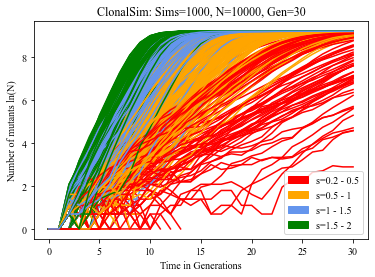

In [81]:
# # Plot the number of mutants over time
# fig, ax = plt.subplots()
# ax.set_xlabel("Time in Generations")
# ax.set_ylabel("Number of mutants ln(N)")
# ax.set_title(f"Mutant allele frequency over time")

# pop1 = Population(N=100, generations=100, disease=10, s=0.1)
# pop1.simulate_population()
# #num_mutants1 = pop1.simulate_population()
# #ax.plot(range(len(num_mutants1)), np.log(num_mutants1))

# pop2 = Population(N=100, generations=100, disease=10, s=0.2)
# pop2.simulate_population()
# pop1.simulate_population()
# #ax.plot(range(len(num_mutants2)), np.log(num_mutants2))

# plt.show()  # display the plot after all simulations
# Create the figure and axes objects
# fig, ax = plt.subplots()
# ax.set_xlabel("Time in Generations")
# ax.set_ylabel("Number of mutants ln(N)")
# ax.set_title(f"Mutant allele frequency over time")

# # Pass the ax object into each Population instance
# pop1 = Population(10000, 30, 1, 2, ax)
# pop2 = Population(10000, 30, 1, 1.7, ax)
# pop3 = Population(10000, 30, 1, 1.8, ax)
# pop4 = Population(10000, 30, 1, 1, ax)
# pop5 = Population(10000, 30, 1, 0.8, ax)
# pop6 = Population(10000, 30, 1, 0.5, ax)
# pop7 = Population(10000, 30, 1, 0.2, ax)



# Display the final plot
#plt.show()

import numpy as np
import matplotlib.pyplot as plt

# Create the figure and axes objects
fig, ax = plt.subplots()
ax.set_xlabel("Time in Generations")
ax.set_ylabel("Number of mutants ln(N)")

# Define the range of s values
s_values = np.random.uniform(0.2, 2, 1000)  # Adjust the range and number of values as needed

# Run the simulations
for s in s_values:
    pop = Population(10000, 30, 1, s, ax)
    pop.simulate_population()
fig.savefig('figure.png', dpi=300) 

#plt.show()  # display the plot after all simulations


In [45]:
s_values = np.random.uniform(0, 2, 1000)
s_values

array([8.35813651e-01, 1.94052491e+00, 1.83420228e+00, 4.36378641e-02,
       8.58293968e-01, 2.47293620e-01, 1.12716235e+00, 2.75207351e-01,
       1.02356170e+00, 3.94856608e-01, 3.86358589e-01, 5.58938520e-01,
       1.78269865e+00, 4.67563849e-01, 8.48611173e-01, 1.63513885e+00,
       1.62004914e+00, 1.15441784e+00, 5.13537697e-01, 8.78240223e-01,
       7.93113928e-01, 5.07646220e-01, 5.56133482e-02, 1.79643920e+00,
       4.13311908e-01, 7.35029912e-01, 1.70763616e+00, 1.29609496e+00,
       9.13850868e-01, 1.58057904e+00, 5.91119485e-02, 1.02800007e+00,
       1.10516392e+00, 1.12264227e+00, 1.64234515e+00, 3.81222280e-01,
       1.95182079e+00, 5.80267959e-01, 3.41659610e-01, 8.56839712e-01,
       1.79925114e+00, 1.65117883e+00, 9.73121130e-01, 1.94395077e-01,
       1.82768979e-01, 1.80596565e+00, 1.70786796e+00, 1.44868120e+00,
       3.98202536e-01, 1.78000386e+00, 3.67356559e-01, 1.55981373e+00,
       1.20259225e-01, 4.19985181e-01, 1.99024767e+00, 2.26003220e-01,
      

1
Passed if
Disease started
2
Passed if
Expansion started
Length self.gen.data: 2
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
1
3
Passed if
Expansion started
Length self.gen.data: 3
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

<ipython-input-33-2c0bb6af4c61>:115: RuntimeWarning: divide by zero encountered in log
  self.ax.plot(range(len(num_mutants)), np.log(num_mutants), label=f"s={self.s}")


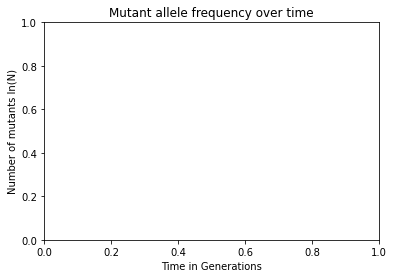

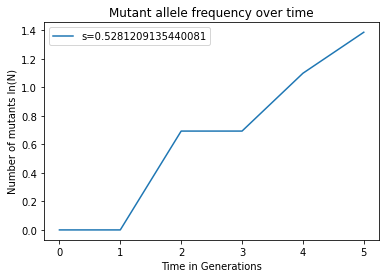

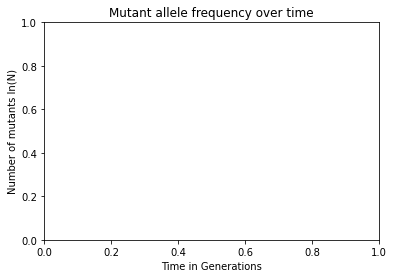

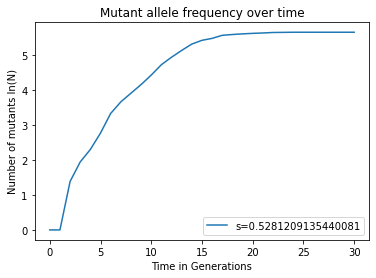

In [42]:
# Draw s from a uniform distribution on (0, 2).
s = np.random.uniform(0, 2)

# Draw N from 10X, where X is uniformly distributed on (1, 9).
X = np.random.uniform(1, 6)
N = round(10 ** X)

# Draw L from round(Y), where Y is a Gaussian with mean 35 and std 5.
L = round(np.random.normal(35, 5))
while L < 2:  # redraw L until L >= 2
    L = round(np.random.normal(35, 5))

# Draw g uniformly on the range 2, ..., L.
g = 1

# Set k
k = 30

# Calculate mutation rate
total_length_of_patient_tree = 723
mutation_rate = total_length_of_patient_tree / (L - 1)


max_retries = 2
retry_count = 0

while retry_count < max_retries:
    try:
        # initiate population
        popul = Population(N, L, g, s)
        # go from population array to tree_clusters dictionary
        popul.simulate_population()
        
        retry_count += 1
    
    except AssertionError:
        print("AssertionError occurred_ restarting simulation...")
        retry_count += 1

fig, ax = plt.subplots()
ax.set_xlabel("Time in Generations")
ax.set_ylabel("Number of mutants ln(N)")
ax.set_title(f"Mutant allele frequency over time")